# Poultry in Ireland and Spain

What's going on there? Are they similar? Are they different? And does the cost of feed affect the cost of chicken?

In [220]:
import pandas as pd

In [221]:
df = pd.read_csv('Notes/Data/FAOSTAT_data_en_12-19-2022_IRL_SPA_crop_livestock_products.csv')

In [222]:
df.head()

Domain Code                        Domain Area Code (ISO3)     Area  \
0         TCL  Crops and livestock products              IRL  Ireland   
1         TCL  Crops and livestock products              IRL  Ireland   
2         TCL  Crops and livestock products              IRL  Ireland   
3         TCL  Crops and livestock products              IRL  Ireland   
4         TCL  Crops and livestock products              IRL  Ireland   

   Element Code          Element Item Code (CPC)                     Item  \
0          5610  Import Quantity        01929.07  Abaca, manila hemp, raw   
1          5610  Import Quantity        01929.07  Abaca, manila hemp, raw   
2          5610  Import Quantity        01929.07  Abaca, manila hemp, raw   
3          5610  Import Quantity        01929.07  Abaca, manila hemp, raw   
4          5610  Import Quantity        01929.07  Abaca, manila hemp, raw   

   Year Code  Year    Unit  Value Flag Flag Description  
0       1961  1961  tonnes    NaN    O    Missing value  
1       1962  1962  tonnes    NaN    O    Missing value  
2       1963  1963  tonnes    NaN    O    Missing value  
3       1964  1964  tonnes    NaN    O    Missing value  
4       1965  1965  tonnes    NaN    O    Missing value

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172266 entries, 0 to 172265
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       172266 non-null  object 
 1   Domain            172266 non-null  object 
 2   Area Code (ISO3)  172266 non-null  object 
 3   Area              172266 non-null  object 
 4   Element Code      172266 non-null  int64  
 5   Element           172266 non-null  object 
 6   Item Code (CPC)   172266 non-null  object 
 7   Item              172266 non-null  object 
 8   Year Code         172266 non-null  int64  
 9   Year              172266 non-null  int64  
 10  Unit              172266 non-null  object 
 11  Value             164530 non-null  float64
 12  Flag              172266 non-null  object 
 13  Flag Description  172266 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 18.4+ MB


In [224]:
df = df.dropna(subset=['Value'])

In [225]:
df['Item'].unique()

array(['Abaca, manila hemp, raw', 'Almonds, in shell', 'Almonds, shelled',
       'Animal oils and fats n.e.c.',
       'Animal or vegetable fats and oils and their fractions, chemically modified, except those hydrogenated, inter-esterified, re-esterified or elaidinized; inedible mixtures or preparations of animal or vegetable fats or oils',
       'Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw',
       'Apple juice', 'Apple juice, concentrated', 'Apples', 'Apricots',
       'Apricots, dried', 'Areca nuts', 'Artichokes', 'Asparagus',
       'Asses', 'Avocados', 'Bananas', 'Barley', 'Barley, pearled',
       'Beans, dry', 'beef and veal preparations nes',
       'Beer of barley, malted', 'Bees', 'Beeswax', 'Beet pulp',
       'Blueberries', 'Bran of maize', 'Bran of wheat',
       'Brazil nuts, shelled', 'Bread', 'Breakfast cereals',
       'Brewing or distilling dregs and waste',
       'Broad beans and horse beans, dry', 'Buckwheat', 'Buffalo',
       'Bulg

In [226]:
df[df['Item']=='Turkeys']

Domain Code                        Domain Area Code (ISO3)     Area  \
77436          TCL  Crops and livestock products              IRL  Ireland   
77437          TCL  Crops and livestock products              IRL  Ireland   
77438          TCL  Crops and livestock products              IRL  Ireland   
77439          TCL  Crops and livestock products              IRL  Ireland   
77440          TCL  Crops and livestock products              IRL  Ireland   
...            ...                           ...              ...      ...   
165329         TCL  Crops and livestock products              ESP    Spain   
165330         TCL  Crops and livestock products              ESP    Spain   
165331         TCL  Crops and livestock products              ESP    Spain   
165332         TCL  Crops and livestock products              ESP    Spain   
165333         TCL  Crops and livestock products              ESP    Spain   

        Element Code          Element Item Code (CPC)     Item  Year Code  \
77436           5609  Import Quantity           02152  Turkeys       1961   
77437           5609  Import Quantity           02152  Turkeys       1962   
77438           5609  Import Quantity           02152  Turkeys       1963   
77439           5609  Import Quantity           02152  Turkeys       1964   
77440           5609  Import Quantity           02152  Turkeys       1965   
...              ...              ...             ...      ...        ...   
165329          5922     Export Value           02152  Turkeys       2016   
165330          5922     Export Value           02152  Turkeys       2017   
165331          5922     Export Value           02152  Turkeys       2018   
165332          5922     Export Value           02152  Turkeys       2019   
165333          5922     Export Value           02152  Turkeys       2020   

        Year       Unit  Value Flag Flag Description  
77436   1961  1000 Head    0.0    A  Official figure  
77437   1962  1000 Head    0.0    A  Official figure  
77438   1963  1000 Head    0.0    A  Official figure  
77439   1964  1000 Head    0.0    A  Official figure  
77440   1965  1000 Head    0.0    A  Official figure  
...      ...        ...    ...  ...              ...  
165329  2016   1000 US$  143.0    A  Official figure  
165330  2017   1000 US$  172.0    A  Official figure  
165331  2018   1000 US$  118.0    A  Official figure  
165332  2019   1000 US$  129.0    A  Official figure  
165333  2020   1000 US$   99.0    A  Official figure  

[505 rows x 14 columns]

In [227]:
df['Element'].unique()

array(['Import Quantity', 'Import Value', 'Export Quantity',
       'Export Value'], dtype=object)

Getting new data.

# Introduction

Let's look at poultry (meat) farming in Ireland (and Spain). In Ireland, let's see what factors affect chicken prices. I'm mainly going to look at feed and the price of grains. According to an EU factsheet on Irish agriculture, feeding stuff is by far the largest expense in agriculture, around five times the cost of the next largest expense, energy. (This is for all agriculture in Ireland though, so I'm sure cattle data is dominating these stats). Feed stuff for chicken is predominately maize, soya and wheat. Also maybe pig protein, but feeding chickens pigs was only made legal in the EU in Aug 2021 so I'm not going to look into it. Maize and soya are almost entirely imported. Feeding suppliers buy the grains from USA, Ukraine, Russia, etc, and then Irish poultry farmers buy their chicken feed from Irish feed suppliers. It is hard to find stats for feed supplies (especially to only relate to poultry) so I'm going to look at grain prices. 

So, my main question is: do grain prices have an impact on the consumer price of chicken? 

Also, what other factors affect the consumer price of chicken meat? Farm size? Intensive vs free range vs organic? Market demand? 

The price of imported cheap chicken from Brazil, Ukraine and Thailand, driven by fast food in Ireland's high demand for cheap chicken that the high prices of raw feed in Ireland can't meet (teagasc.ie). Apparently cheap imported chicken is undercutting European farmers (the guardian in their article about feeding animals to animals), let's see what's the truth of that.

What's the chicken consumpution per capita of Ireland vs Spain? Price of chicken relative to our gdp? Are we being screwed in our chicken price or is it line with our higher cost of living and wages in general?

## Reading in files

These datasets were collected from FAOSTAT https://www.fao.org/faostat/en/#data

In [228]:
from os import listdir
from os.path import isfile, join
FAOfiles = [f for f in listdir('./datasets/') if isfile(join('./datasets/', f))]

In [229]:
FAOfiles #list of file names, check they're as expected

['eurostat_poultry_holdings_4364731_linear.csv',
 'FAOSTAT_data_en_IRL_SPA_annual_population.csv',
 'FAOSTAT_data_en_IRL_SPA_consumer_price_indices.csv',
 'FAOSTAT_data_en_IRL_SPA_crops_and_livestock_products_QCL.csv',
 'FAOSTAT_data_en_IRL_SPA_crops_and_livestock_products_TCL.csv',
 'FAOSTAT_data_en_IRL_SPA_production_indices.csv',
 'FAOSTAT_data_en_IRL_SPA_trade_indices.csv',
 'FAOSTAT_data_en_IRL_SPA_value_agri_production.csv',
 'FAOSTAT_data_en_structural_data_from_agri_census.csv',
 'FAOSTAT_data_en__IRL_SPA_producer_prices.csv']

In [230]:
df_dict = {}
for file in FAOfiles:
    df_dict[file[:-4]] = pd.read_csv('./datasets/'+file) #using the filenames to generate the dictionary keys to hold the dataframes
    if 'Year' in df_dict[file[:-4]].columns.to_list():
        df_dict[file[:-4]]['Year'] = pd.to_datetime(df_dict[file[:-4]]['Year'], format='%Y') #changing it to datetime is probably pointless but I like to recognise dates as dates

In [231]:
df_dict #check it's as expected

{'eurostat_poultry_holdings_4364731_linear':                    DATAFLOW        LAST UPDATE freq n_head agrarea  \
 0    ESTAT:EF_LSBROIAA(1.0)  16/01/17 23:00:00    A      0   TOTAL   
 1    ESTAT:EF_LSBROIAA(1.0)  16/01/17 23:00:00    A      0   TOTAL   
 2    ESTAT:EF_LSBROIAA(1.0)  16/01/17 23:00:00    A      0   TOTAL   
 3    ESTAT:EF_LSBROIAA(1.0)  16/01/17 23:00:00    A      0   TOTAL   
 4    ESTAT:EF_LSBROIAA(1.0)  16/01/17 23:00:00    A      0   TOTAL   
 ..                      ...                ...  ...    ...     ...   
 315  ESTAT:EF_LSBROIAA(1.0)  16/01/17 23:00:00    A  TOTAL   TOTAL   
 316  ESTAT:EF_LSBROIAA(1.0)  16/01/17 23:00:00    A  TOTAL   TOTAL   
 317  ESTAT:EF_LSBROIAA(1.0)  16/01/17 23:00:00    A  TOTAL   TOTAL   
 318  ESTAT:EF_LSBROIAA(1.0)  16/01/17 23:00:00    A  TOTAL   TOTAL   
 319  ESTAT:EF_LSBROIAA(1.0)  16/01/17 23:00:00    A  TOTAL   TOTAL   
 
              indic_ef geo  TIME_PERIOD  OBS_VALUE  OBS_FLAG  
 0      C_5_1000_HEADS  ES         2013

In [232]:
print(df_dict.keys()) #have the keys handy

dict_keys(['eurostat_poultry_holdings_4364731_linear', 'FAOSTAT_data_en_IRL_SPA_annual_population', 'FAOSTAT_data_en_IRL_SPA_consumer_price_indices', 'FAOSTAT_data_en_IRL_SPA_crops_and_livestock_products_QCL', 'FAOSTAT_data_en_IRL_SPA_crops_and_livestock_products_TCL', 'FAOSTAT_data_en_IRL_SPA_production_indices', 'FAOSTAT_data_en_IRL_SPA_trade_indices', 'FAOSTAT_data_en_IRL_SPA_value_agri_production', 'FAOSTAT_data_en_structural_data_from_agri_census', 'FAOSTAT_data_en__IRL_SPA_producer_prices'])


In [233]:
from os import path, makedirs
if path.exists('./graphs/'):
    print('graphs folder exists')
else:
    makedirs('./graphs/')

graphs folder exists


## Exploring the datasets
What do they contain and what might be useful

### Crops and livestock products (production)

Crop and livestock statistics are recorded for 278 products, covering the following categories: 

1. CROPS PRIMARY: Cereals, Citrus Fruit, Fibre Crops, Fruit, Oil Crops, Oil Crops and Cakes in Oil Equivalent, Pulses, Roots and Tubers, Sugar Crops, Treenuts and Vegetables. Data are expressed in terms of area harvested, production quantity and yield. Cereals: Area and production data on cereals relate to crops harvested for dry grain only. Cereal crops harvested for hay or harvested green for food, feed or silage or used for grazing are therefore excluded. 
2. CROPS PROCESSED: Beer of barley; Cotton lint; Cottonseed; Margarine, short; Molasses; Oil, coconut (copra); Oil, cottonseed; Oil, groundnut; Oil, linseed; Oil, maize; Oil, olive, virgin; Oil, palm; Oil, palm kernel; Oil, rapeseed; Oil, safflower; Oil, sesame; Oil, soybean; Oil, sunflower; Palm kernels; Sugar Raw Centrifugal; Wine.
3. LIVE ANIMALS: Animals live n.e.s.; Asses; Beehives; Buffaloes; Camelids, other; Camels; Cattle; Chickens; Ducks; Geese and guinea fowls; Goats; Horses; Mules; Pigeons, other birds; Pigs; Rabbits and hares; Rodents, other; Sheep; Turkeys. 
4. LIVESTOCK PRIMARY: Beeswax; Eggs (various types); Hides buffalo, fresh; Hides, cattle, fresh; Honey, natural; Meat (ass, bird nes, buffalo, camel, cattle, chicken, duck, game, goat, goose and guinea fowl, horse, mule, Meat nes, meat other camelids, Meat other rodents, pig, rabbit, sheep, turkey); Milk (buffalo, camel, cow, goat, sheep); Offals, nes; Silk-worm cocoons, reelable; Skins (goat, sheep); Snails, not sea; Wool, greasy. 
5. LIVESTOCK PROCESSED: Butter (of milk from sheep, goat, buffalo, cow); Cheese (of milk from goat, buffalo, sheep, cow milk); Cheese of skimmed cow milk; Cream fresh; Ghee (cow and buffalo milk); Lard; Milk (dry buttermilk, skimmed condensed, skimmed cow, skimmed dried, skimmed evaporated, whole condensed, whole dried, whole evaporated); Silk raw; Tallow; Whey (condensed and dry); Yoghurt

*Food and Agriculture Organization of the United Nations (FAO)*

In [234]:
df_dict['FAOSTAT_data_en_IRL_SPA_crops_and_livestock_products_QCL']

Domain Code                        Domain  Area Code (M49)     Area  \
0            QCL  Crops and livestock products              372  Ireland   
1            QCL  Crops and livestock products              372  Ireland   
2            QCL  Crops and livestock products              372  Ireland   
3            QCL  Crops and livestock products              372  Ireland   
4            QCL  Crops and livestock products              372  Ireland   
...          ...                           ...              ...      ...   
2653         QCL  Crops and livestock products              724    Spain   
2654         QCL  Crops and livestock products              724    Spain   
2655         QCL  Crops and livestock products              724    Spain   
2656         QCL  Crops and livestock products              724    Spain   
2657         QCL  Crops and livestock products              724    Spain   

      Element Code         Element  Item Code (CPC)    Item  Year Code  \
0             5312  Area harvested            115.0  Barley       1961   
1             5312  Area harvested            115.0  Barley       1962   
2             5312  Area harvested            115.0  Barley       1963   
3             5312  Area harvested            115.0  Barley       1964   
4             5312  Area harvested            115.0  Barley       1965   
...            ...             ...              ...     ...        ...   
2653          5510      Production            111.0   Wheat       2017   
2654          5510      Production            111.0   Wheat       2018   
2655          5510      Production            111.0   Wheat       2019   
2656          5510      Production            111.0   Wheat       2020   
2657          5510      Production            111.0   Wheat       2021   

           Year    Unit      Value Flag Flag Description  
0    1961-01-01      ha   146373.0    A  Official figure  
1    1962-01-01      ha   164219.0    A  Official figure  
2    1963-01-01      ha   173608.0    A  Official figure  
3    1964-01-01      ha   183644.0    A  Official figure  
4    1965-01-01      ha   187790.0    A  Official figure  
...         ...     ...        ...  ...              ...  
2653 2017-01-01  tonnes  4875957.0    A  Official figure  
2654 2018-01-01  tonnes  8322510.0    A  Official figure  
2655 2019-01-01  tonnes  6041170.0    A  Official figure  
2656 2020-01-01  tonnes  8143510.0    A  Official figure  
2657 2021-01-01  tonnes  8564630.0    A  Official figure  

[2658 rows x 14 columns]

In [235]:
df_dict['FAOSTAT_data_en_IRL_SPA_crops_and_livestock_products_QCL']['Element'].unique()

array(['Area harvested', 'Yield', 'Production', 'Stocks',
       'Yield/Carcass Weight', 'Producing Animals/Slaughtered'],
      dtype=object)

In [236]:
df_dict['FAOSTAT_data_en_IRL_SPA_crops_and_livestock_products_QCL']['Unit'].unique()

array(['ha', 'hg/ha', 'tonnes', '1000 Head', '0.1g/An'], dtype=object)

Unit translation \[I have a natural inclination for SI units\]:

- ha = hectare (area) = 10000 m$^2$
- hg/ha = hectogram/hectare (yield of cereal) = 0.1 kg / 10000 m$^2$
- tonnes = 1000 kg
- 1000 Head = 1000 animals (chickens)
- 0.1g/An = 0.1 g per animal

In [237]:
#trying to understand 1000 head because FAO wasn't helpful with the definitions
df_dict['FAOSTAT_data_en_IRL_SPA_crops_and_livestock_products_QCL'][df_dict['FAOSTAT_data_en_IRL_SPA_crops_and_livestock_products_QCL']['Unit']== '1000 Head']['Element'].unique()

array(['Stocks', 'Producing Animals/Slaughtered'], dtype=object)

In [238]:
df_dict['FAOSTAT_data_en_IRL_SPA_crops_and_livestock_products_QCL']['Item'].unique()

array(['Barley', 'Cereals n.e.c.', 'Chickens', 'Maize (corn)',
       'Meat of chickens, fresh or chilled', 'Mixed grain', 'Oats',
       'Soya beans', 'Sunflower seed', 'Wheat', 'Millet'], dtype=object)

In [239]:
items = df_dict['FAOSTAT_data_en_IRL_SPA_crops_and_livestock_products_QCL']['Item'].unique()

In [240]:
items

array(['Barley', 'Cereals n.e.c.', 'Chickens', 'Maize (corn)',
       'Meat of chickens, fresh or chilled', 'Mixed grain', 'Oats',
       'Soya beans', 'Sunflower seed', 'Wheat', 'Millet'], dtype=object)

In [241]:
#splitting the crops and livestock into chicken related and grain related
#i.e. target (chicken) and features (food/grains)
chicken_item = []
grains_item = []
for item in items:
    if 'hicken' in item:
        chicken_item.append(item)
    else:
        grains_item.append(item)

In [242]:
print('Chicken list: ', chicken_item)
print('Grains list: ', grains_item)

Chicken list:  ['Chickens', 'Meat of chickens, fresh or chilled']
Grains list:  ['Barley', 'Cereals n.e.c.', 'Maize (corn)', 'Mixed grain', 'Oats', 'Soya beans', 'Sunflower seed', 'Wheat', 'Millet']


In [243]:
df_dict['FAOSTAT_data_en_IRL_SPA_crops_and_livestock_products_QCL'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2658 entries, 0 to 2657
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Domain Code       2658 non-null   object        
 1   Domain            2658 non-null   object        
 2   Area Code (M49)   2658 non-null   int64         
 3   Area              2658 non-null   object        
 4   Element Code      2658 non-null   int64         
 5   Element           2658 non-null   object        
 6   Item Code (CPC)   2658 non-null   float64       
 7   Item              2658 non-null   object        
 8   Year Code         2658 non-null   int64         
 9   Year              2658 non-null   datetime64[ns]
 10  Unit              2658 non-null   object        
 11  Value             2658 non-null   float64       
 12  Flag              2658 non-null   object        
 13  Flag Description  2658 non-null   object        
dtypes: datetime64[ns](1), fl

Let's just explore all the datasets, see what's useful about which ones

In [244]:
df_dict.keys() #to remind me

dict_keys(['eurostat_poultry_holdings_4364731_linear', 'FAOSTAT_data_en_IRL_SPA_annual_population', 'FAOSTAT_data_en_IRL_SPA_consumer_price_indices', 'FAOSTAT_data_en_IRL_SPA_crops_and_livestock_products_QCL', 'FAOSTAT_data_en_IRL_SPA_crops_and_livestock_products_TCL', 'FAOSTAT_data_en_IRL_SPA_production_indices', 'FAOSTAT_data_en_IRL_SPA_trade_indices', 'FAOSTAT_data_en_IRL_SPA_value_agri_production', 'FAOSTAT_data_en_structural_data_from_agri_census', 'FAOSTAT_data_en__IRL_SPA_producer_prices'])

### Consumer Price Indices

The FAOSTAT monthly Food CPI and General CPI database was based on the ILO CPI data until December 2014. In 2014, IMF-ILO-FAO agreed to transfer global CPI data compilation from ILO to IMF. Upon agreement, CPIs for all items and its sub components originates from the International Monetary Fund (IMF), and the UN Statistics Division(UNSD) for countries not covered by the IMF. However, due to a limited time coverage from IMF and UNSD for a number of countries, the Organisation for Economic Co-operation and Development (OECD), Central Bank of Western African States (BCEAO), Eastern Caribbean Central Bank (ECCB), UNdata, United Nations Conference on Trade and Development (UNCTAD) and national statistical office website data are used for missing historical data from IMF and UNSD food CPI. The FAO CPI dataset for all items(or general CPI) and the Food CPI, consists of a complete and consistent set of time series from January 2000 onwards. Data gaps on monthly Food CPI and General CPI are filled using statistical estimation procedures to have full data coverage for all countries for Food CPI and for General CPI. These indices measure the price change between the current and reference periods of the average basket of goods and services purchased by households. The CPI,all items is typically used to measure and monitor inflation, set monetary policy targets, index social benefits such as pensions and unemployment benefits, and to escalate thresholds and credits in the income tax systems and wages in public and private wage contracts. The FAOSTAT monthly Food CPI inflation rates are annual year-over-year inflation or percentage change over corresponding month of the previous year. The FAOSTAT regional Food CPI and CPI of General are weighted average of Food CPI and General CPI of countries in each region using the weights of HouseHold Final Consumption Expenditure in USD in 2015 from UNSD.

*Food and Agriculture Organization of the United Nations (FAO)*

In [245]:
df_dict['FAOSTAT_data_en_IRL_SPA_consumer_price_indices']

Domain Code                  Domain  Area Code (M49)     Area  Year Code  \
0             CP  Consumer Price Indices              372  Ireland       2000   
1             CP  Consumer Price Indices              372  Ireland       2000   
2             CP  Consumer Price Indices              372  Ireland       2000   
3             CP  Consumer Price Indices              372  Ireland       2000   
4             CP  Consumer Price Indices              372  Ireland       2000   
...          ...                     ...              ...      ...        ...   
1609          CP  Consumer Price Indices              724    Spain       2022   
1610          CP  Consumer Price Indices              724    Spain       2022   
1611          CP  Consumer Price Indices              724    Spain       2022   
1612          CP  Consumer Price Indices              724    Spain       2022   
1613          CP  Consumer Price Indices              724    Spain       2022   

           Year  Item Code                                        Item  \
0    2000-01-01      23013  Consumer Prices, Food Indices (2015 = 100)   
1    2000-01-01      23013  Consumer Prices, Food Indices (2015 = 100)   
2    2000-01-01      23013  Consumer Prices, Food Indices (2015 = 100)   
3    2000-01-01      23013  Consumer Prices, Food Indices (2015 = 100)   
4    2000-01-01      23013  Consumer Prices, Food Indices (2015 = 100)   
...         ...        ...                                         ...   
1609 2022-01-01      23014                        Food price inflation   
1610 2022-01-01      23014                        Food price inflation   
1611 2022-01-01      23014                        Food price inflation   
1612 2022-01-01      23014                        Food price inflation   
1613 2022-01-01      23014                        Food price inflation   

      Months Code     Months Unit      Value Flag  \
0            7001    January  NaN  87.551570    X   
1            7002   February  NaN  87.842760    X   
2            7003      March  NaN  88.036880    X   
3            7004      April  NaN  88.133950    X   
4            7005        May  NaN  89.395770    X   
...           ...        ...  ...        ...  ...   
1609         7005        May    %  10.984332    E   
1610         7006       June    %  12.949015    E   
1611         7007       July    %  13.525500    E   
1612         7008     August    %  13.754012    E   
1613         7009  September    %  14.355534    E   

                             Flag Description               Note  
0     Figure from international organizations  base year is 2015  
1     Figure from international organizations  base year is 2015  
2     Figure from international organizations  base year is 2015  
3     Figure from international organizations  base year is 2015  
4     Figure from international organizations  base year is 2015  
...                                       ...                ...  
1609                          Estimated value                NaN  
1610                          Estimated value                NaN  
1611                          Estimated value                NaN  
1612                          Estimated value                NaN  
1613                          Estimated value                NaN  

[1614 rows x 15 columns]

In [246]:
df_dict['FAOSTAT_data_en_IRL_SPA_consumer_price_indices'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Domain Code       1614 non-null   object        
 1   Domain            1614 non-null   object        
 2   Area Code (M49)   1614 non-null   int64         
 3   Area              1614 non-null   object        
 4   Year Code         1614 non-null   int64         
 5   Year              1614 non-null   datetime64[ns]
 6   Item Code         1614 non-null   int64         
 7   Item              1614 non-null   object        
 8   Months Code       1614 non-null   int64         
 9   Months            1614 non-null   object        
 10  Unit              522 non-null    object        
 11  Value             1614 non-null   float64       
 12  Flag              1614 non-null   object        
 13  Flag Description  1614 non-null   object        
 14  Note              1092 n

In [247]:
df_dict['FAOSTAT_data_en_IRL_SPA_consumer_price_indices']['Item'].unique()

array(['Consumer Prices, Food Indices (2015 = 100)',
       'Consumer Prices, General Indices (2015 = 100)',
       'Food price inflation'], dtype=object)

In [248]:
df_dict['FAOSTAT_data_en_IRL_SPA_consumer_price_indices']['Unit'].unique()

array([nan, '%'], dtype=object)

In [249]:
df_dict['FAOSTAT_data_en_IRL_SPA_consumer_price_indices']['Flag'].unique()

array(['X', 'E'], dtype=object)

Flags (https://www.fao.org/faostat/en/#definitions): 

- X: Figure from international organizations
- E: Estimated value

### Crops and livestock products (Trade)

The food and agricultural trade dataset is collected, processed and disseminated by FAO according to the standard International Merchandise Trade Statistics (IMTS) Methodology. The data is mainly provided by UNSD, Eurostat, and other national authorities as needed. This source data is checked for outliers, trade partner data is used for non-reporting countries or missing cells, and data on food aid is added to take into account total cross-border trade flows. The trade database includes the following variables: export quantity, export value, import quantity, and import value. The trade database includes all food and agricultural products imported/exported annually by all the countries in the world.

*Food and Agriculture Organization of the United Nations (FAO)*

In [250]:
df_dict['FAOSTAT_data_en_IRL_SPA_crops_and_livestock_products_TCL'] #trade

Domain Code                        Domain  Area Code (M49)     Area  \
0            TCL  Crops and livestock products              372  Ireland   
1            TCL  Crops and livestock products              372  Ireland   
2            TCL  Crops and livestock products              372  Ireland   
3            TCL  Crops and livestock products              372  Ireland   
4            TCL  Crops and livestock products              372  Ireland   
...          ...                           ...              ...      ...   
8715         TCL  Crops and livestock products              724    Spain   
8716         TCL  Crops and livestock products              724    Spain   
8717         TCL  Crops and livestock products              724    Spain   
8718         TCL  Crops and livestock products              724    Spain   
8719         TCL  Crops and livestock products              724    Spain   

      Element Code          Element Item Code (CPC)    Item  Year Code  \
0             5610  Import Quantity            0115  Barley       1961   
1             5610  Import Quantity            0115  Barley       1962   
2             5610  Import Quantity            0115  Barley       1963   
3             5610  Import Quantity            0115  Barley       1964   
4             5610  Import Quantity            0115  Barley       1965   
...            ...              ...             ...     ...        ...   
8715          5922     Export Value            0111   Wheat       2017   
8716          5922     Export Value            0111   Wheat       2018   
8717          5922     Export Value            0111   Wheat       2019   
8718          5922     Export Value            0111   Wheat       2020   
8719          5922     Export Value            0111   Wheat       2021   

           Year      Unit     Value Flag Flag Description  
0    1961-01-01    tonnes    4544.0    A  Official figure  
1    1962-01-01    tonnes    3182.0    A  Official figure  
2    1963-01-01    tonnes    4845.0    A  Official figure  
3    1964-01-01    tonnes     433.0    A  Official figure  
4    1965-01-01    tonnes   80132.0    A  Official figure  
...         ...       ...       ...  ...              ...  
8715 2017-01-01  1000 US$   76166.0    A  Official figure  
8716 2018-01-01  1000 US$   96977.0    A  Official figure  
8717 2019-01-01  1000 US$  145026.0    A  Official figure  
8718 2020-01-01  1000 US$  180098.0    A  Official figure  
8719 2021-01-01  1000 US$  133745.0    A  Official figure  

[8720 rows x 14 columns]

In [251]:
df_dict['FAOSTAT_data_en_IRL_SPA_crops_and_livestock_products_TCL'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8720 entries, 0 to 8719
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Domain Code       8720 non-null   object        
 1   Domain            8720 non-null   object        
 2   Area Code (M49)   8720 non-null   int64         
 3   Area              8720 non-null   object        
 4   Element Code      8720 non-null   int64         
 5   Element           8720 non-null   object        
 6   Item Code (CPC)   8720 non-null   object        
 7   Item              8720 non-null   object        
 8   Year Code         8720 non-null   int64         
 9   Year              8720 non-null   datetime64[ns]
 10  Unit              8720 non-null   object        
 11  Value             8720 non-null   float64       
 12  Flag              8720 non-null   object        
 13  Flag Description  8720 non-null   object        
dtypes: datetime64[ns](1), fl

In [252]:
df_dict['FAOSTAT_data_en_IRL_SPA_crops_and_livestock_products_TCL']['Element'].unique()

array(['Import Quantity', 'Import Value', 'Export Quantity',
       'Export Value'], dtype=object)

In [253]:
df_dict['FAOSTAT_data_en_IRL_SPA_crops_and_livestock_products_TCL']['Item'].unique() #not all the same names as crops and livestock QCL

array(['Barley', 'Barley flour and grits', 'Barley, pearled',
       'Bran of cereals n.e.c.', 'Bran of maize', 'Bran of wheat',
       'Cake of  soya beans', 'Cake of maize', 'Cereals n.e.c.',
       'Chickens',
       'Edible offals and liver of chickens and guinea fowl, fresh, chilled or frozen',
       'Green corn (maize)', 'Maize (corn)',
       'Meat of chickens, fresh or chilled', 'Millet', 'Mixed grain',
       'Poultry fat, rendered', 'Poultry meat preparations',
       'Soya bean oil', 'Soya beans', 'Sunflower seed', 'Wheat',
       'Feed supplements'], dtype=object)

In [254]:
df_dict['FAOSTAT_data_en_IRL_SPA_crops_and_livestock_products_TCL']['Unit'].unique()

array(['tonnes', '1000 US$', '1000 Head'], dtype=object)

### Production Indices

Crop statistics are recorded for 173 products, covering the following categories: Crops Primary, Fibre Crops Primary, Cereals, Coarse Grain, Citrus Fruit, Fruit, Jute Jute-like Fibres, Oilcakes Equivalent, Oil crops Primary, Pulses, Roots and Tubers, Treenuts and Vegetables and Melons. Data are expressed in terms of area harvested, production quantity and yield. The objective is to comprehensively cover production of all primary crops for all countries and regions in the world.

Cereals: Area and production data on cereals relate to crops harvested for dry grain only. Cereal crops harvested for hay or harvested green for food, feed or silage or used for grazing are therefore excluded. Area data relate to harvested area. Some countries report sown or cultivated area only however, in these countries the sown or cultivated area does not differ significantly in normal years from the area actually harvested, either because practically the whole area sown is harvested or because the area surveys are conducted around the harvest period.

Vegetables, total (including melons): Data relate to vegetable crops grown mainly for human consumption. Crops such as cabbages, pumpkins and carrots, when explicitly cultivated for animal feed, are therefore excluded. Statistics on vegetables are not available in many countries, and the coverage of the reported data differs from country to country. In general, it appears that the data refer to crops grown in field and market gardens mainly for sale, thus excluding crops cultivated in kitchen gardens or small family gardens mainly for household consumption.

Fruit, total (excluding melons): Data refer to total production of fresh fruit, whether finally used for direct consumption for food or feed, or processed into different products: dry fruit, juice, jam, alcohol, etc. Generally, production data relate to plantation crops or orchard crops grown mainly for sale. Data on production from scattered trees used mainly for home consumption are not usually collected. Production from wild plants, particularly berries, which is of some importance in certain countries, is generally disregarded by national statistical services. Therefore, the data for the various fruits and berries are rather incomplete. 

Bananas and plantains: Figures on bananas refer, as far as possible, to all edible fruit-bearing species of the genus Musa except Musa paradisiaca, commonly known as plantain. Unfortunately, several countries make no distinction in their statistics between bananas and plantains and publish only overall estimates. When this occurs and there is some indication or assumption that the data reported refer mainly to bananas, the data are included. The production data on bananas and plantains reported by the various countries are also difficult to compare because a number of countries report in terms of bunches, which generally means that the stalk is included in the weight. Dates, plantains and total grapes are included in the *total fruit* aggregated figures, while olives are excluded. 

Treenuts, aggregated: Production of nuts (including chestnuts) relates to nuts in the shell or in the husk. Statistics are very scanty and generally refer only to crops for sale. In addition to the kind of nuts shown separately, production data include all other treenuts mainly used as dessert or table nuts, such as pecan nuts, pili nuts, sapucaia nuts and macadamia nuts. Nuts mainly used for flavouring beverages are excludedas are masticatory and stimulant nuts and nuts used mainly for the extraction of oil or butter, including areca/betel nuts, cola nuts, illipe nuts, karate nuts, coconuts, tung nuts, oilpalm nuts etc.

*Food and Agriculture Organization of the United Nations (FAO)*

In [255]:
df_dict['FAOSTAT_data_en_IRL_SPA_production_indices']

Domain Code              Domain  Area Code (M49)     Area  Element Code  \
0              QI  Production Indices              372  Ireland           432   
1              QI  Production Indices              372  Ireland           432   
2              QI  Production Indices              372  Ireland           432   
3              QI  Production Indices              372  Ireland           432   
4              QI  Production Indices              372  Ireland           432   
...           ...                 ...              ...      ...           ...   
18439          QI  Production Indices              724    Spain           434   
18440          QI  Production Indices              724    Spain           434   
18441          QI  Production Indices              724    Spain           434   
18442          QI  Production Indices              724    Spain           434   
18443          QI  Production Indices              724    Spain           434   

                                                 Element Item Code (CPC)  \
0        Gross Production Index Number (2014-2016 = 100)           01341   
1        Gross Production Index Number (2014-2016 = 100)           01341   
2        Gross Production Index Number (2014-2016 = 100)           01341   
3        Gross Production Index Number (2014-2016 = 100)           01341   
4        Gross Production Index Number (2014-2016 = 100)           01341   
...                                                  ...             ...   
18439  Gross per capita Production Index Number (2014...           F2054   
18440  Gross per capita Production Index Number (2014...           F2054   
18441  Gross per capita Production Index Number (2014...           F2054   
18442  Gross per capita Production Index Number (2014...           F2054   
18443  Gross per capita Production Index Number (2014...           F2054   

         Item  Year Code       Year   Unit   Value Flag Flag Description  
0      Apples       1961 1961-01-01  index  144.52    E  Estimated value  
1      Apples       1962 1962-01-01  index  154.49    E  Estimated value  
2      Apples       1963 1963-01-01  index  174.42    E  Estimated value  
3      Apples       1964 1964-01-01  index  119.60    E  Estimated value  
4      Apples       1965 1965-01-01  index  104.65    E  Estimated value  
...       ...        ...        ...    ...     ...  ...              ...  
18439    Food       2016 2016-01-01  index  106.25    E  Estimated value  
18440    Food       2017 2017-01-01  index  101.75    E  Estimated value  
18441    Food       2018 2018-01-01  index  117.74    E  Estimated value  
18442    Food       2019 2019-01-01  index  106.58    E  Estimated value  
18443    Food       2020 2020-01-01  index  117.43    E  Estimated value  

[18444 rows x 14 columns]

In [256]:
df_dict['FAOSTAT_data_en_IRL_SPA_production_indices'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18444 entries, 0 to 18443
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Domain Code       18444 non-null  object        
 1   Domain            18444 non-null  object        
 2   Area Code (M49)   18444 non-null  int64         
 3   Area              18444 non-null  object        
 4   Element Code      18444 non-null  int64         
 5   Element           18444 non-null  object        
 6   Item Code (CPC)   18444 non-null  object        
 7   Item              18444 non-null  object        
 8   Year Code         18444 non-null  int64         
 9   Year              18444 non-null  datetime64[ns]
 10  Unit              18444 non-null  object        
 11  Value             18444 non-null  float64       
 12  Flag              18444 non-null  object        
 13  Flag Description  18444 non-null  object        
dtypes: datetime64[ns](1), 

In [257]:
df_dict['FAOSTAT_data_en_IRL_SPA_production_indices']['Element'].unique() #not sure I understand these. dataset may not be used because I don't do economics

array(['Gross Production Index Number (2014-2016 = 100)',
       'Gross per capita Production Index Number (2014-2016 = 100)'],
      dtype=object)

In [258]:
df_dict['FAOSTAT_data_en_IRL_SPA_production_indices']['Item'].unique() #thats way too many things. I only care about chicken and grains?

array(['Apples', 'Barley', 'Broad beans and horse beans, dry',
       'Broad beans and horse beans, green', 'Cabbages',
       'Carrots and turnips', 'Cauliflowers and broccoli',
       'Cereals n.e.c.',
       'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)',
       'Cucumbers and gherkins', 'Currants', 'Hen eggs in shell, fresh',
       'Hop cones', 'Horse meat, fresh or chilled (indigenous)',
       'Leeks and other alliaceous vegetables', 'Lettuce and chicory',
       'Meat of cattle with the bone, fresh or chilled (indigenous)',
       'Meat of chickens, fresh or chilled (indigenous)',
       'Meat of ducks, fresh or chilled (indigenous)',
       'Meat of geese, fresh or chilled (indigenous)',
       'Meat of pig with the bone, fresh or chilled (indigenous)',
       'Meat of sheep, fresh or chilled (indigenous)',
       'Meat of turkeys, fresh or chilled (indigenous)',
       'Mushrooms and truffles', 'Natural honey', 'Oats',
       'Onions and shallots, dry (excludi

In [259]:
df_dict['FAOSTAT_data_en_IRL_SPA_production_indices']['Unit'].unique() #what is a production index??

array(['index'], dtype=object)

what is a production index in agriculture

In agriculture, a production index is a measure of the efficiency or productivity of an agricultural production system. It can be used to compare the output of a system over time, or to compare the output of different systems or farms. There are many different ways to calculate a production index in agriculture, and the specific formula used can depend on the type of crops or livestock being produced and the goals of the analysis.

Some common elements that may be included in a production index for agriculture include:

1.    Output: This is the total amount of agricultural product produced by the system. It may be measured in units, weight, or some other relevant metric.

2.    Inputs: These are the resources used to produce the output, such as seeds, fertilizers, pesticides, irrigation, labor, and energy. The production index may be adjusted to account for changes in the input mix over time.

3.    Efficiency measures: These are metrics that reflect the efficiency of the production system, such as the utilization of land, water, or other resources, the yield of the crops or livestock, or the quality of the output.

4.    Time period: The production index may be calculated over a specific time period, such as a growing season, a year, or multiple years.

To calculate a production index in agriculture, you can divide the output of the system by the inputs used to produce it, and adjust for any efficiency measures or other factors as appropriate. The resulting index can then be used to compare the performance of the production system over time or against other systems.

### Trade Indices

The food and agricultural trade dataset is collected, processed and disseminated by FAO according to the standard International Merchandise Trade Statistics (IMTS) Methodology. The data is mainly provided by UNSD, Eurostat, and other national authorities as needed. This source data is checked for outliers, trade partner data is used for non-reporting countries or missing cells, and data on food aid is added to take into account total cross-border trade flows. The trade database includes the following variables: export quantity, export value, import quantity, and import value. The trade database includes all food and agricultural products imported/exported annually by all the countries in the world.

*Food and Agriculture Organization of the United Nations (FAO)*


In [260]:
df_dict['FAOSTAT_data_en_IRL_SPA_trade_indices']

Domain Code         Domain  Area Code (M49)     Area  Element Code  \
0             TI  Trade Indices              372  Ireland            64   
1             TI  Trade Indices              372  Ireland            64   
2             TI  Trade Indices              372  Ireland            64   
3             TI  Trade Indices              372  Ireland            64   
4             TI  Trade Indices              372  Ireland            64   
...          ...            ...              ...      ...           ...   
8907          TI  Trade Indices              724    Spain           495   
8908          TI  Trade Indices              724    Spain           495   
8909          TI  Trade Indices              724    Spain           495   
8910          TI  Trade Indices              724    Spain           495   
8911          TI  Trade Indices              724    Spain           495   

                                      Element  Item Code (CPC)    Item  \
0           Import Value Base Period Quantity            115.0  Barley   
1           Import Value Base Period Quantity            115.0  Barley   
2           Import Value Base Period Quantity            115.0  Barley   
3           Import Value Base Period Quantity            115.0  Barley   
4           Import Value Base Period Quantity            115.0  Barley   
...                                       ...              ...     ...   
8907  Export Quantity Index (2014-2016 = 100)            111.0   Wheat   
8908  Export Quantity Index (2014-2016 = 100)            111.0   Wheat   
8909  Export Quantity Index (2014-2016 = 100)            111.0   Wheat   
8910  Export Quantity Index (2014-2016 = 100)            111.0   Wheat   
8911  Export Quantity Index (2014-2016 = 100)            111.0   Wheat   

      Year Code       Year    Unit  Value Flag Flag Description  
0          1961 1961-01-01  1000 $   4433    E  Estimated value  
1          1962 1962-01-01  1000 $   4801    E  Estimated value  
2          1963 1963-01-01  1000 $   4706    E  Estimated value  
3          1964 1964-01-01  1000 $   4704    E  Estimated value  
4          1965 1965-01-01  1000 $   3901    E  Estimated value  
...         ...        ...     ...    ...  ...              ...  
8907       2017 2017-01-01   index     66    E  Estimated value  
8908       2018 2018-01-01   index     83    E  Estimated value  
8909       2019 2019-01-01   index    129    E  Estimated value  
8910       2020 2020-01-01   index    132    E  Estimated value  
8911       2021 2021-01-01   index     75    E  Estimated value  

[8912 rows x 14 columns]

In [261]:
df_dict['FAOSTAT_data_en_IRL_SPA_trade_indices'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8912 entries, 0 to 8911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Domain Code       8912 non-null   object        
 1   Domain            8912 non-null   object        
 2   Area Code (M49)   8912 non-null   int64         
 3   Area              8912 non-null   object        
 4   Element Code      8912 non-null   int64         
 5   Element           8912 non-null   object        
 6   Item Code (CPC)   8912 non-null   float64       
 7   Item              8912 non-null   object        
 8   Year Code         8912 non-null   int64         
 9   Year              8912 non-null   datetime64[ns]
 10  Unit              8912 non-null   object        
 11  Value             8912 non-null   int64         
 12  Flag              8912 non-null   object        
 13  Flag Description  8912 non-null   object        
dtypes: datetime64[ns](1), fl

In [262]:
df_dict['FAOSTAT_data_en_IRL_SPA_trade_indices']['Element'].unique() #not sure I understand this either

array(['Import Value Base Period Quantity',
       'Import Value Base Period Price', 'Export Value Base Quantity',
       'Export Value Base Price', 'Import Value Index (2014-2016 = 100)',
       'Import Unit/Value Index (2014-2016 = 100)',
       'Import Quantity Index (2014-2016 = 100)',
       'Export Value Index (2014-2016 = 100)',
       'Export Unit/Value Index (2014-2016 = 100)',
       'Export Quantity Index (2014-2016 = 100)'], dtype=object)

In [263]:
df_dict['FAOSTAT_data_en_IRL_SPA_trade_indices']['Item'].unique()

array(['Barley', 'Bran of cereals n.e.c.', 'Cake of  soya beans',
       'Maize (corn)', 'Meat of chickens, fresh or chilled', 'Soya beans',
       'Sunflower seed', 'Wheat'], dtype=object)

In [264]:
df_dict['FAOSTAT_data_en_IRL_SPA_trade_indices']['Unit'].unique()

array(['1000 $', 'index'], dtype=object)

In [265]:
df_dict['FAOSTAT_data_en_IRL_SPA_trade_indices']['Flag'].unique()

array(['E'], dtype=object)

### Value of Agricultural Production

Crop statistics are recorded for 173 products, covering the following categories: Crops Primary, Fibre Crops Primary, Cereals, Coarse Grain, Citrus Fruit, Fruit, Jute Jute-like Fibres, Oilcakes Equivalent, Oil crops Primary, Pulses, Roots and Tubers, Treenuts and Vegetables and Melons. Data are expressed in terms of area harvested, production quantity and yield. The objective is to comprehensively cover production of all primary crops for all countries and regions in the world.

Cereals: Area and production data on cereals relate to crops harvested for dry grain only. Cereal crops harvested for hay or harvested green for food, feed or silage or used for grazing are therefore excluded. Area data relate to harvested area. Some countries report sown or cultivated area only however, in these countries the sown or cultivated area does not differ significantly in normal years from the area actually harvested, either because practically the whole area sown is harvested or because the area surveys are conducted around the harvest period.

Vegetables, total (including melons): Data relate to vegetable crops grown mainly for human consumption. Crops such as cabbages, pumpkins and carrots, when explicitly cultivated for animal feed, are therefore excluded. Statistics on vegetables are not available in many countries, and the coverage of the reported data differs from country to country. In general, it appears that the data refer to crops grown in field and market gardens mainly for sale, thus excluding crops cultivated in kitchen gardens or small family gardens mainly for household consumption.

Fruit, total (excluding melons): Data refer to total production of fresh fruit, whether finally used for direct consumption for food or feed, or processed into different products: dry fruit, juice, jam, alcohol, etc. Generally, production data relate to plantation crops or orchard crops grown mainly for sale. Data on production from scattered trees used mainly for home consumption are not usually collected. Production from wild plants, particularly berries, which is of some importance in certain countries, is generally disregarded by national statistical services. Therefore, the data for the various fruits and berries are rather incomplete. 

Bananas and plantains: Figures on bananas refer, as far as possible, to all edible fruit-bearing species of the genus Musa except Musa paradisiaca, commonly known as plantain. Unfortunately, several countries make no distinction in their statistics between bananas and plantains and publish only overall estimates. When this occurs and there is some indication or assumption that the data reported refer mainly to bananas, the data are included. The production data on bananas and plantains reported by the various countries are also difficult to compare because a number of countries report in terms of bunches, which generally means that the stalk is included in the weight. Dates, plantains and total grapes are included in the *total fruit* aggregated figures, while olives are excluded. 

Treenuts, aggregated: Production of nuts (including chestnuts) relates to nuts in the shell or in the husk. Statistics are very scanty and generally refer only to crops for sale. In addition to the kind of nuts shown separately, production data include all other treenuts mainly used as dessert or table nuts, such as pecan nuts, pili nuts, sapucaia nuts and macadamia nuts. Nuts mainly used for flavouring beverages are excludedas are masticatory and stimulant nuts and nuts used mainly for the extraction of oil or butter, including areca/betel nuts, cola nuts, illipe nuts, karate nuts, coconuts, tung nuts, oilpalm nuts etc.

*Food and Agriculture Organization of the United Nations (FAO)*

In [266]:
df_dict['FAOSTAT_data_en_IRL_SPA_value_agri_production']

Domain Code                            Domain  Area Code (M49)     Area  \
0             QV  Value of Agricultural Production              372  Ireland   
1             QV  Value of Agricultural Production              372  Ireland   
2             QV  Value of Agricultural Production              372  Ireland   
3             QV  Value of Agricultural Production              372  Ireland   
4             QV  Value of Agricultural Production              372  Ireland   
...          ...                               ...              ...      ...   
2806          QV  Value of Agricultural Production              724    Spain   
2807          QV  Value of Agricultural Production              724    Spain   
2808          QV  Value of Agricultural Production              724    Spain   
2809          QV  Value of Agricultural Production              724    Spain   
2810          QV  Value of Agricultural Production              724    Spain   

      Element Code                                            Element  \
0              152  Gross Production Value (constant 2014-2016 tho...   
1              152  Gross Production Value (constant 2014-2016 tho...   
2              152  Gross Production Value (constant 2014-2016 tho...   
3              152  Gross Production Value (constant 2014-2016 tho...   
4              152  Gross Production Value (constant 2014-2016 tho...   
...            ...                                                ...   
2806            58  Gross Production Value (constant 2014-2016 tho...   
2807            58  Gross Production Value (constant 2014-2016 tho...   
2808            58  Gross Production Value (constant 2014-2016 tho...   
2809            58  Gross Production Value (constant 2014-2016 tho...   
2810            58  Gross Production Value (constant 2014-2016 tho...   

     Item Code (CPC)    Item  Year Code       Year         Unit    Value Flag  \
0               0115  Barley       1961 1961-01-01  1000 Int. $   100413    E   
1               0115  Barley       1962 1962-01-01  1000 Int. $   117519    E   
2               0115  Barley       1963 1963-01-01  1000 Int. $   114733    E   
3               0115  Barley       1964 1964-01-01  1000 Int. $   107291    E   
4               0115  Barley       1965 1965-01-01  1000 Int. $   119960    E   
...              ...     ...        ...        ...          ...      ...  ...   
2806            0111   Wheat       2016 2016-01-01     1000 US$  1812197    E   
2807            0111   Wheat       2017 2017-01-01     1000 US$  1122322    E   
2808            0111   Wheat       2018 2018-01-01     1000 US$  1915631    E   
2809            0111   Wheat       2019 2019-01-01     1000 US$  1390525    E   
2810            0111   Wheat       2020 2020-01-01     1000 US$  1874430    E   

     Flag Description  
0     Estimated value  
1     Estimated value  
2     Estimated value  
3     Estimated value  
4     Estimated value  
...               ...  
2806  Estimated value  
2807  Estimated value  
2808  Estimated value  
2809  Estimated value  
2810  Estimated value  

[2811 rows x 14 columns]

In [267]:
df_dict['FAOSTAT_data_en_IRL_SPA_value_agri_production'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811 entries, 0 to 2810
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Domain Code       2811 non-null   object        
 1   Domain            2811 non-null   object        
 2   Area Code (M49)   2811 non-null   int64         
 3   Area              2811 non-null   object        
 4   Element Code      2811 non-null   int64         
 5   Element           2811 non-null   object        
 6   Item Code (CPC)   2811 non-null   object        
 7   Item              2811 non-null   object        
 8   Year Code         2811 non-null   int64         
 9   Year              2811 non-null   datetime64[ns]
 10  Unit              2811 non-null   object        
 11  Value             2811 non-null   int64         
 12  Flag              2811 non-null   object        
 13  Flag Description  2811 non-null   object        
dtypes: datetime64[ns](1), in

In [268]:
df_dict['FAOSTAT_data_en_IRL_SPA_value_agri_production']['Element'].unique() #SLC = standard local currency, i.e. euros
#I$ = international dollars
#Just pick one and ignore the rest

array(['Gross Production Value (constant 2014-2016 thousand I$)',
       'Gross Production Value (current thousand SLC)',
       'Gross Production Value (constant 2014-2016 thousand SLC)',
       'Gross Production Value (current thousand US$)',
       'Gross Production Value (constant 2014-2016 thousand US$)'],
      dtype=object)

In [269]:
df_dict['FAOSTAT_data_en_IRL_SPA_value_agri_production']['Unit'].unique()

array(['1000 Int. $', '1000 SLC', '1000 US$'], dtype=object)

### Producer Prices

This sub-domain contains data on Agriculture Producer Prices and Producer Price Index. Agriculture Producer Prices are prices received by farmers for primary crops, live animals and livestock primary products as collected at the point of initial sale (prices paid at the farm-gate). Annual data are provided from 1991, while mothly data from January 2010 for 180 country and 212 product. Producer Price Index is the index of agricultural producer prices that measures the average annual change over time in the selling prices received by farmers (prices at the farm-gate or at the first point of sale). The three categories of producer price index available in FAOSTAT comprise: single-item price index, commodity group index and the agriculture producer price index.

*Food and Agriculture Organization of the United Nations (FAO)*

In [270]:
df_dict['FAOSTAT_data_en__IRL_SPA_producer_prices']

Domain Code           Domain  Area Code (M49)     Area  Element Code  \
0            PP  Producer Prices              372  Ireland          5532   
1            PP  Producer Prices              372  Ireland          5532   
2            PP  Producer Prices              372  Ireland          5532   
3            PP  Producer Prices              372  Ireland          5532   
4            PP  Producer Prices              372  Ireland          5532   
..          ...              ...              ...      ...           ...   
851          PP  Producer Prices              724    Spain          5539   
852          PP  Producer Prices              724    Spain          5539   
853          PP  Producer Prices              724    Spain          5539   
854          PP  Producer Prices              724    Spain          5539   
855          PP  Producer Prices              724    Spain          5539   

                                    Element Item Code (CPC)    Item  \
0                Producer Price (USD/tonne)            0115  Barley   
1                Producer Price (USD/tonne)            0115  Barley   
2                Producer Price (USD/tonne)            0115  Barley   
3                Producer Price (USD/tonne)            0115  Barley   
4                Producer Price (USD/tonne)            0115  Barley   
..                                      ...             ...     ...   
851  Producer Price Index (2014-2016 = 100)            0111   Wheat   
852  Producer Price Index (2014-2016 = 100)            0111   Wheat   
853  Producer Price Index (2014-2016 = 100)            0111   Wheat   
854  Producer Price Index (2014-2016 = 100)            0111   Wheat   
855  Producer Price Index (2014-2016 = 100)            0111   Wheat   

     Year Code       Year  Months Code        Months Unit   Value Flag  \
0         1991 1991-01-01         7021  Annual value  USD  173.80    A   
1         1992 1992-01-01         7021  Annual value  USD  173.50    A   
2         1993 1993-01-01         7021  Annual value  USD  140.30    A   
3         1994 1994-01-01         7021  Annual value  USD  130.10    A   
4         1995 1995-01-01         7021  Annual value  USD  168.30    A   
..         ...        ...          ...           ...  ...     ...  ...   
851       2017 2017-01-01         7021  Annual value  NaN   95.43    I   
852       2018 2018-01-01         7021  Annual value  NaN   94.91    I   
853       2019 2019-01-01         7021  Annual value  NaN   98.52    I   
854       2020 2020-01-01         7021  Annual value  NaN   99.97    I   
855       2021 2021-01-01         7021  Annual value  NaN  101.46    I   

    Flag Description  
0    Official figure  
1    Official figure  
2    Official figure  
3    Official figure  
4    Official figure  
..               ...  
851    Imputed value  
852    Imputed value  
853    Imputed value  
854    Imputed value  
855    Imputed value  

[856 rows x 16 columns]

In [271]:
df_dict['FAOSTAT_data_en__IRL_SPA_producer_prices'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Domain Code       856 non-null    object        
 1   Domain            856 non-null    object        
 2   Area Code (M49)   856 non-null    int64         
 3   Area              856 non-null    object        
 4   Element Code      856 non-null    int64         
 5   Element           856 non-null    object        
 6   Item Code (CPC)   856 non-null    object        
 7   Item              856 non-null    object        
 8   Year Code         856 non-null    int64         
 9   Year              856 non-null    datetime64[ns]
 10  Months Code       856 non-null    int64         
 11  Months            856 non-null    object        
 12  Unit              329 non-null    object        
 13  Value             856 non-null    float64       
 14  Flag              856 non-

In [272]:
df_dict['FAOSTAT_data_en__IRL_SPA_producer_prices']['Element'].unique()

array(['Producer Price (USD/tonne)',
       'Producer Price Index (2014-2016 = 100)'], dtype=object)

In [273]:
df_dict['FAOSTAT_data_en__IRL_SPA_producer_prices']['Item'].unique()

array(['Barley', 'Cereals n.e.c.', 'Maize (corn)',
       'Meat of chickens, fresh or chilled',
       'Meat of chickens, fresh or chilled (biological)', 'Oats', 'Wheat',
       'Millet', 'Mixed grain', 'Soya beans', 'Sunflower seed'],
      dtype=object)

In [274]:
df_dict['FAOSTAT_data_en__IRL_SPA_producer_prices']['Unit'].unique()

array(['USD', nan], dtype=object)

In [275]:
df_dict['FAOSTAT_data_en__IRL_SPA_producer_prices']['Flag'].unique()

array(['A', 'I'], dtype=object)

In [276]:
df_dict['FAOSTAT_data_en__IRL_SPA_producer_prices']['Flag Description'].unique()

array(['Official figure', 'Imputed value'], dtype=object)

Units:

- LCU = local currency units
- SLC = standard local currency (what's the difference??)
- USD = US dollars

### Structural data from agricultural censuses

Data from censuses of agriculture are collected at holding level and provide information about the structure of agriculture of a country or a territory (e.g. size and number of holdings, land tenure, legal status, and holder gender). An agricultural holding is an economic unit of agricultural production under single management comprising all livestock kept and all land used wholly or partly for agricultural production purposes. Member countries provided census data to FAO under the World Programme for the Census of Agriculture (WCA). National censuses are conducted at least once every ten years in an internationally comparable way. The ‘’Structural data from agricultural censuses’’ domain in FAOSTAT provides structural data from the last four WCA rounds (WCA 2020, 2010, 2000 and 1990) for each participating country and territory, to the extent possible. For earlier rounds (WCA 1930, 1950, 1960, 1970 and 1980) data are provided only on the number and area of holdings. The data are prepared based on the national census reports, later disseminated by FAO through the publications SDS 17, SDS 12 and SDS 9 and 9a, and recent methodological review of the available country census data of WCA 2020 round.

*Food and Agriculture Organization of the United Nations (FAO)*

In [277]:
df_dict['FAOSTAT_data_en_structural_data_from_agri_census']

Domain Code                                      Domain  Area Code (M49)  \
0          WCAD  Structural data from agricultural censuses              372   
1          WCAD  Structural data from agricultural censuses              372   
2          WCAD  Structural data from agricultural censuses              372   
3          WCAD  Structural data from agricultural censuses              372   
4          WCAD  Structural data from agricultural censuses              372   
..          ...                                         ...              ...   
263        WCAD  Structural data from agricultural censuses              724   
264        WCAD  Structural data from agricultural censuses              724   
265        WCAD  Structural data from agricultural censuses              724   
266        WCAD  Structural data from agricultural censuses              724   
267        WCAD  Structural data from agricultural censuses              724   

        Area  Element Code                      Element  Item Code  \
0    Ireland         50260                         Area      27002   
1    Ireland          5017                 Average area      27002   
2    Ireland         60850                       Number      27002   
3    Ireland         50260                         Area      27002   
4    Ireland          5017                 Average area      27002   
..       ...           ...                          ...        ...   
263    Spain         60851                       Number     270090   
264    Spain         60851                       Number      27010   
265    Spain          5019  Average persons per holding      27010   
266    Spain         60851                       Number      27010   
267    Spain          5019  Average persons per holding      27010   

                                                 Item  WCA Round  Census Year  \
0                                            Holdings       1930         1929   
1                                            Holdings       1930         1929   
2                                            Holdings       1930         1929   
3                                            Holdings       1950         1949   
4                                            Holdings       1950         1949   
..                                                ...        ...          ...   
263  Household members, engaged in agriculture, total       2010         2009   
264                           Hired permanent workers       2000         1999   
265                           Hired permanent workers       2000         1999   
266                           Hired permanent workers       2010         2009   
267                           Hired permanent workers       2010         2009   

        Unit       Value Flag Flag Description  \
0         ha  6199000.00    A  Official figure   
1         ha       17.76    E  Estimated value   
2         No   349000.00    A  Official figure   
3         ha  5873000.00    A  Official figure   
4         ha       15.48    E  Estimated value   
..       ...         ...  ...              ...   
263  persons  1089900.00    A  Official figure   
264  persons   211731.00    A  Official figure   
265  persons        0.12    E  Estimated value   
266  persons   275260.00    A  Official figure   
267  persons        0.28    E  Estimated value   

                                                  Note  
0                                                  NaN  
1                                                  NaN  
2                                                  NaN  
3                                                  NaN  
4                                                  NaN  
..                                                 ...  
263                                                NaN  
264                                                NaN  
265                                                NaN  
266  Data correspond to 'Regular non-family labour ...  
2

In [278]:
df_dict['FAOSTAT_data_en_structural_data_from_agri_census'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       268 non-null    object 
 1   Domain            268 non-null    object 
 2   Area Code (M49)   268 non-null    int64  
 3   Area              268 non-null    object 
 4   Element Code      268 non-null    int64  
 5   Element           268 non-null    object 
 6   Item Code         268 non-null    int64  
 7   Item              268 non-null    object 
 8   WCA Round         268 non-null    int64  
 9   Census Year       268 non-null    int64  
 10  Unit              268 non-null    object 
 11  Value             268 non-null    float64
 12  Flag              268 non-null    object 
 13  Flag Description  268 non-null    object 
 14  Note              111 non-null    object 
dtypes: float64(1), int64(5), object(9)
memory usage: 31.5+ KB


In [279]:
df_dict['FAOSTAT_data_en_structural_data_from_agri_census']['Element'].unique() #farm data

array(['Area', 'Average area', 'Number',
       'Average number of parcels per holding',
       'Percentage of total area', 'Percent of total number',
       'Percent of total persons', 'Average persons per holding'],
      dtype=object)

In [280]:
df_dict['FAOSTAT_data_en_structural_data_from_agri_census']['Item'].unique()

array(['Holdings', 'Holdings with land size 0-<1',
       'Holdings with land size 1-<2', 'Holdings with land size 2-<3',
       'Holdings with land size 2-<5', 'Holdings with land size 3-<4',
       'Holdings with land size 4-<5', 'Holdings with land size 5-<10',
       'Holdings with land size 10-<20', 'Holdings with land size 20-<50',
       'Holdings with land size 50-<100',
       'Holdings with land size 100-<200',
       'Holdings with land size 200-<500', 'Parcels',
       'Holdings owned by the holder or in owner-like possession',
       'Holdings rented from others',
       'Holdings operated under other forms of tenure', 'Civil persons',
       'Juridical', 'Holdings operated by civil persons, male',
       'Holdings operated by civil persons, female',
       'Holdings operated by civil persons, total',
       'Household members, engaged in agriculture, male',
       'Household members, engaged in agriculture, female',
       'Household members, engaged in agriculture, total

In [281]:
df_dict['FAOSTAT_data_en_structural_data_from_agri_census']['WCA Round'].unique() #world census agriculture

array([1930, 1950, 1960, 1970, 1980, 1990, 2000, 2010], dtype=int64)

In [282]:
df_dict['FAOSTAT_data_en_structural_data_from_agri_census']['Unit'].unique()

array(['ha', 'No', '%', 'persons'], dtype=object)

In [283]:
df_dict['FAOSTAT_data_en_structural_data_from_agri_census']['Flag Description'].unique()

array(['Official figure', 'Estimated value', 'Unofficial figure'],
      dtype=object)

In [284]:
df_dict['FAOSTAT_data_en_structural_data_from_agri_census']['Note'].unique()

array([nan, 'Agricultural area', 'UAA. Interpolated data',
       'Agricultural area. < 2 ha', 'UAA', 'Agricultural area.',
       'Category of land use for most European countries is UAA (Utilized Agricultural Area)',
       'Eurostat reports gender breakdown only for managers, which include both holders (civil persons) that manage the holding themselves and managers that are not holders, including of legal units.',
       'Includes full time and part time engaged in agriculture.',
       "Data correspond to 'Regular non-family labour force'.",
       'Interpolated data'], dtype=object)

### Annual population

The FAOSTAT Population module contains time series data on population, by sex and urban/rural. The series consist of both estimates and projections for different periods as available from the original sources, namely:
1. Population data refers to the World Population Prospects: The 2019 Revision from the UN Population Division.
2. Urban/rural population data refers to the World Urbanization Prospects: The 2018 Revision from the UN Population Division.

*Food and Agriculture Organization of the United Nations*

In [285]:
df_dict['FAOSTAT_data_en_IRL_SPA_annual_population']

Domain Code             Domain  Area Code (M49)     Area  Element Code  \
0            OA  Annual population              372  Ireland           511   
1            OA  Annual population              372  Ireland           512   
2            OA  Annual population              372  Ireland           513   
3            OA  Annual population              372  Ireland           551   
4            OA  Annual population              372  Ireland           561   
..          ...                ...              ...      ...           ...   
715          OA  Annual population              724    Spain           511   
716          OA  Annual population              724    Spain           512   
717          OA  Annual population              724    Spain           513   
718          OA  Annual population              724    Spain           551   
719          OA  Annual population              724    Spain           561   

                           Element  Item Code                       Item  \
0    Total Population - Both sexes       3010  Population - Est. & Proj.   
1          Total Population - Male       3010  Population - Est. & Proj.   
2        Total Population - Female       3010  Population - Est. & Proj.   
3                 Rural population       3010  Population - Est. & Proj.   
4                 Urban population       3010  Population - Est. & Proj.   
..                             ...        ...                        ...   
715  Total Population - Both sexes       3010  Population - Est. & Proj.   
716        Total Population - Male       3010  Population - Est. & Proj.   
717      Total Population - Female       3010  Population - Est. & Proj.   
718               Rural population       3010  Population - Est. & Proj.   
719               Urban population       3010  Population - Est. & Proj.   

     Year Code       Year          Unit      Value Flag  \
0         1950 1950-01-01  1000 persons   2906.599    X   
1         1950 1950-01-01  1000 persons   1478.504    X   
2         1950 1950-01-01  1000 persons   1428.096    X   
3         1950 1950-01-01  1000 persons   1745.289    X   
4         1950 1950-01-01  1000 persons   1167.804    X   
..         ...        ...           ...        ...  ...   
715       2021 2021-01-01  1000 persons  47486.935    X   
716       2021 2021-01-01  1000 persons  23271.722    X   
717       2021 2021-01-01  1000 persons  24215.213    X   
718       2021 2021-01-01  1000 persons   8799.411    X   
719       2021 2021-01-01  1000 persons  37650.163    X   

                            Flag Description  Note  
0    Figure from international organizations   NaN  
1    Figure from international organizations   NaN  
2    Figure from international organizations   NaN  
3    Figure from international organizations   NaN  
4    Figure from international organizations   NaN  
..                                       ...   ...  
715  Figure from international organizations   NaN  
716  Figure from international organizations   NaN  
717  Figure from international organizations   NaN  
718  Figure from international organizations   NaN  
719  Figure from international organizations   NaN  

[720 rows x 15 columns]

In [286]:
df_dict['FAOSTAT_data_en_IRL_SPA_annual_population'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Domain Code       720 non-null    object        
 1   Domain            720 non-null    object        
 2   Area Code (M49)   720 non-null    int64         
 3   Area              720 non-null    object        
 4   Element Code      720 non-null    int64         
 5   Element           720 non-null    object        
 6   Item Code         720 non-null    int64         
 7   Item              720 non-null    object        
 8   Year Code         720 non-null    int64         
 9   Year              720 non-null    datetime64[ns]
 10  Unit              720 non-null    object        
 11  Value             720 non-null    float64       
 12  Flag              720 non-null    object        
 13  Flag Description  720 non-null    object        
 14  Note              0 non-nu

In [287]:
df_dict['FAOSTAT_data_en_IRL_SPA_annual_population']['Element'].unique()

array(['Total Population - Both sexes', 'Total Population - Male',
       'Total Population - Female', 'Rural population',
       'Urban population'], dtype=object)

In [288]:
df_dict['FAOSTAT_data_en_IRL_SPA_annual_population']['Item'].unique()

array(['Population - Est. & Proj.'], dtype=object)

In [289]:
df_dict['FAOSTAT_data_en_IRL_SPA_annual_population']['Unit'].unique()

array(['1000 persons'], dtype=object)

In [290]:
df_dict['FAOSTAT_data_en_IRL_SPA_annual_population']['Flag Description'].unique()

array(['Figure from international organizations'], dtype=object)

In [291]:
df_dict['FAOSTAT_data_en_IRL_SPA_annual_population']['Note'].unique()

array([nan])

### Poultry: number of farms and heads by agricultural size of farm (UAA) and size of broiler flock

Source: Eurostat

In [292]:
df_dict['eurostat_poultry_holdings_4364731_linear']

DATAFLOW        LAST UPDATE freq n_head agrarea  \
0    ESTAT:EF_LSBROIAA(1.0)  16/01/17 23:00:00    A      0   TOTAL   
1    ESTAT:EF_LSBROIAA(1.0)  16/01/17 23:00:00    A      0   TOTAL   
2    ESTAT:EF_LSBROIAA(1.0)  16/01/17 23:00:00    A      0   TOTAL   
3    ESTAT:EF_LSBROIAA(1.0)  16/01/17 23:00:00    A      0   TOTAL   
4    ESTAT:EF_LSBROIAA(1.0)  16/01/17 23:00:00    A      0   TOTAL   
..                      ...                ...  ...    ...     ...   
315  ESTAT:EF_LSBROIAA(1.0)  16/01/17 23:00:00    A  TOTAL   TOTAL   
316  ESTAT:EF_LSBROIAA(1.0)  16/01/17 23:00:00    A  TOTAL   TOTAL   
317  ESTAT:EF_LSBROIAA(1.0)  16/01/17 23:00:00    A  TOTAL   TOTAL   
318  ESTAT:EF_LSBROIAA(1.0)  16/01/17 23:00:00    A  TOTAL   TOTAL   
319  ESTAT:EF_LSBROIAA(1.0)  16/01/17 23:00:00    A  TOTAL   TOTAL   

             indic_ef geo  TIME_PERIOD  OBS_VALUE  OBS_FLAG  
0      C_5_1000_HEADS  ES         2013      78650       NaN  
1      C_5_1000_HEADS  IE         2013       2980       NaN  
2      C_5_1000_HEADS  PL         2013      59290       NaN  
3      C_5_1000_HEADS  UK         2013      59550       NaN  
4    C_5_1_1000_HEADS  ES         2013          0       NaN  
..                ...  ..          ...        ...       ...  
315  C_LIVESTOCK_HOLD  UK         2013     139950       NaN  
316         HOLD_HOLD  ES         2013     965000       NaN  
317         HOLD_HOLD  IE         2013     139600       NaN  
318         HOLD_HOLD  PL         2013    1429010       NaN  
319         HOLD_HOLD  UK         2013     183700       NaN  

[320 rows x 10 columns]

In [293]:
df_dict['eurostat_poultry_holdings_4364731_linear'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     320 non-null    object 
 1   LAST UPDATE  320 non-null    object 
 2   freq         320 non-null    object 
 3   n_head       320 non-null    object 
 4   agrarea      320 non-null    object 
 5   indic_ef     320 non-null    object 
 6   geo          320 non-null    object 
 7   TIME_PERIOD  320 non-null    int64  
 8   OBS_VALUE    320 non-null    int64  
 9   OBS_FLAG     0 non-null      float64
dtypes: float64(1), int64(2), object(7)
memory usage: 25.1+ KB


In [294]:
df_dict['eurostat_poultry_holdings_4364731_linear']['n_head'].unique()

array(['0', '1-99', '100-999', '1000-2999', '10000-49999', '3000-4999',
       '5000-9999', '50000-99999', 'GE100000', 'TOTAL'], dtype=object)

In [295]:
df_dict['eurostat_poultry_holdings_4364731_linear']['agrarea'].unique()

array(['TOTAL'], dtype=object)

In [296]:
df_dict['eurostat_poultry_holdings_4364731_linear']['indic_ef'].unique()

array(['C_5_1000_HEADS', 'C_5_1_1000_HEADS', 'C_5_1_HOLD',
       'C_5_2_1000_HEADS', 'C_5_2_HOLD', 'C_5_HOLD', 'C_LIVESTOCK_HOLD',
       'HOLD_HOLD'], dtype=object)

| column code | column label | value code | value label |
| --- | :-- | --- | :-- |
| **freq** | **Time Frequency** | A | Annual |
| **n_heads** | **Number of heads** | 0 | No Heads |
| | | TOTAL | Total |
| | | 1-99 | From 1 to 99 heads |
| | | 100-999| From 100 to 999 heads |
| | | 1000-2999 | From 1 000 to 2 999 heads |
| | | 3000-4999 | From 3 000 to 4 999 heads |
| | | 5000-9999 | From 5 000 to 9 999 heads |
| | | 10000-49999 | From 10 000 to 49 999 heads |
| | | 50000-99999 | From 50 000 to 99 999 heads |
| | | GE100000 | 100 000 heads or more |
| **agrarea** | **Agricultural area** | TOTAL | Total |
| **indic_ef** | **Eurofarm indicators** | HOLD_HOLD | hold: Total number of holdings |
| | | C_LIVESTOCK_HOLD| hold: Number of holdings with livestock |
| | | C_5_1000_HEADS | 1000 heads: Poultry |
| | | C_5_HOLD | hold: Poultry|
| | | C_5_1_1000_HEADS | 1000 heads: Poultry - broilers |
| | | C_5_1_HOLD | hold: Poultry - broilers|
| | | C_5_2_1000_HEADS | 1000 heads: Laying hens |
| | | C_5_2_HOLD | hold: Laying hens |
| **geo** | **Geopolitical entity (reporting)** | IE | Ireland |
| | | ES | Spain |

This is a last minute addition because I needed something for statistics. Eurostat doesn't flow as nicely as FAOstat and the datasets are harder to customise but this is useful information.

## Datasets of interest
I think crops and livestock QCL (Production: Crops and livestock products) and TCL (Trade: Crops and livestock products) are my two most important datasets so we'll focus on them for now

In [297]:
df_QCL = df_dict['FAOSTAT_data_en_IRL_SPA_crops_and_livestock_products_QCL'] #I don't need to do this but renaming means less typing
df_TCL = df_dict['FAOSTAT_data_en_IRL_SPA_crops_and_livestock_products_TCL']

In [298]:
df_QCL

Domain Code                        Domain  Area Code (M49)     Area  \
0            QCL  Crops and livestock products              372  Ireland   
1            QCL  Crops and livestock products              372  Ireland   
2            QCL  Crops and livestock products              372  Ireland   
3            QCL  Crops and livestock products              372  Ireland   
4            QCL  Crops and livestock products              372  Ireland   
...          ...                           ...              ...      ...   
2653         QCL  Crops and livestock products              724    Spain   
2654         QCL  Crops and livestock products              724    Spain   
2655         QCL  Crops and livestock products              724    Spain   
2656         QCL  Crops and livestock products              724    Spain   
2657         QCL  Crops and livestock products              724    Spain   

      Element Code         Element  Item Code (CPC)    Item  Year Code  \
0             5312  Area harvested            115.0  Barley       1961   
1             5312  Area harvested            115.0  Barley       1962   
2             5312  Area harvested            115.0  Barley       1963   
3             5312  Area harvested            115.0  Barley       1964   
4             5312  Area harvested            115.0  Barley       1965   
...            ...             ...              ...     ...        ...   
2653          5510      Production            111.0   Wheat       2017   
2654          5510      Production            111.0   Wheat       2018   
2655          5510      Production            111.0   Wheat       2019   
2656          5510      Production            111.0   Wheat       2020   
2657          5510      Production            111.0   Wheat       2021   

           Year    Unit      Value Flag Flag Description  
0    1961-01-01      ha   146373.0    A  Official figure  
1    1962-01-01      ha   164219.0    A  Official figure  
2    1963-01-01      ha   173608.0    A  Official figure  
3    1964-01-01      ha   183644.0    A  Official figure  
4    1965-01-01      ha   187790.0    A  Official figure  
...         ...     ...        ...  ...              ...  
2653 2017-01-01  tonnes  4875957.0    A  Official figure  
2654 2018-01-01  tonnes  8322510.0    A  Official figure  
2655 2019-01-01  tonnes  6041170.0    A  Official figure  
2656 2020-01-01  tonnes  8143510.0    A  Official figure  
2657 2021-01-01  tonnes  8564630.0    A  Official figure  

[2658 rows x 14 columns]

In [299]:
#plot graphs here. All the different things vs year.

In [300]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px #who knows what i'll need but cover the basics

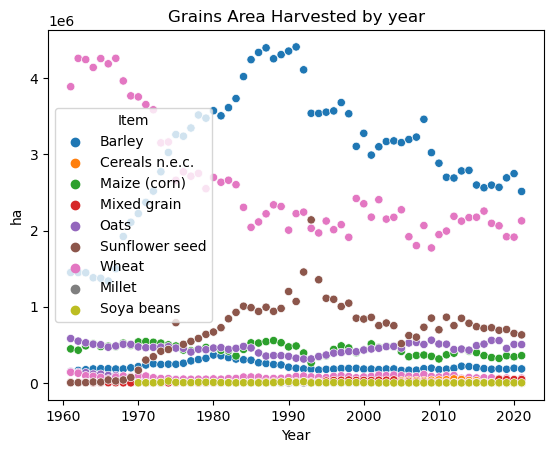

In [301]:
sns.scatterplot(data=df_QCL[df_QCL['Element']=='Area harvested'], x="Year", y="Value", hue='Item')
plt.ylabel(df_QCL['Unit'][df_QCL['Element']=='Area harvested'].unique()[0])
plt.xlabel('Year')
plt.title('Grains Area Harvested by year')
plt.show()
#this is a bad graph but it is the inspo for the next lot of graphs

In [302]:
df_QCL['Unit'][df_QCL['Element']=='Area harvested'].unique()[0]

'ha'

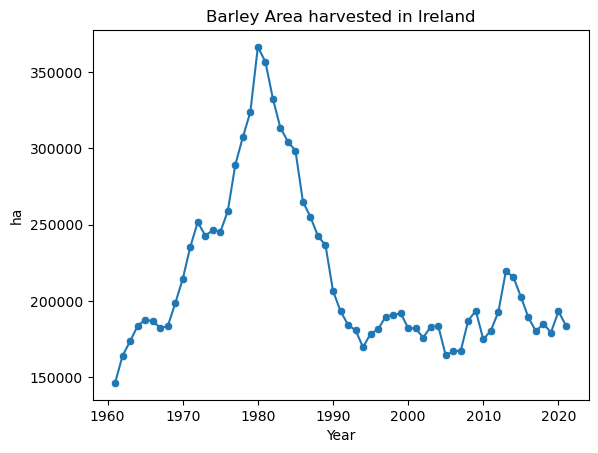

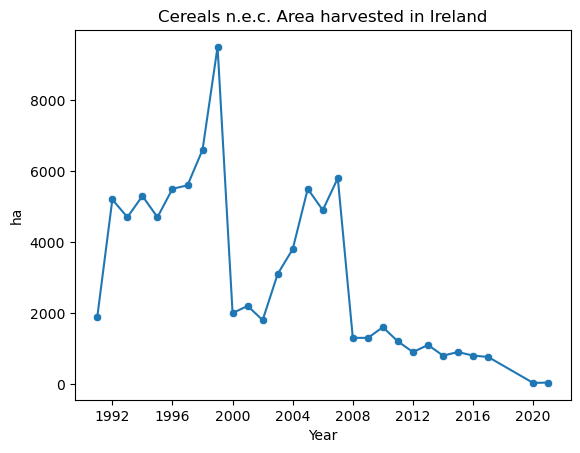

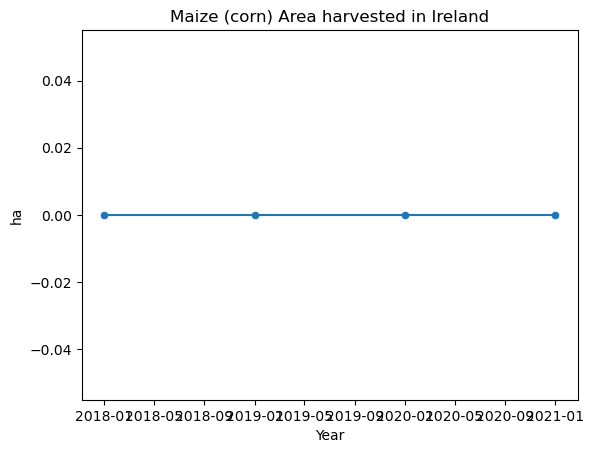

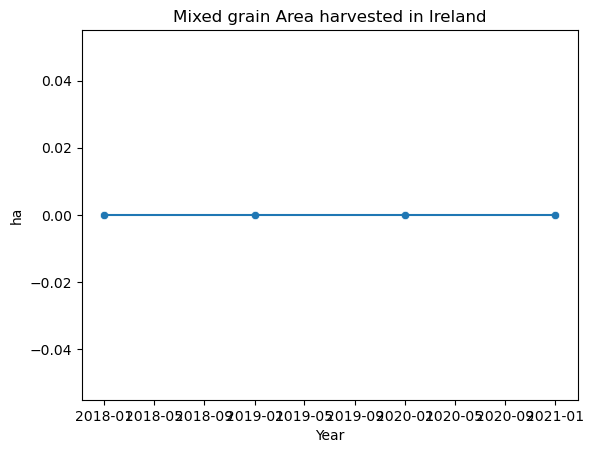

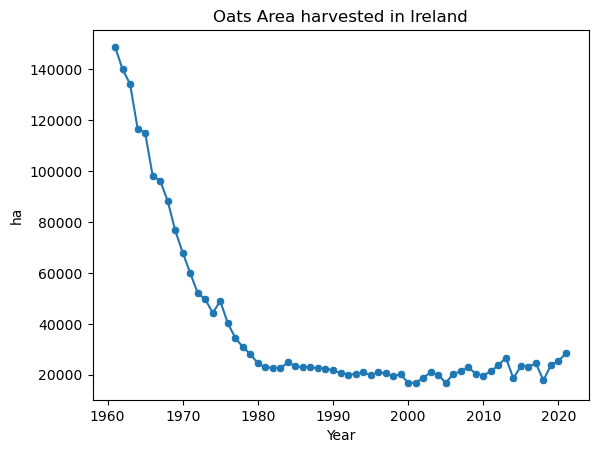

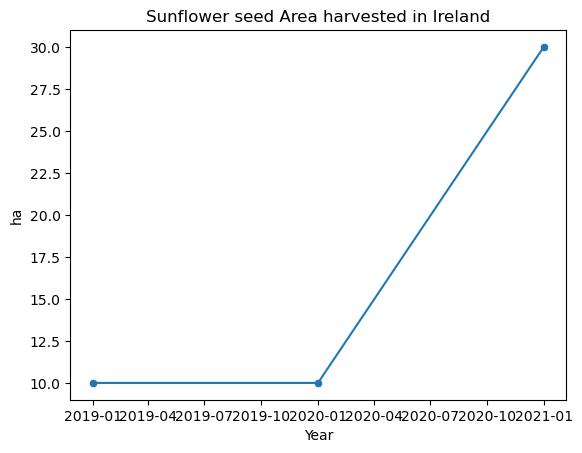

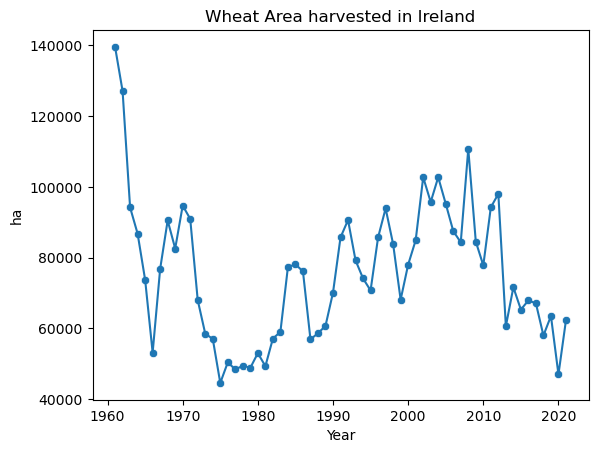

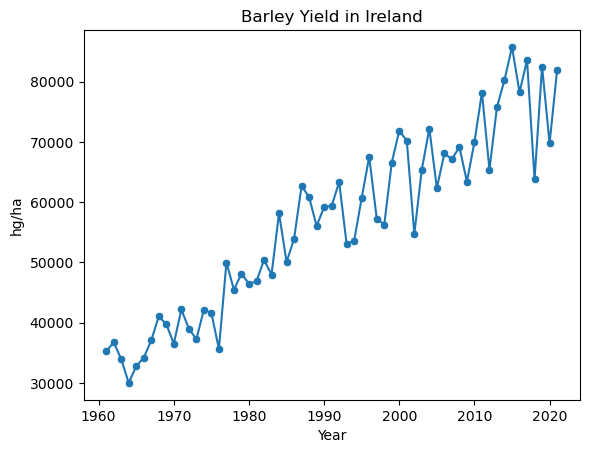

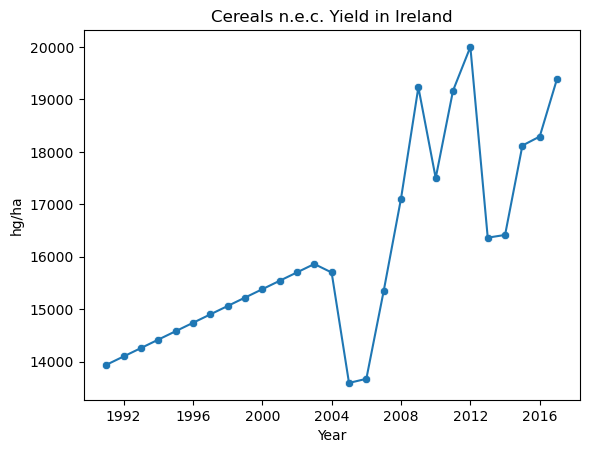

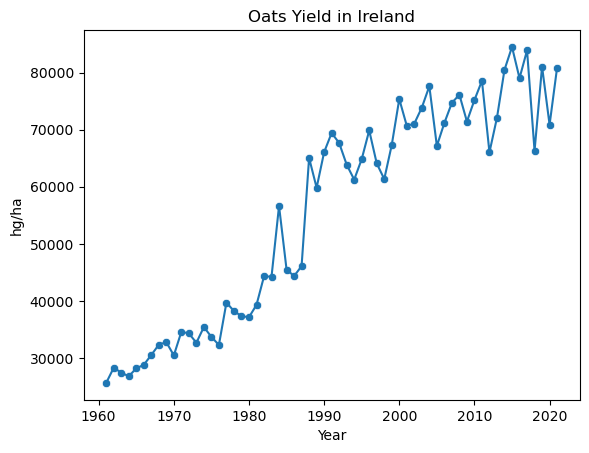

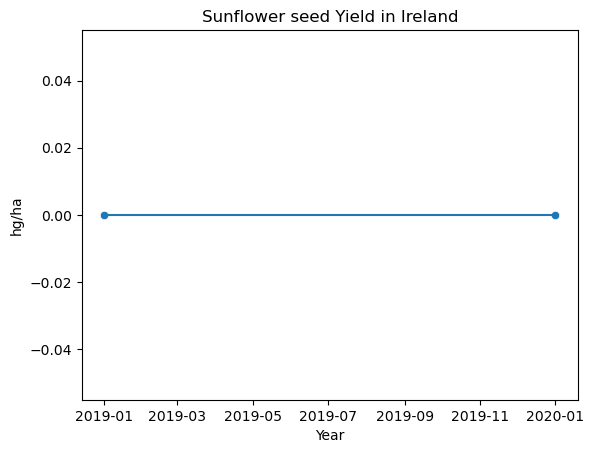

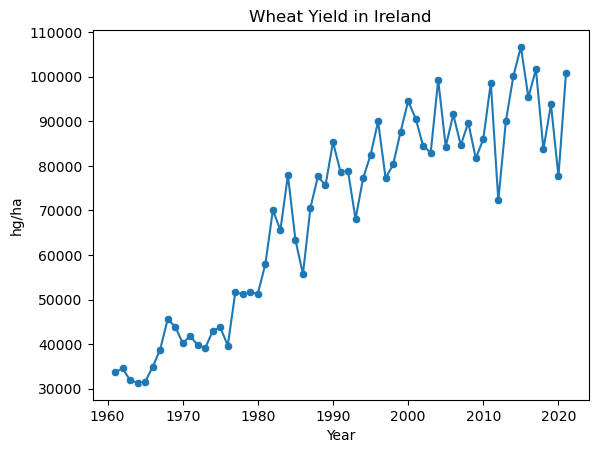

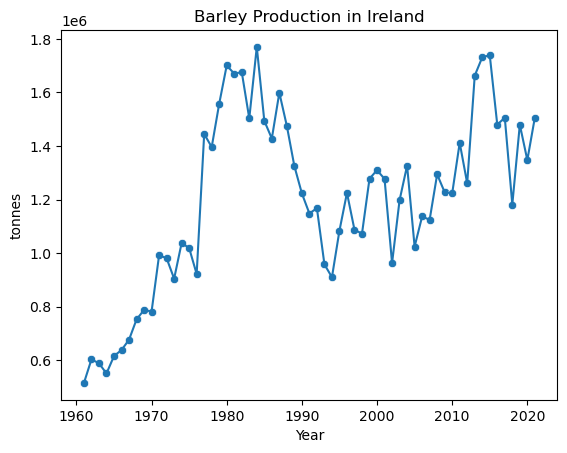

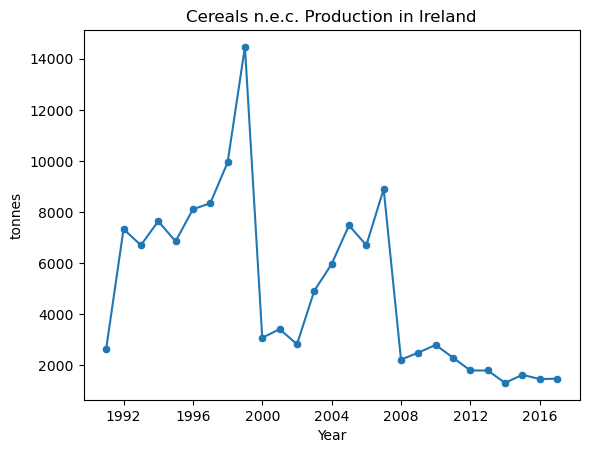

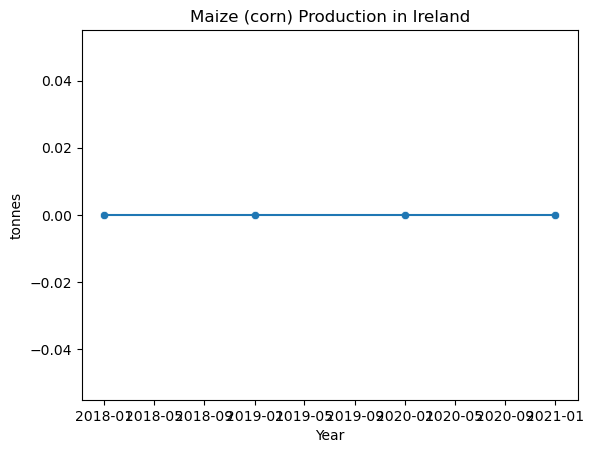

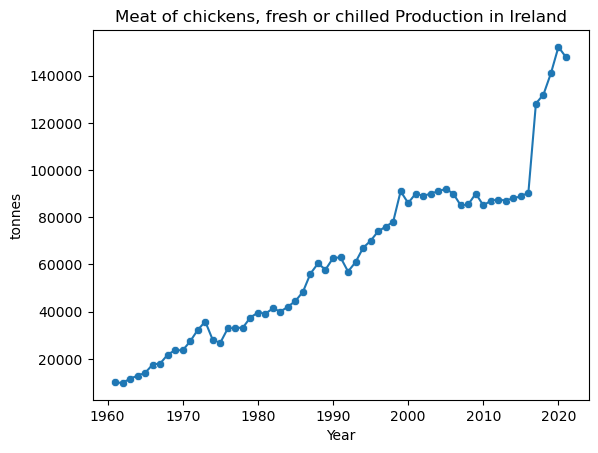

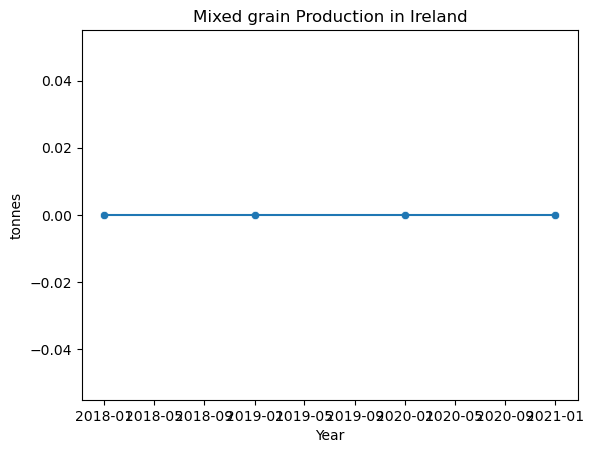

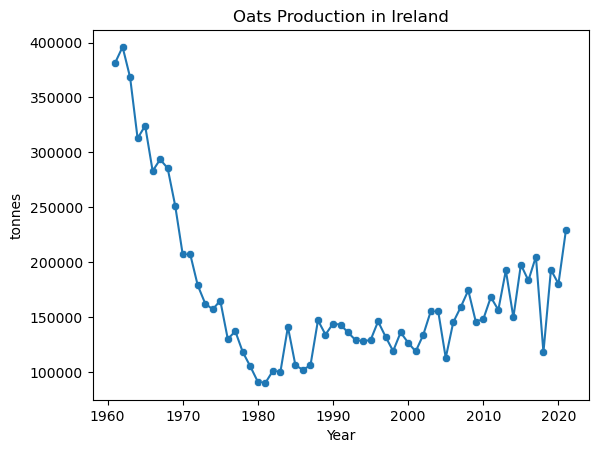

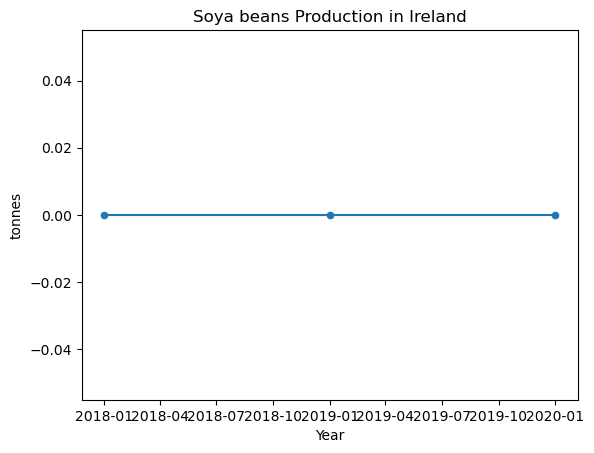

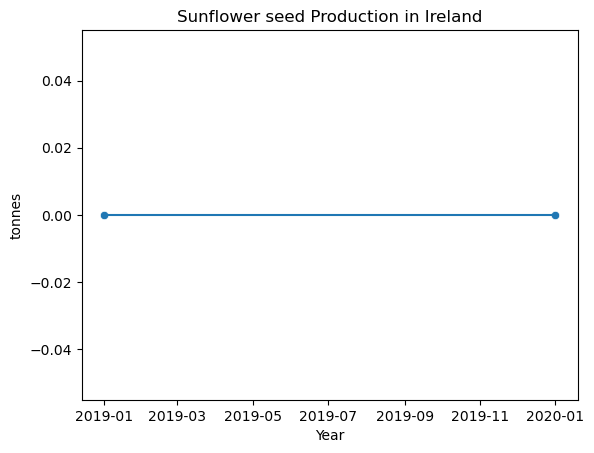

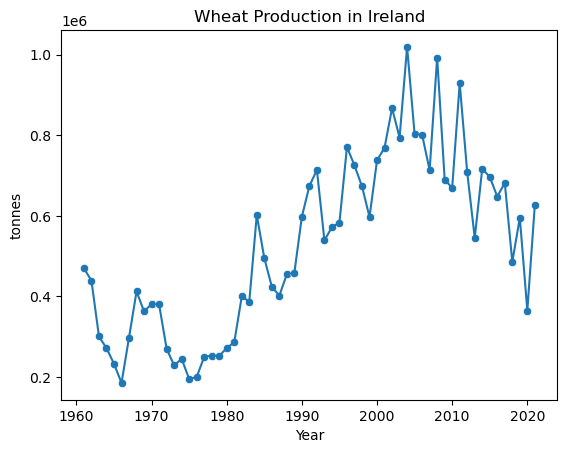

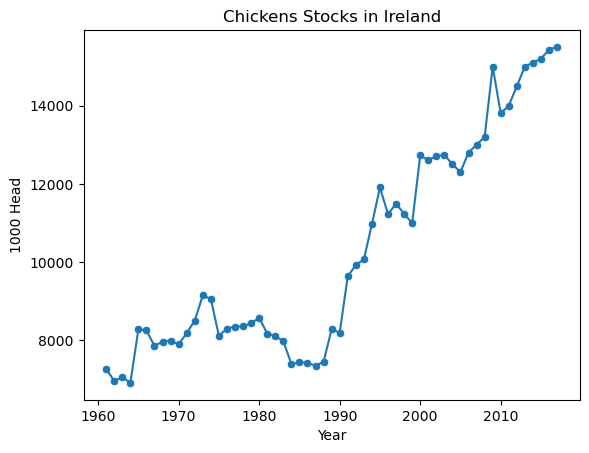

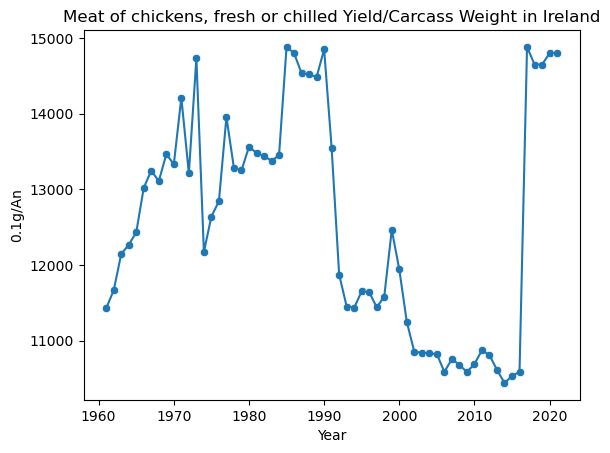

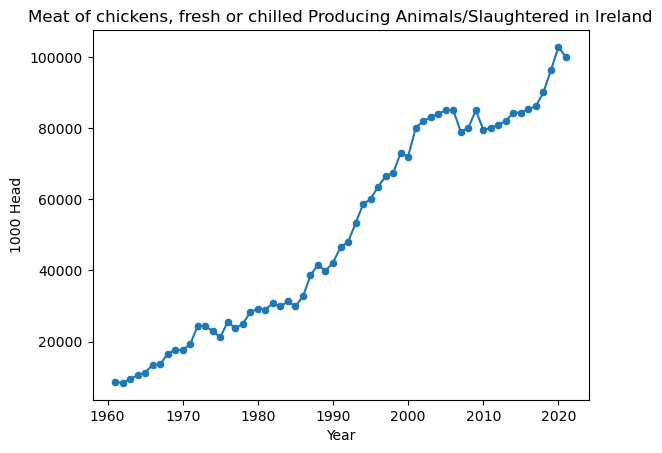

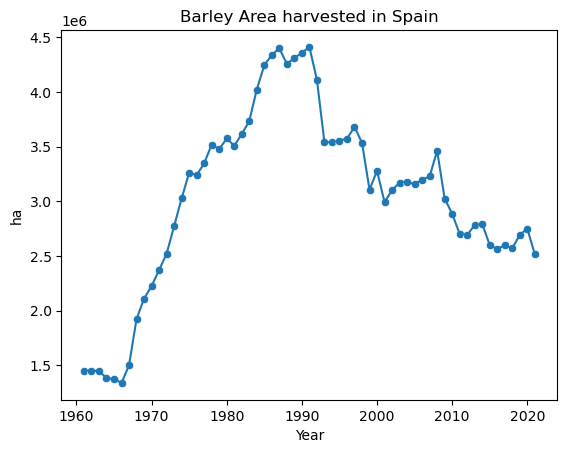

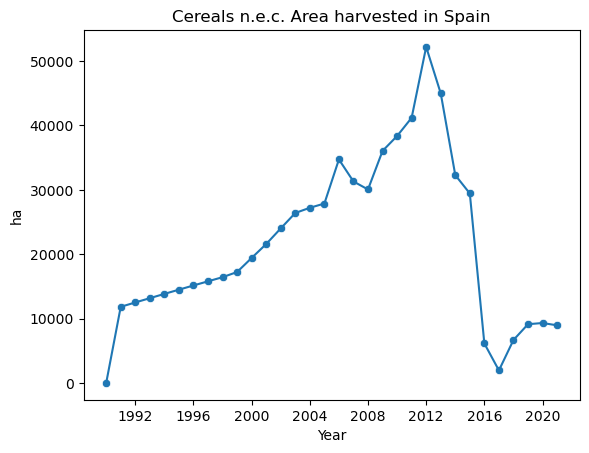

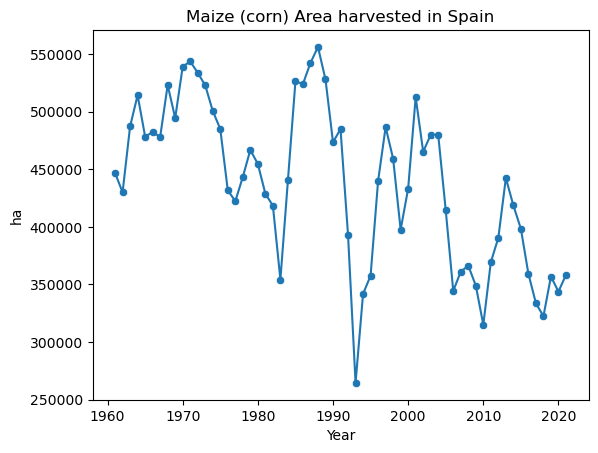

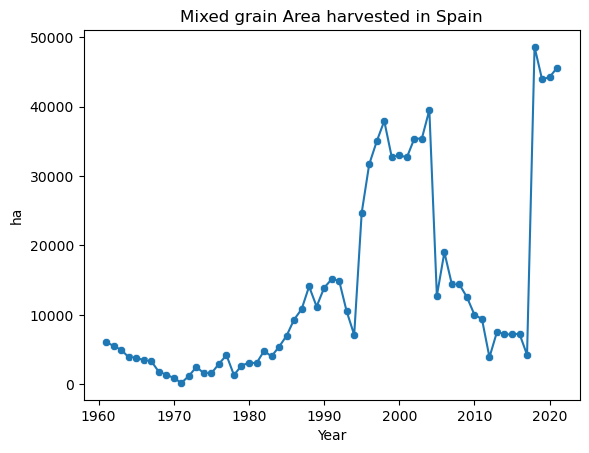

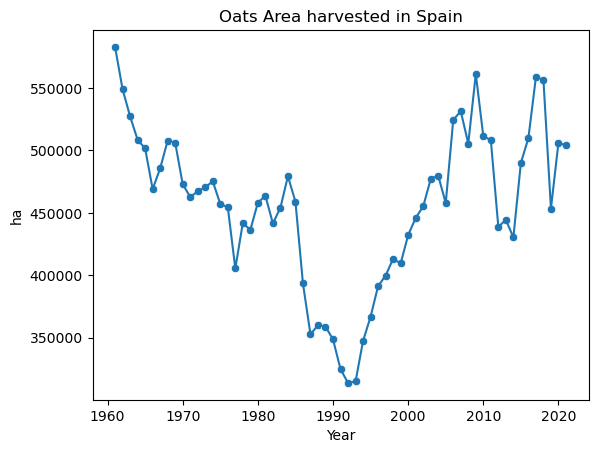

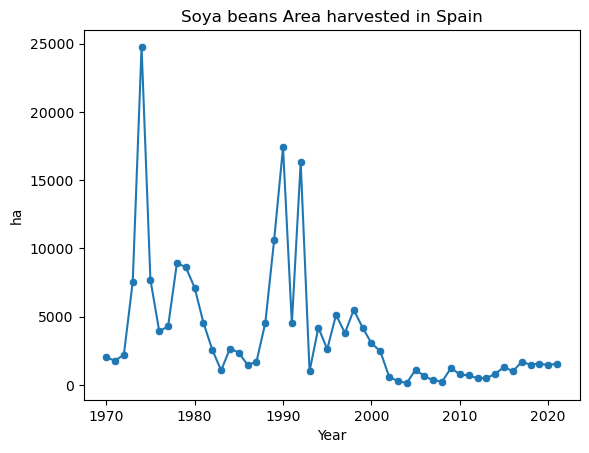

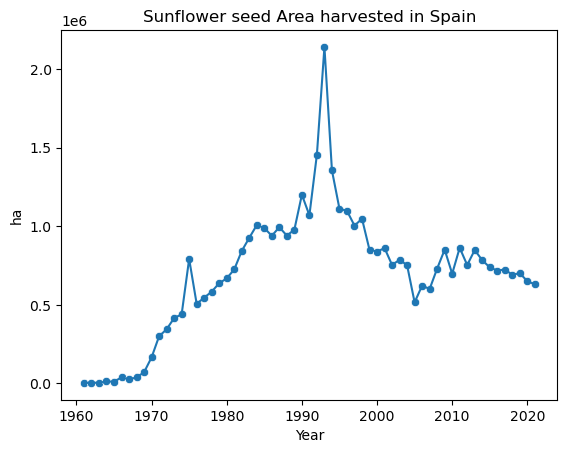

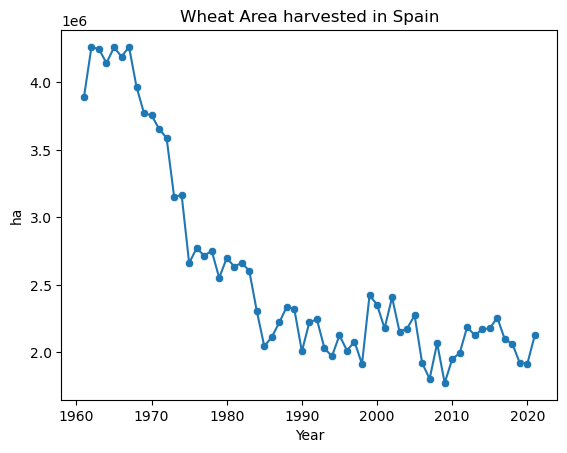

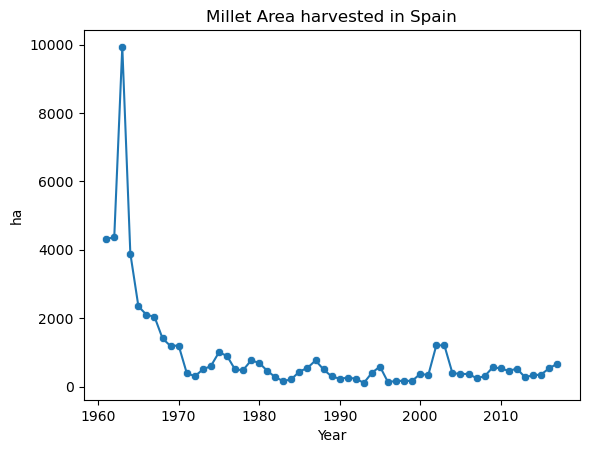

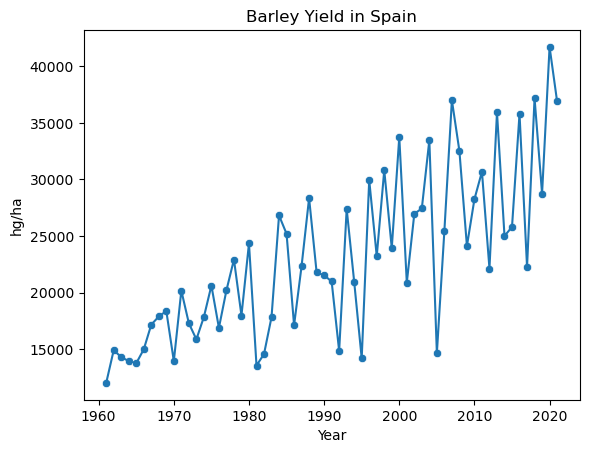

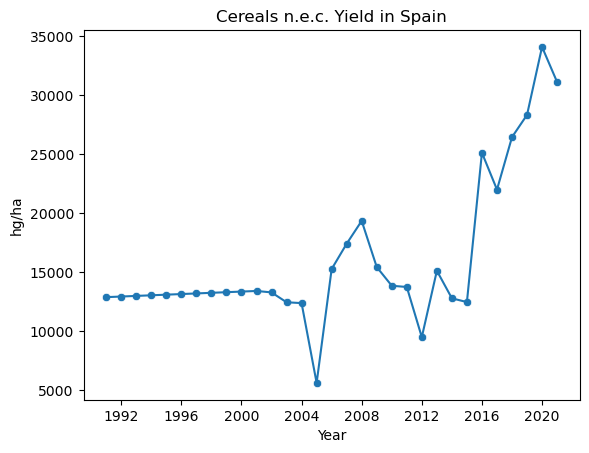

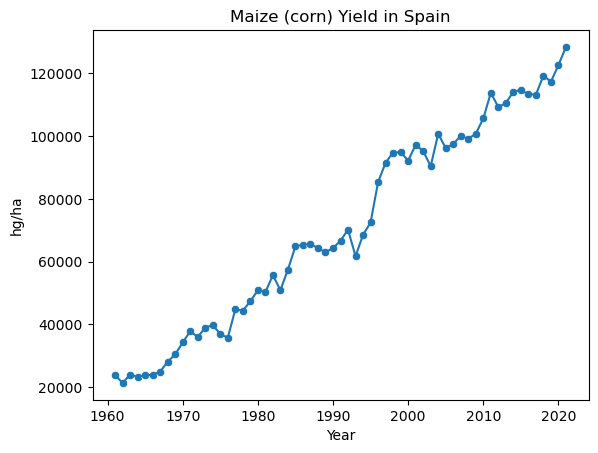

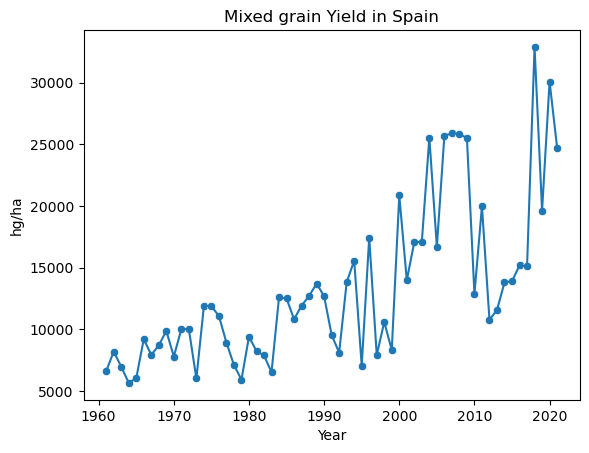

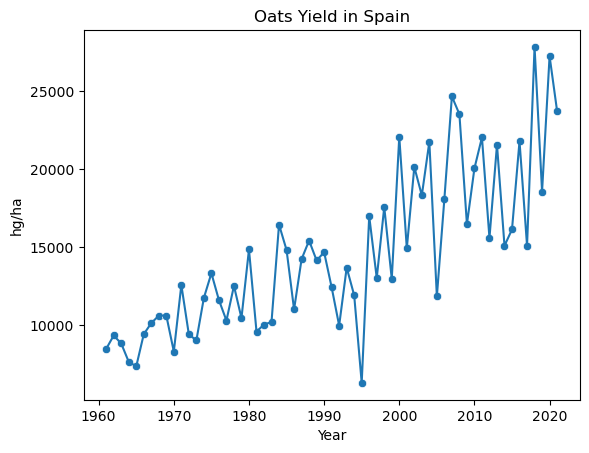

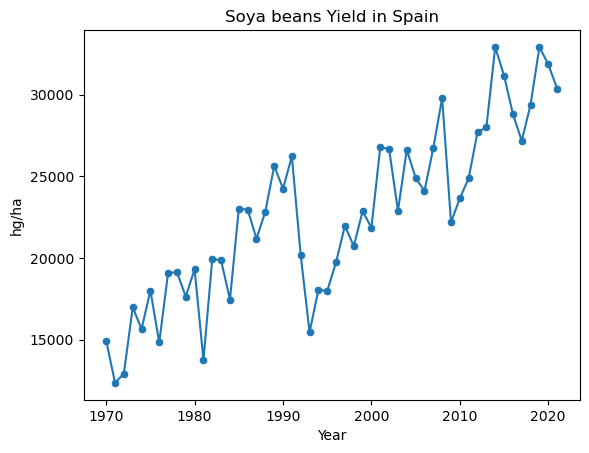

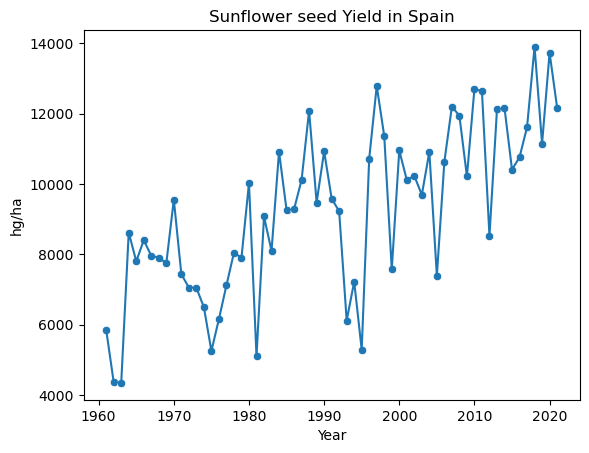

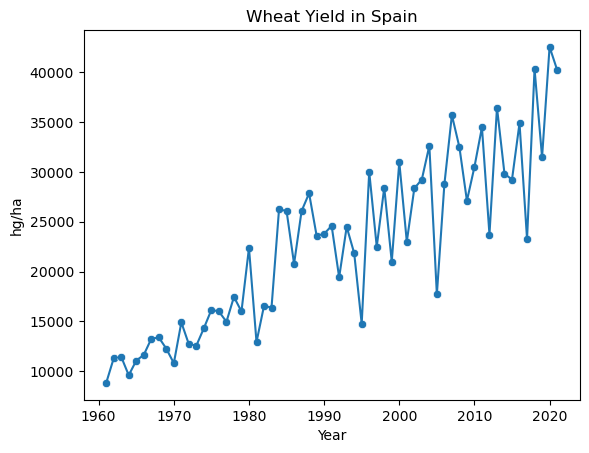

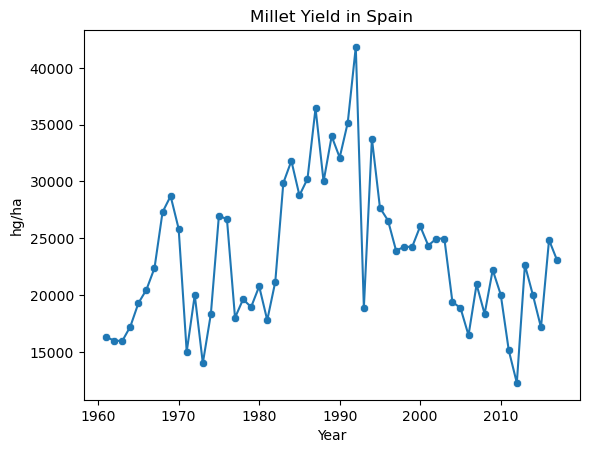

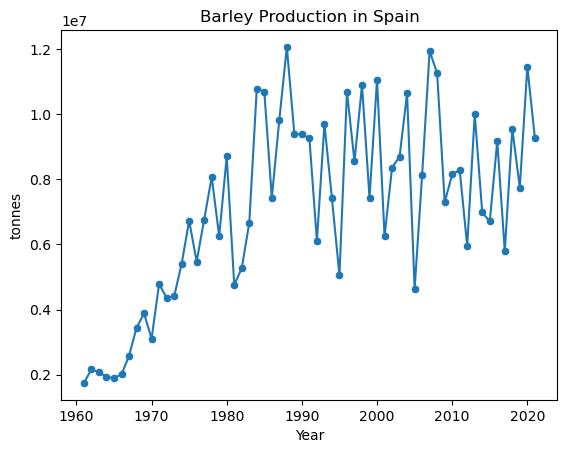

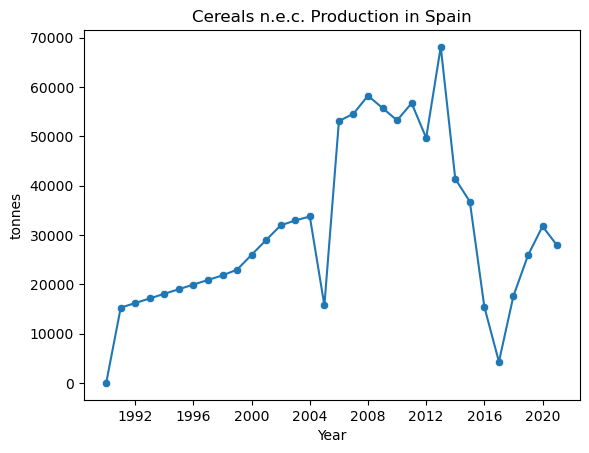

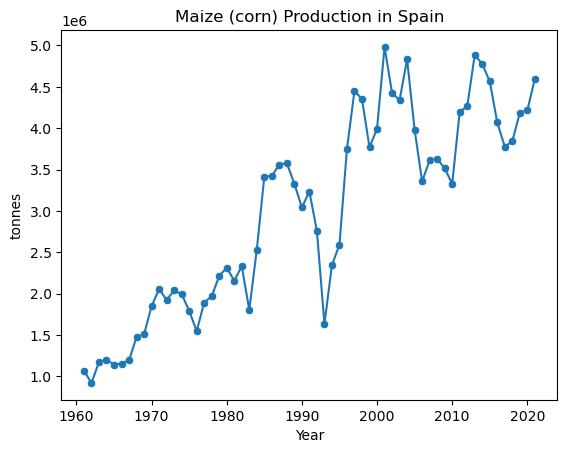

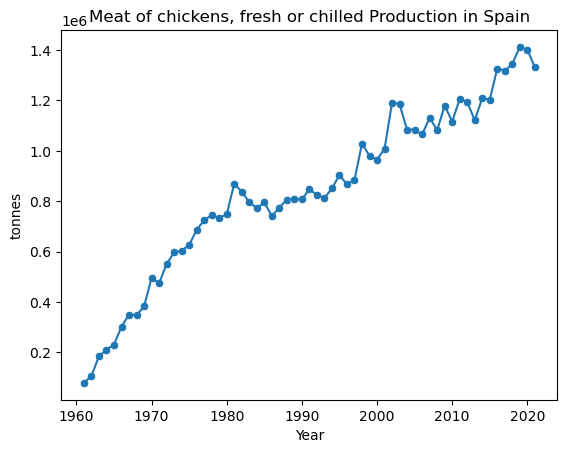

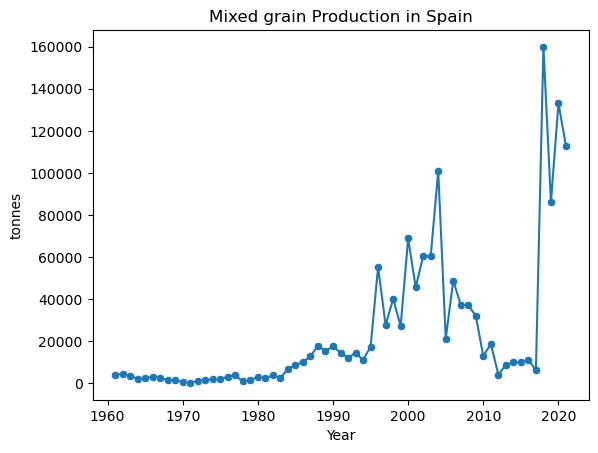

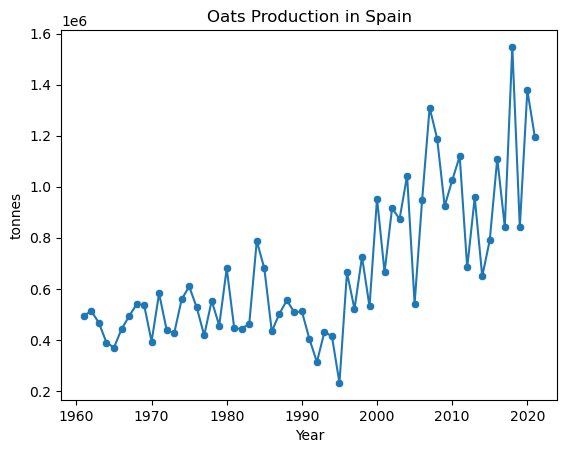

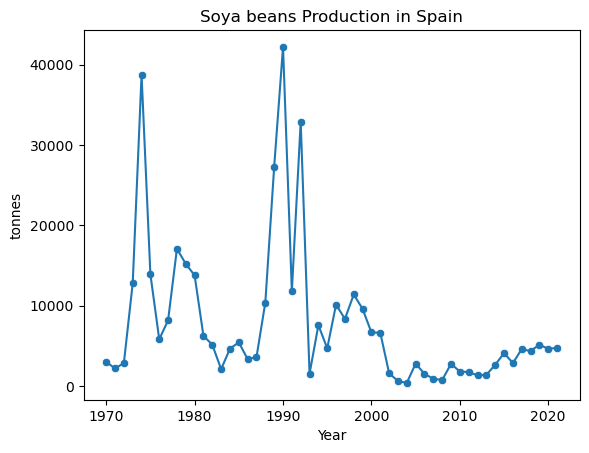

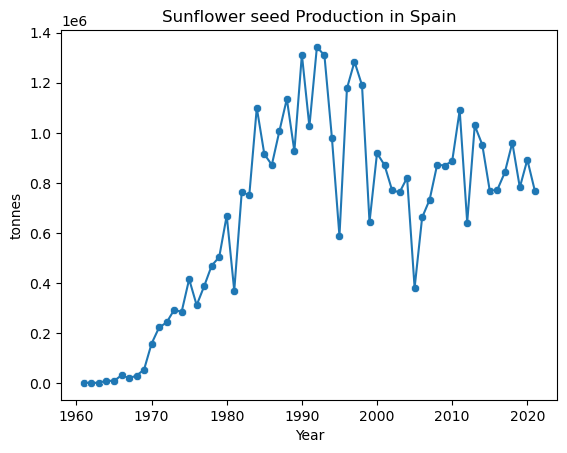

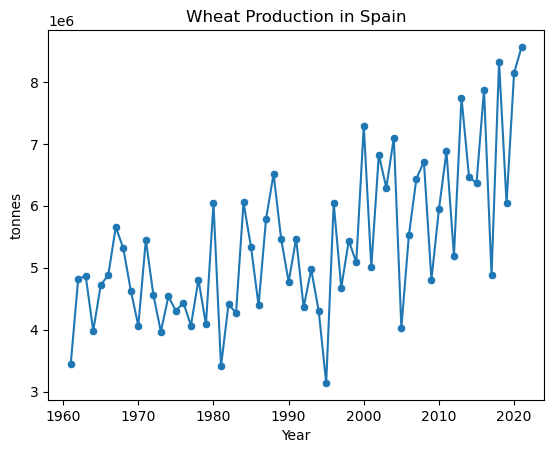

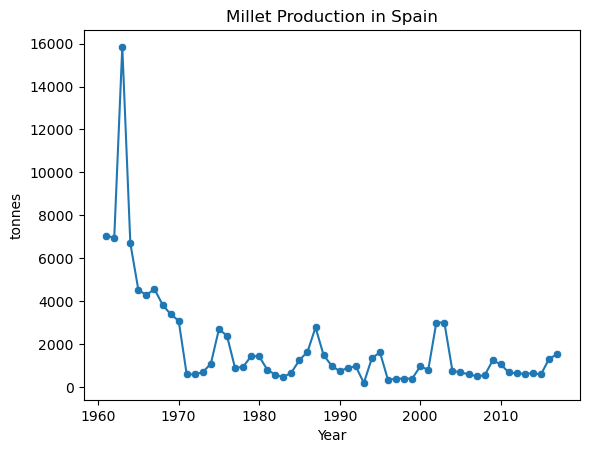

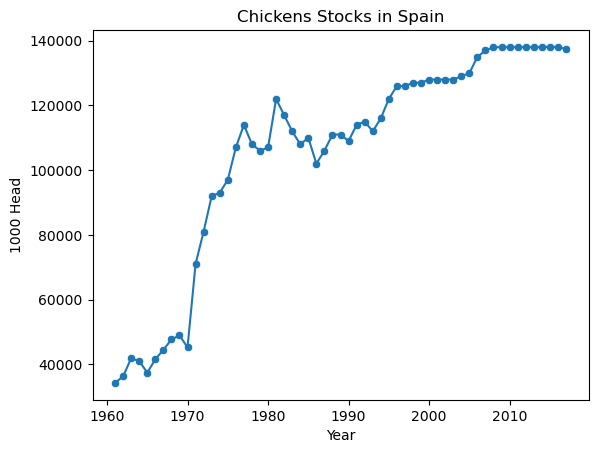

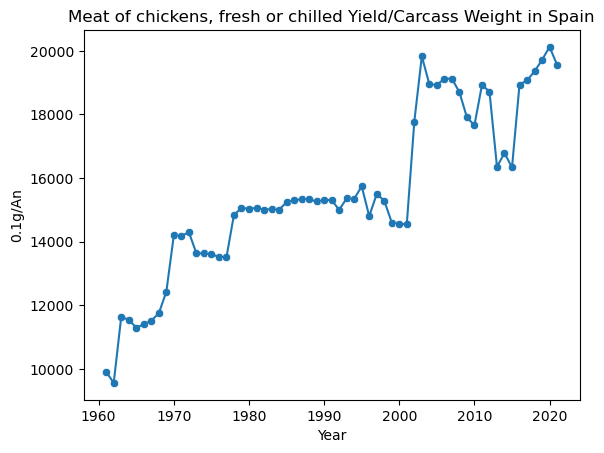

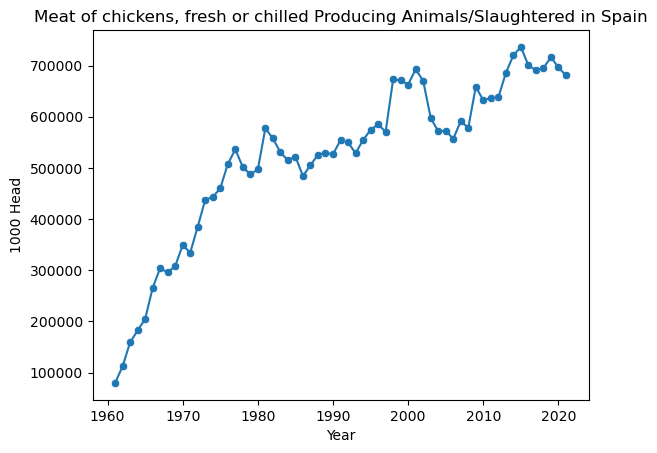

In [303]:
#graphs of all the item elements for Ireland and then Spain in the Production: Crops and livestock products dataset

for country in df_QCL['Area'].unique(): #ireland and spain
    for element in df_QCL['Element'].unique(): #area harvested, yield, production, etc.
        for item in df_QCL['Item'].unique(): #barley, wheat, maize, chicken, etc.
            
            df = df_QCL[df_QCL['Area'] == country]
            df = df[df['Element'] == element]
            
            if item in df['Item'].values:

                sns.lineplot(data=df[df['Item']==item], x='Year', y='Value')
                sns.scatterplot(data=df[df['Item']==item], x='Year', y='Value')
                 
                plt.xlabel('Year')
                plt.ylabel(df['Unit'].unique()[0])
                plt.title(item + ' ' + element + ' in ' + country)
                plt.show()

In [304]:
#remove mixed grain, sunflower, soya and maize from irish dataset
#remove the lowest value counts data - done below

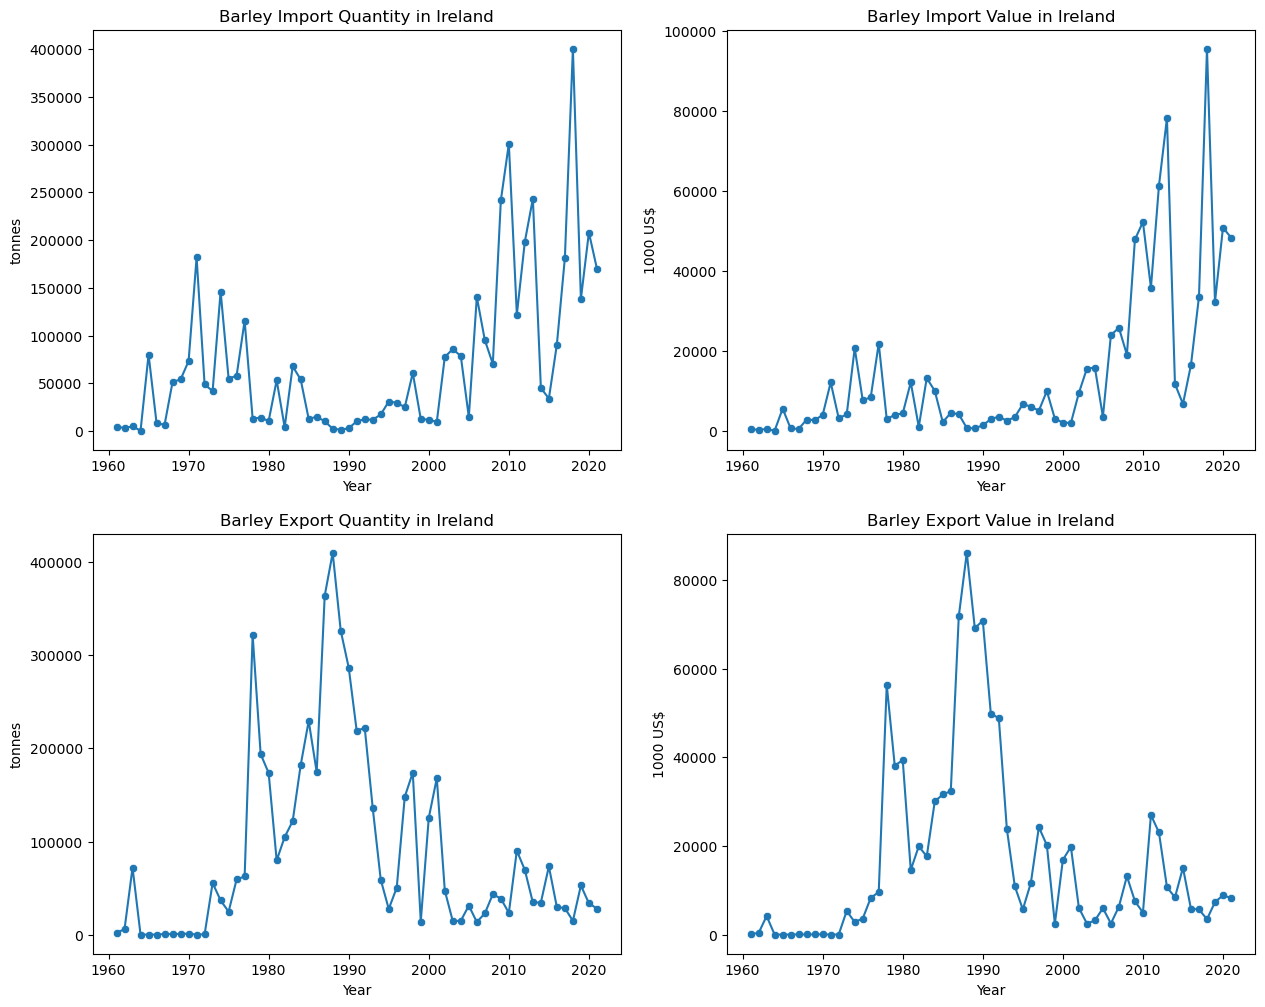

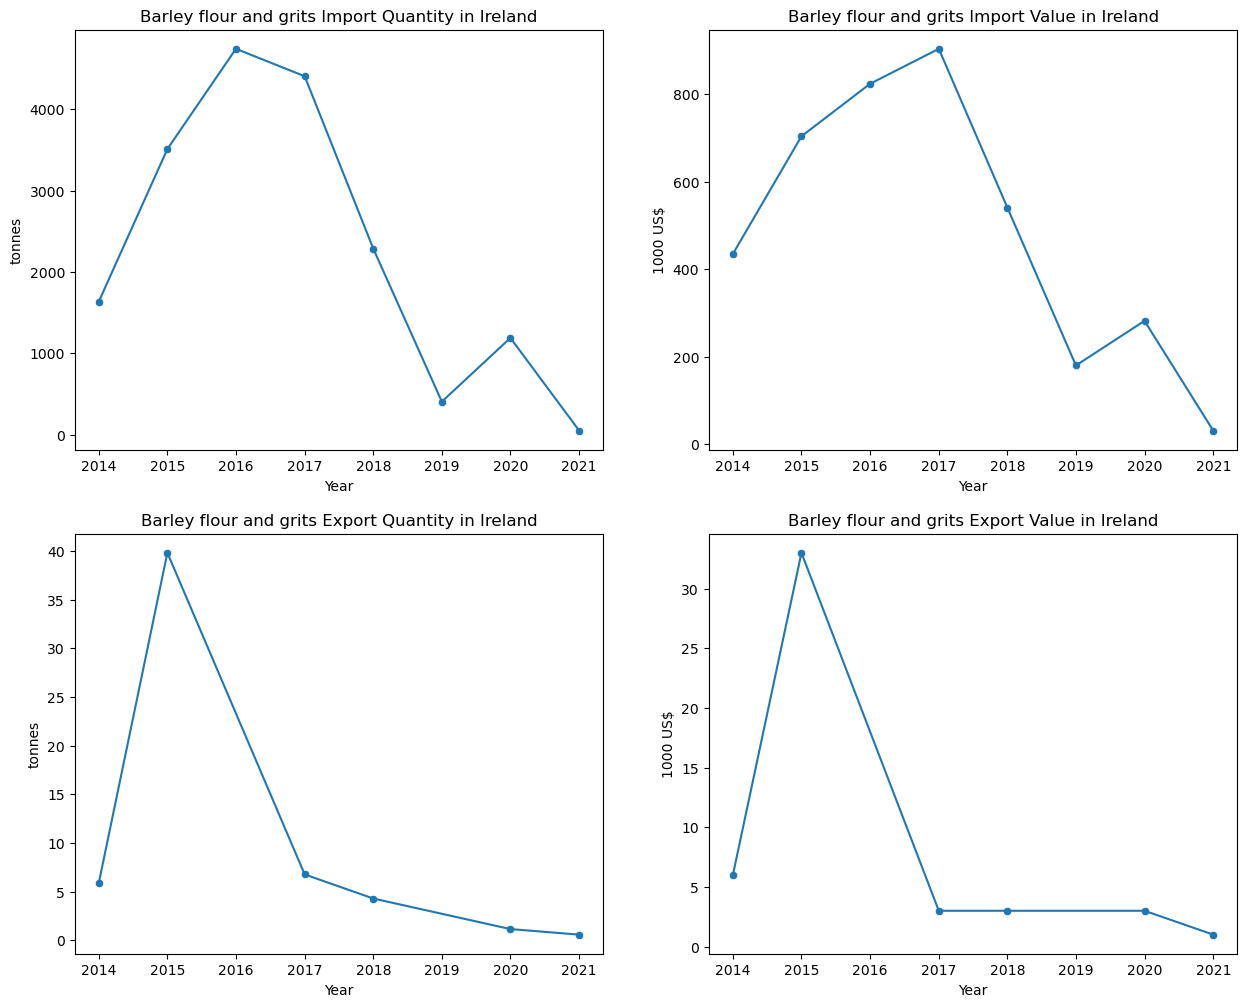

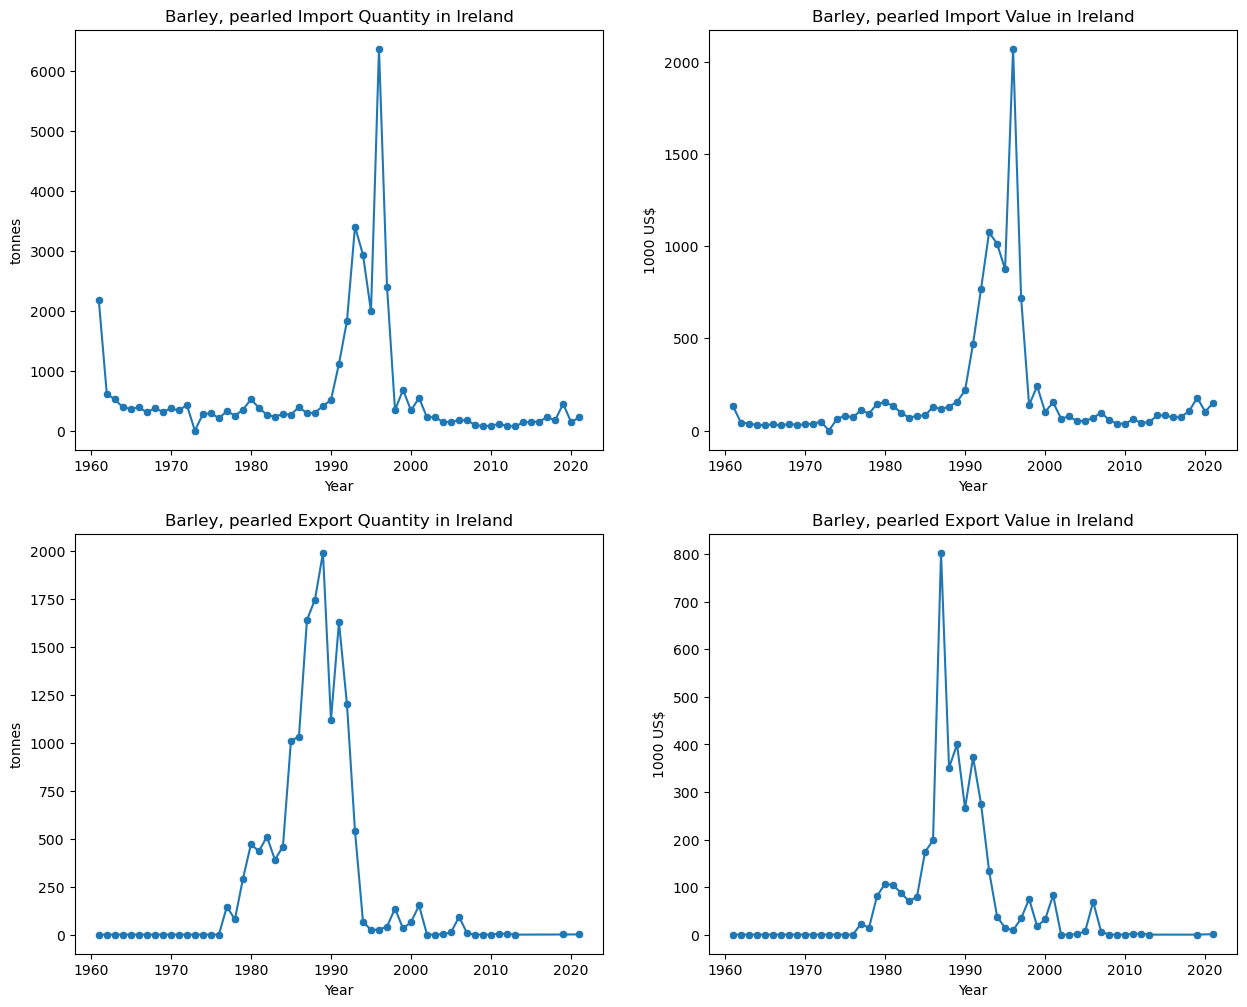

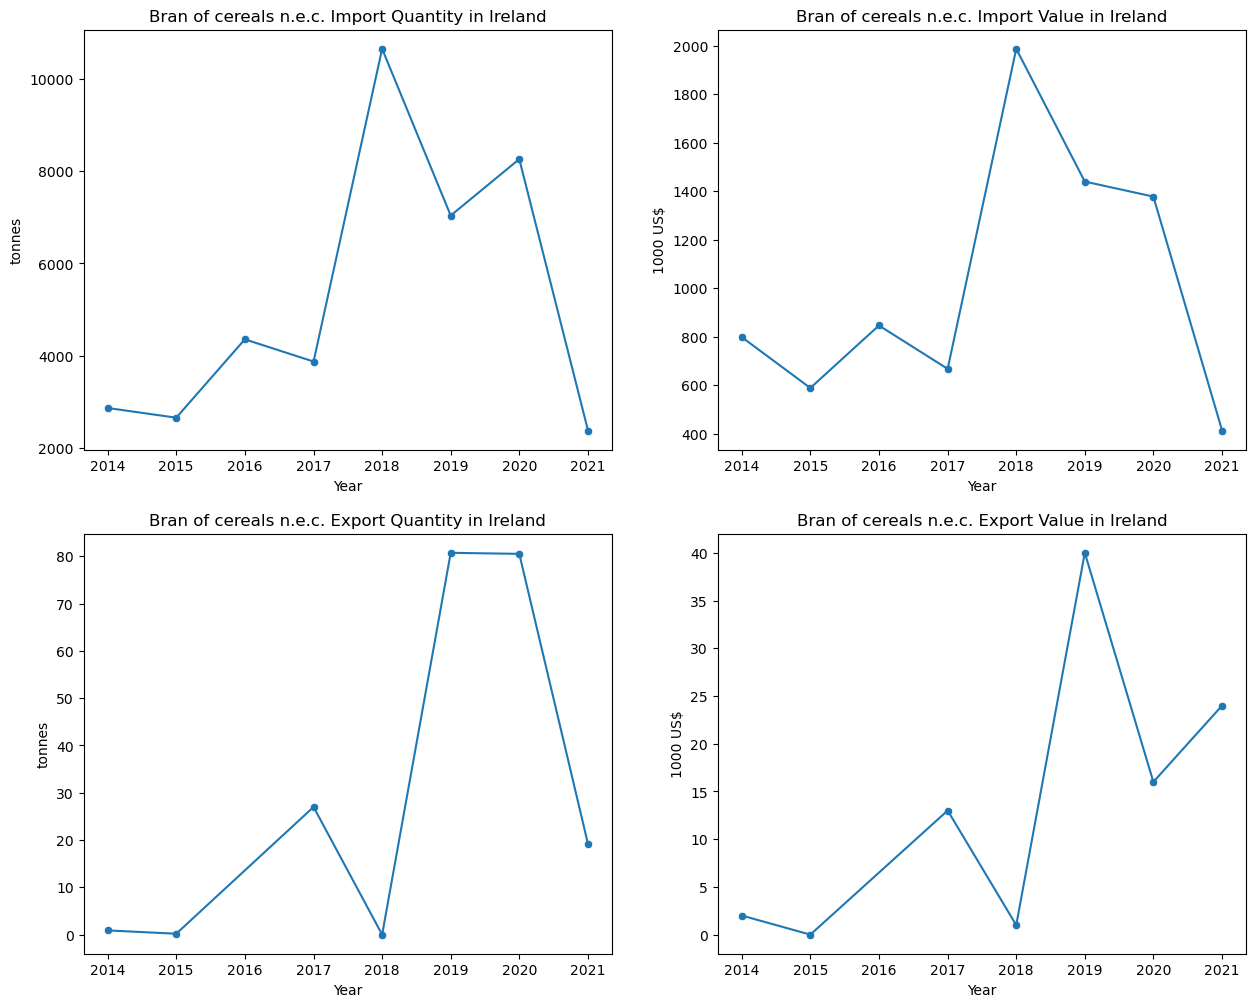

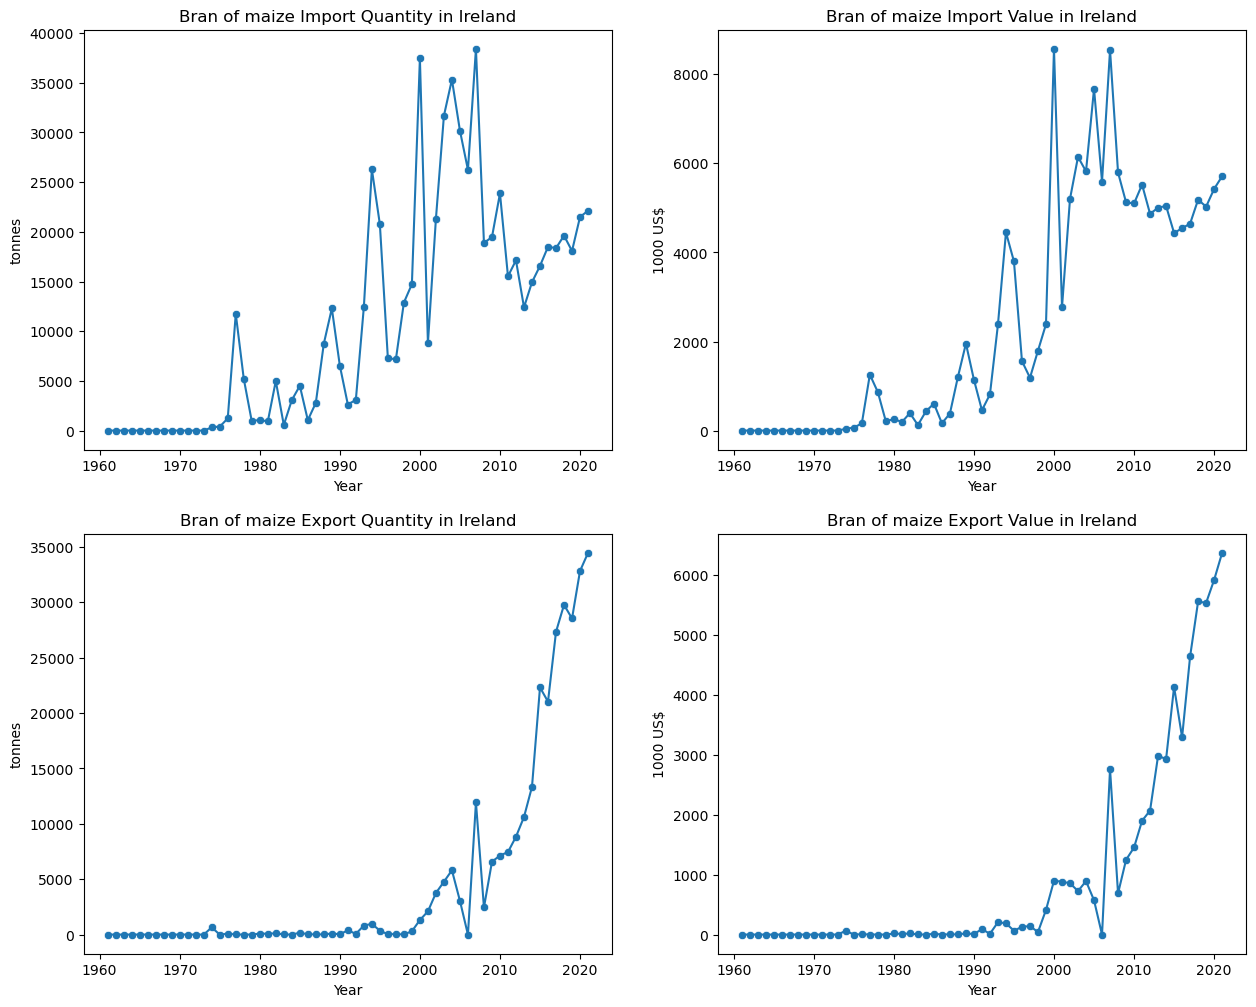

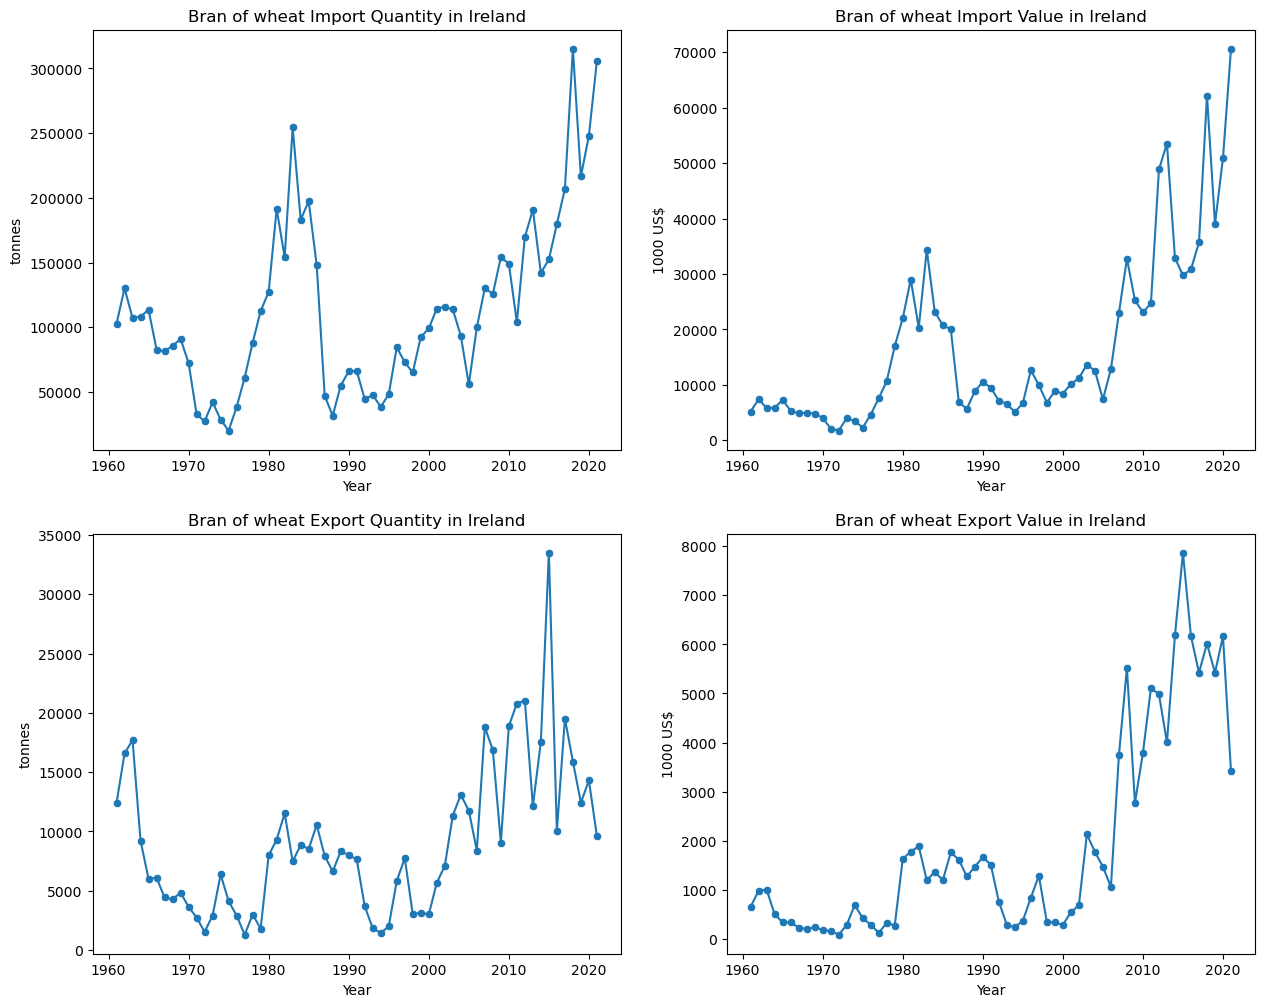

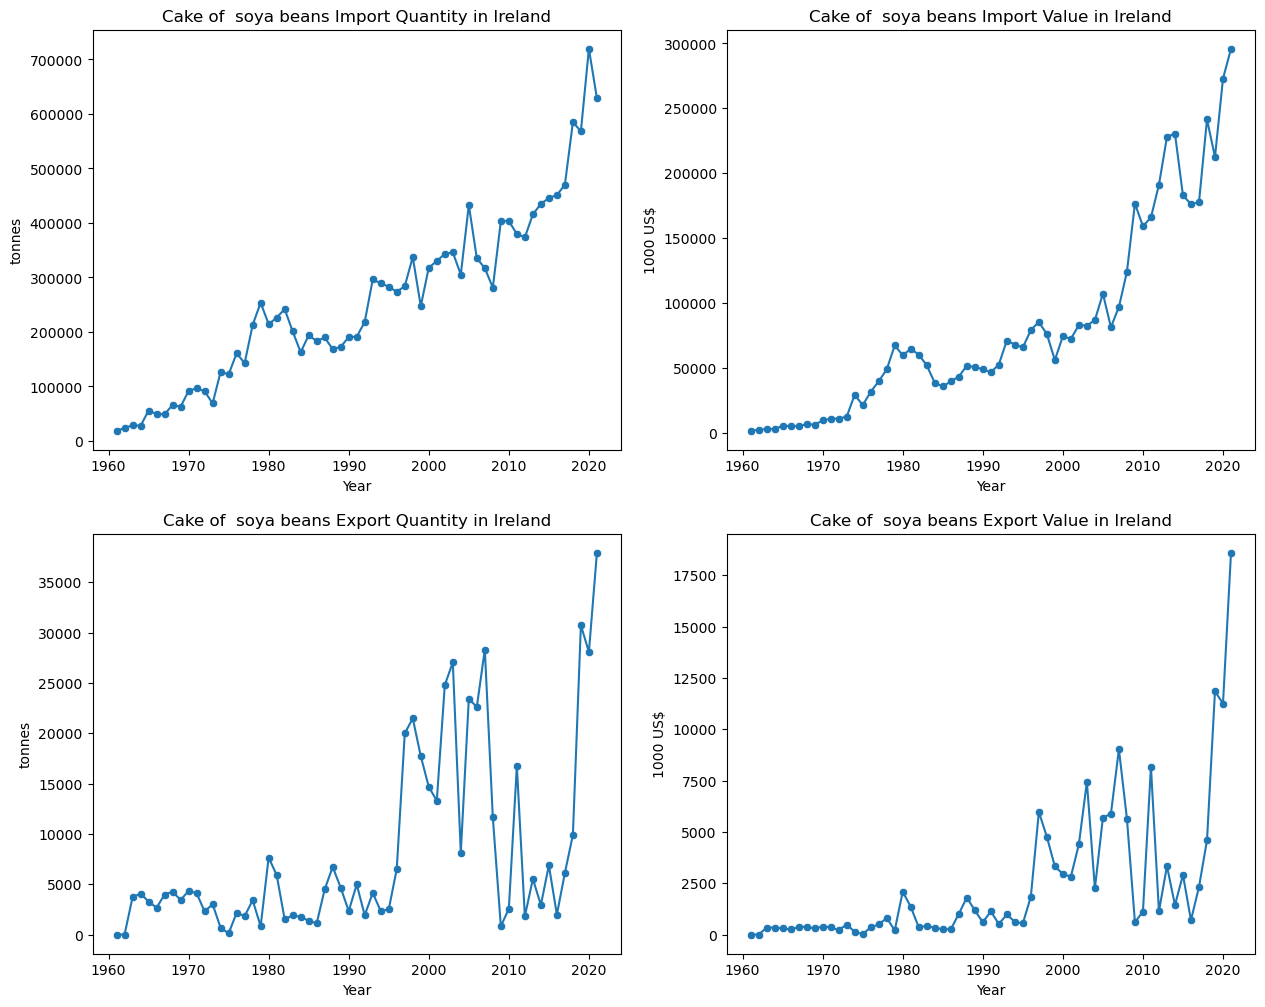

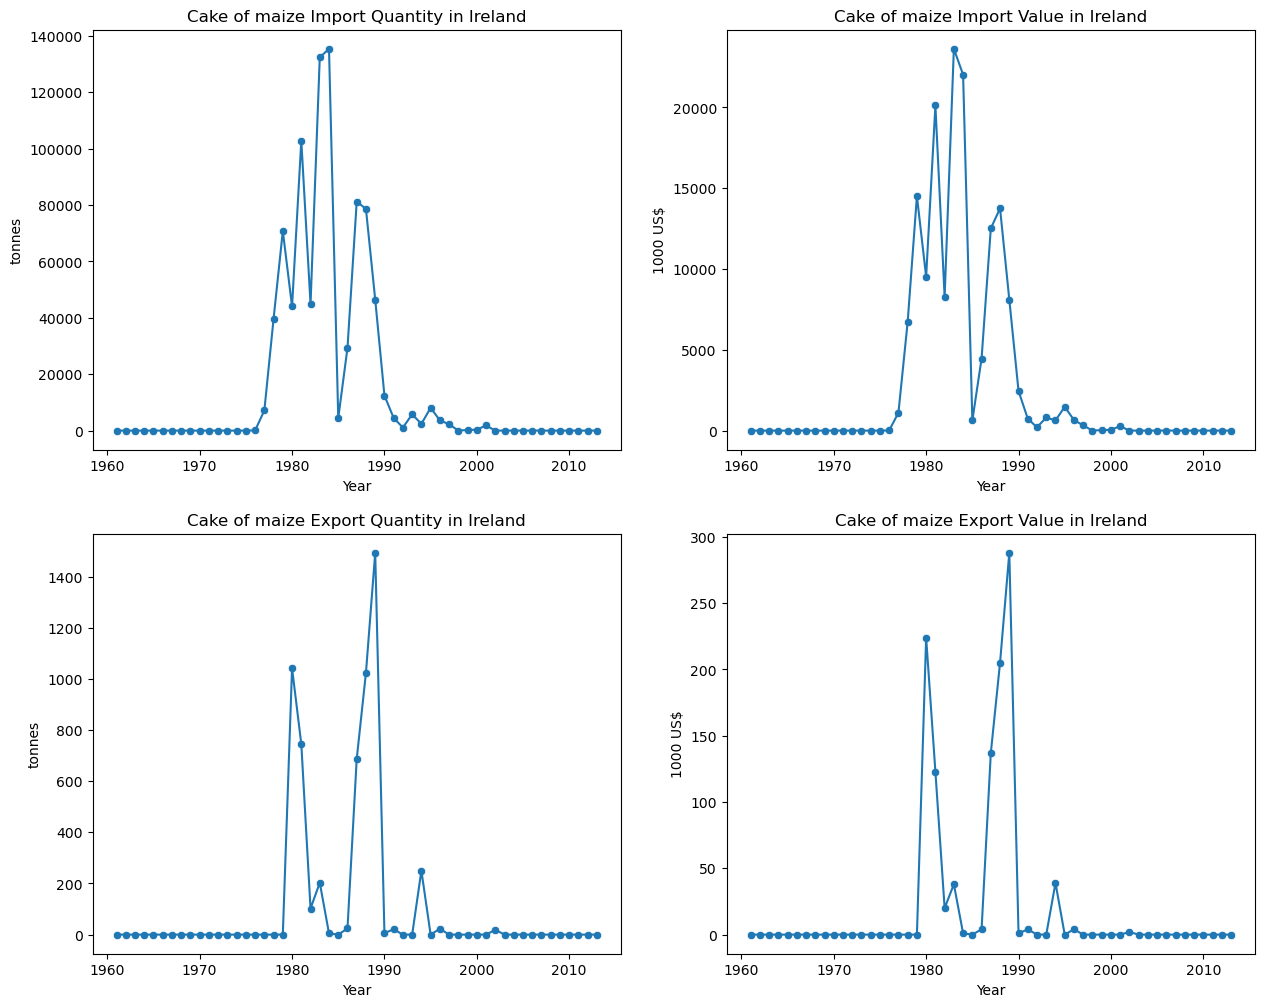

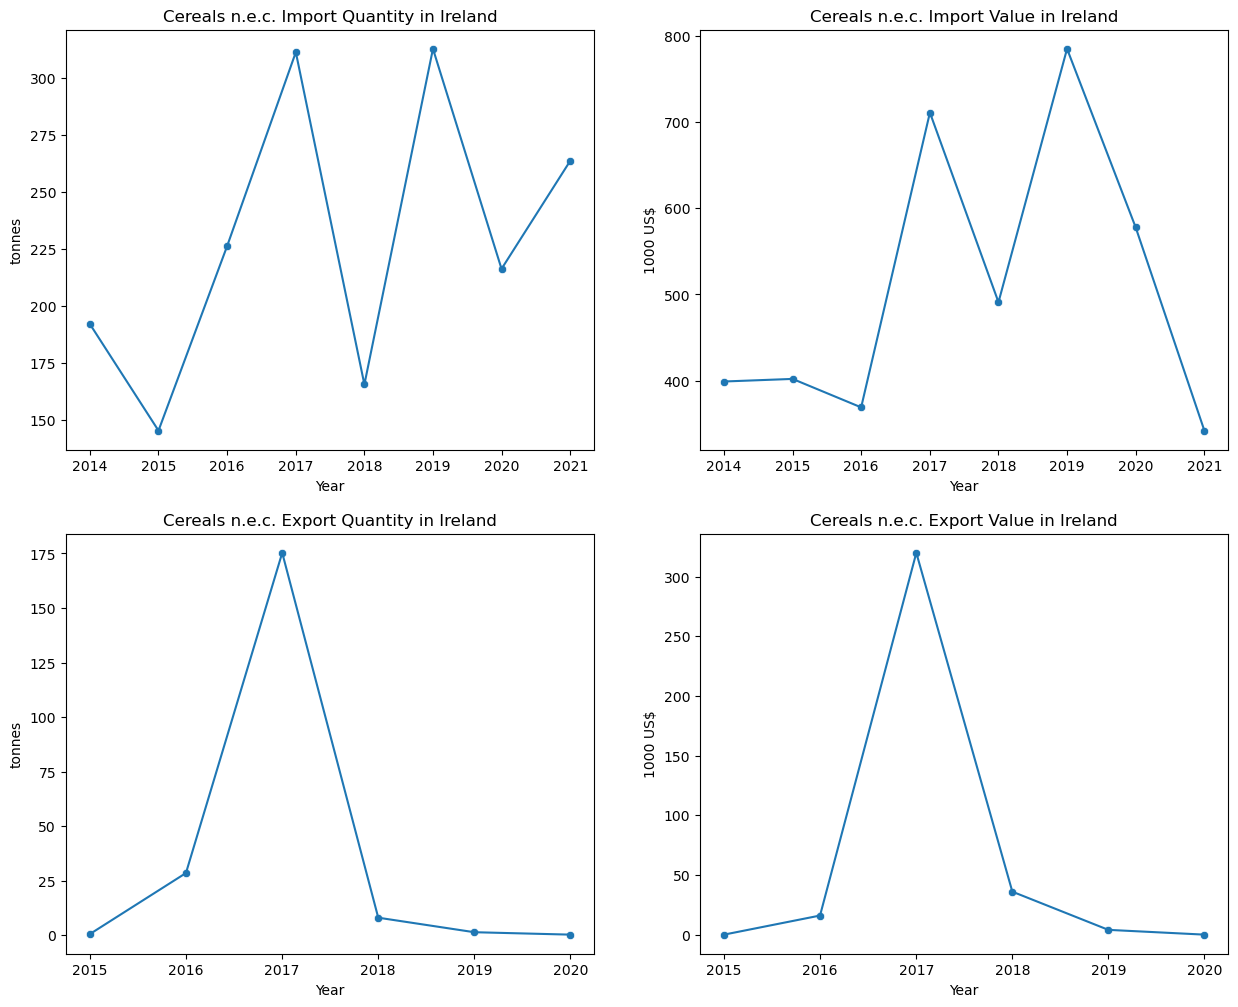

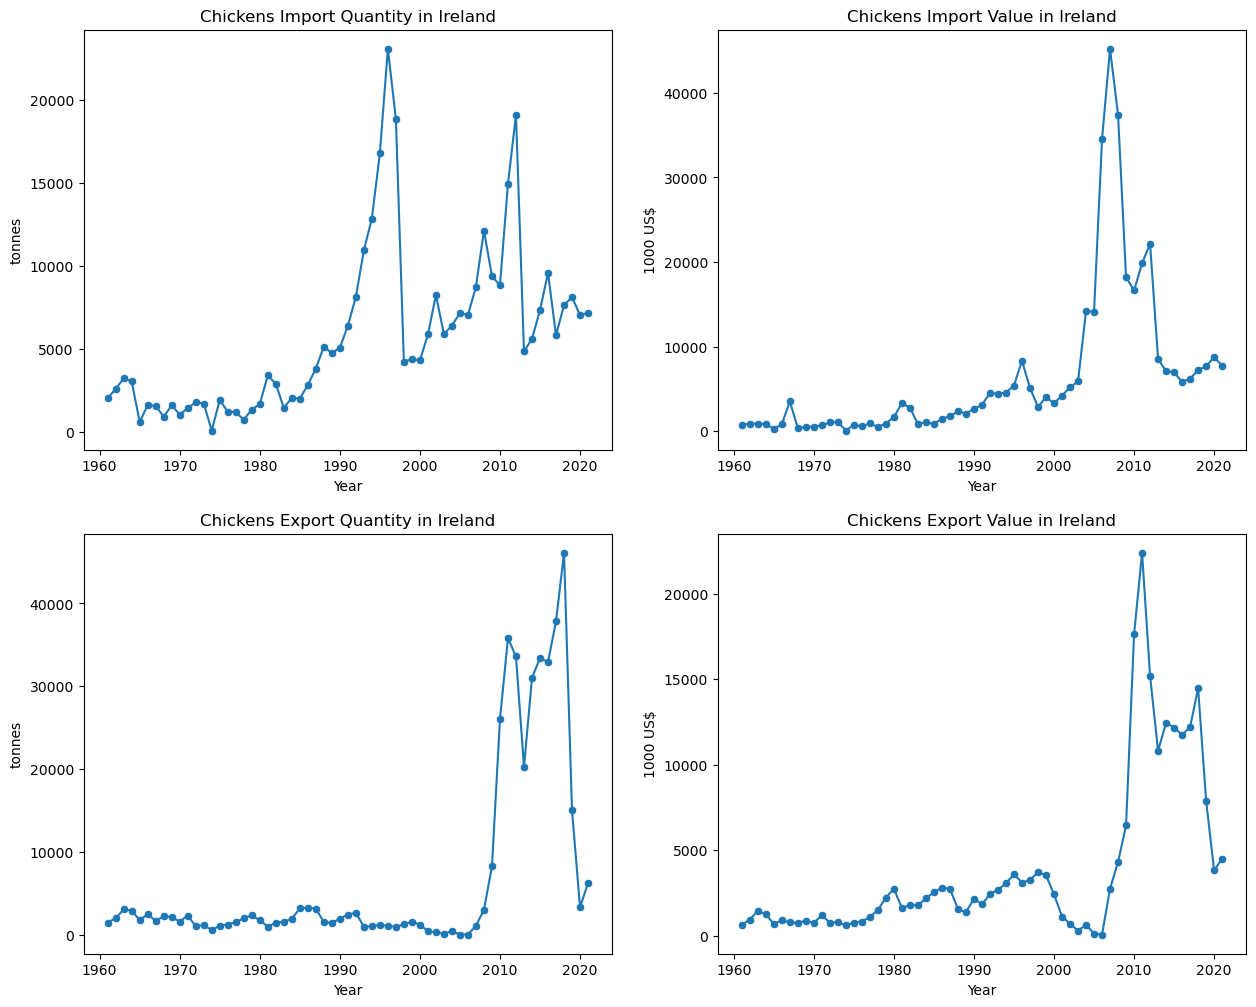

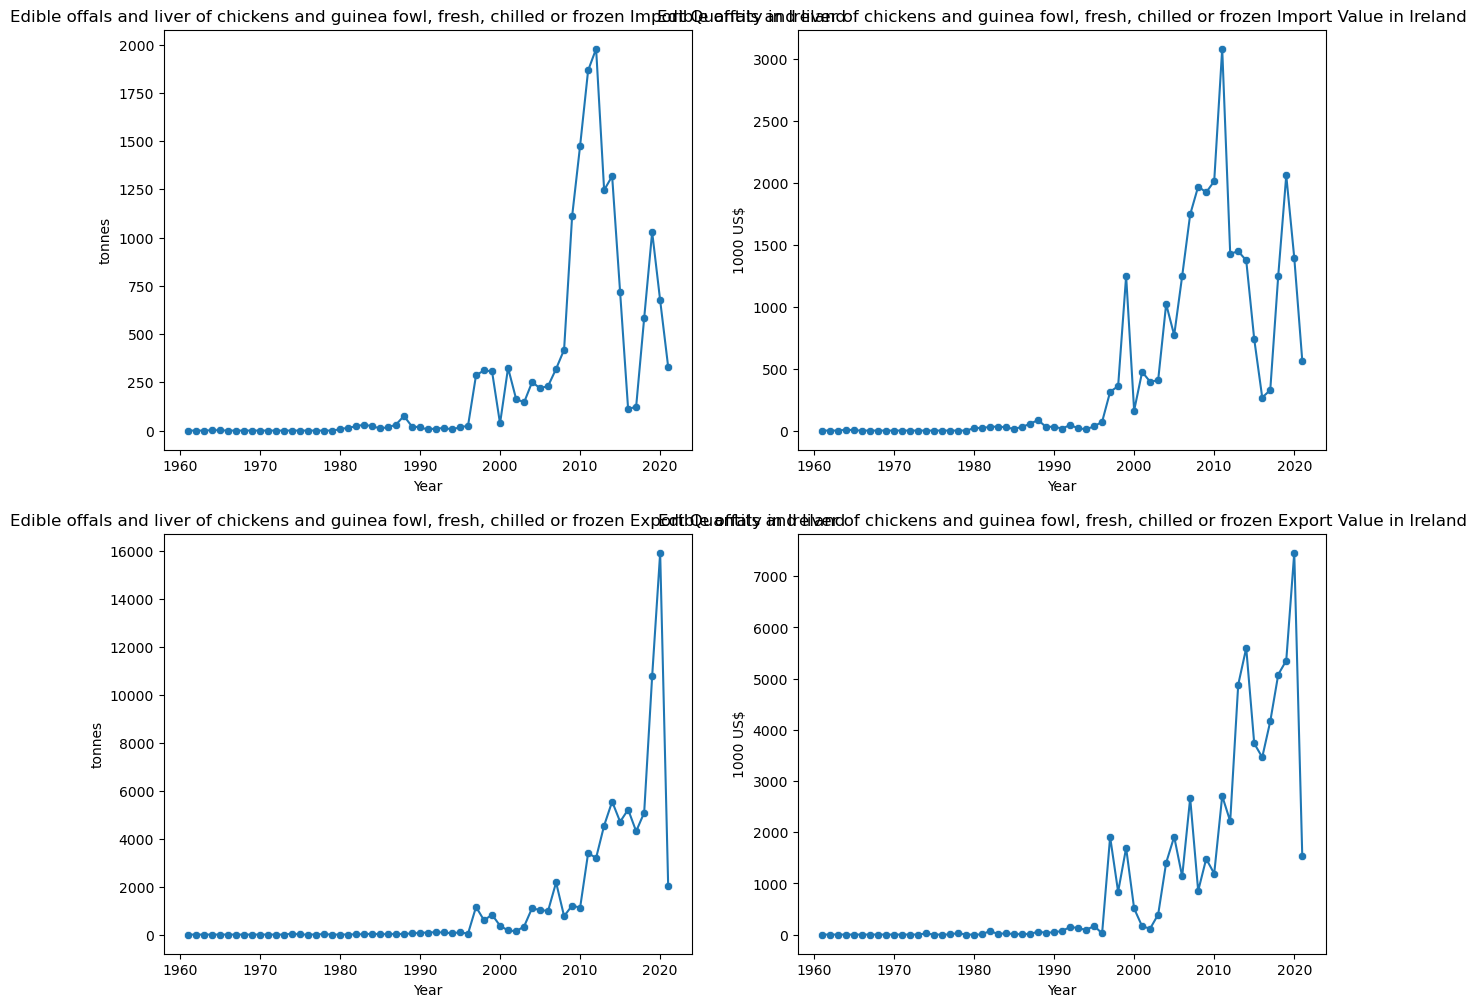

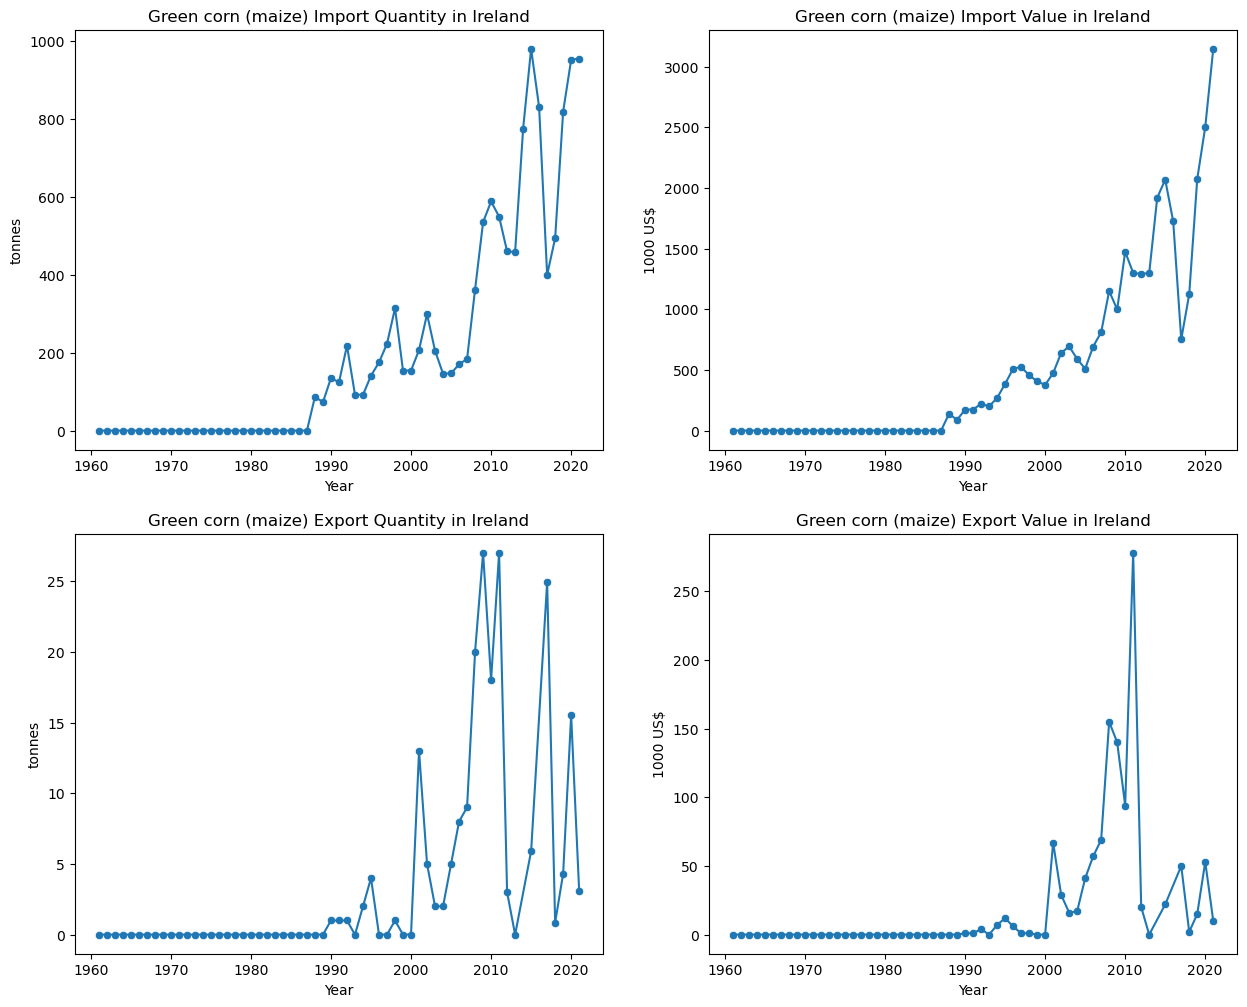

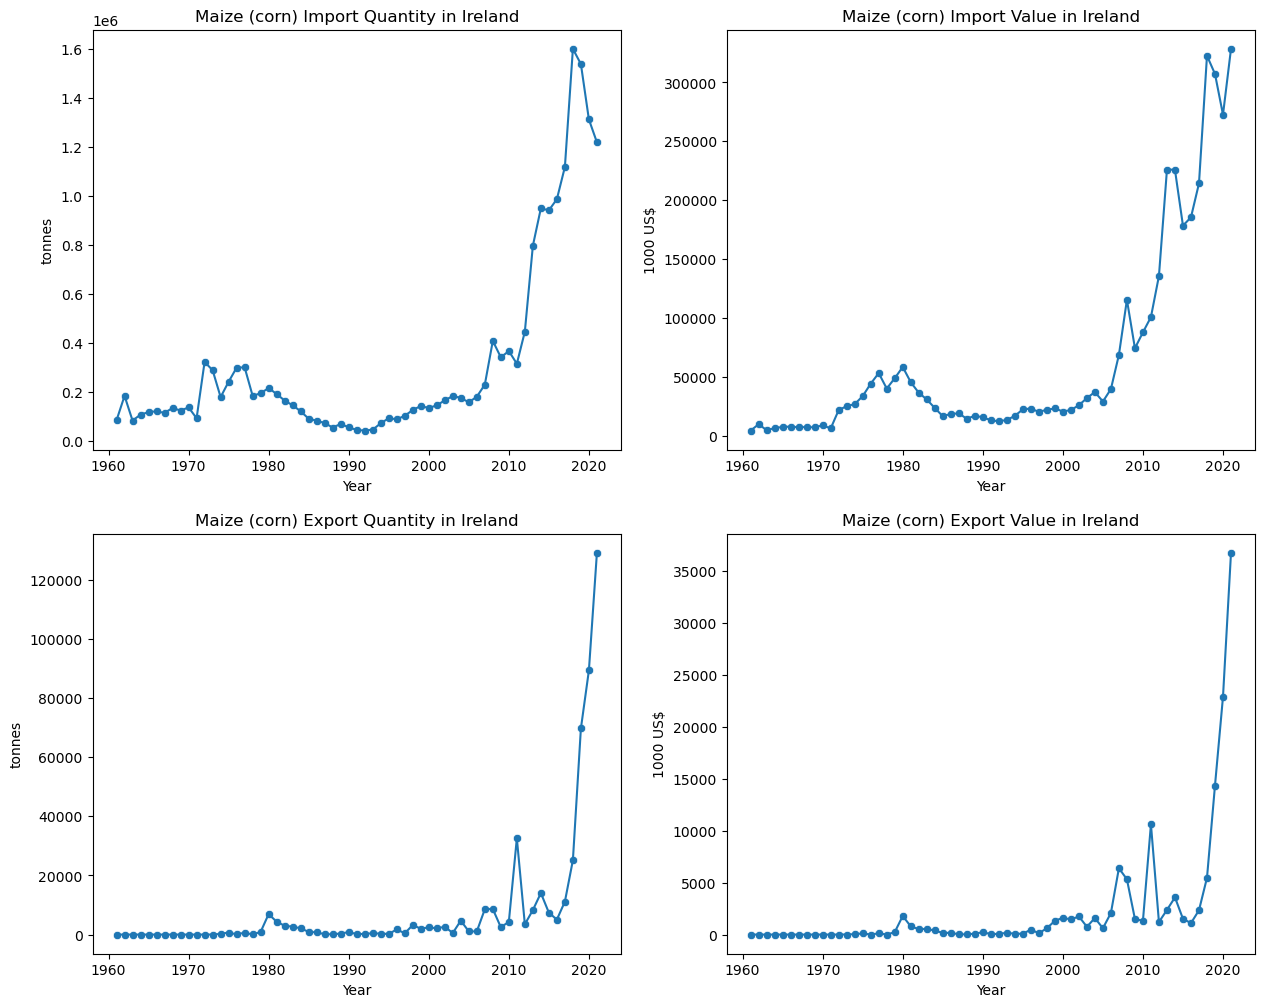

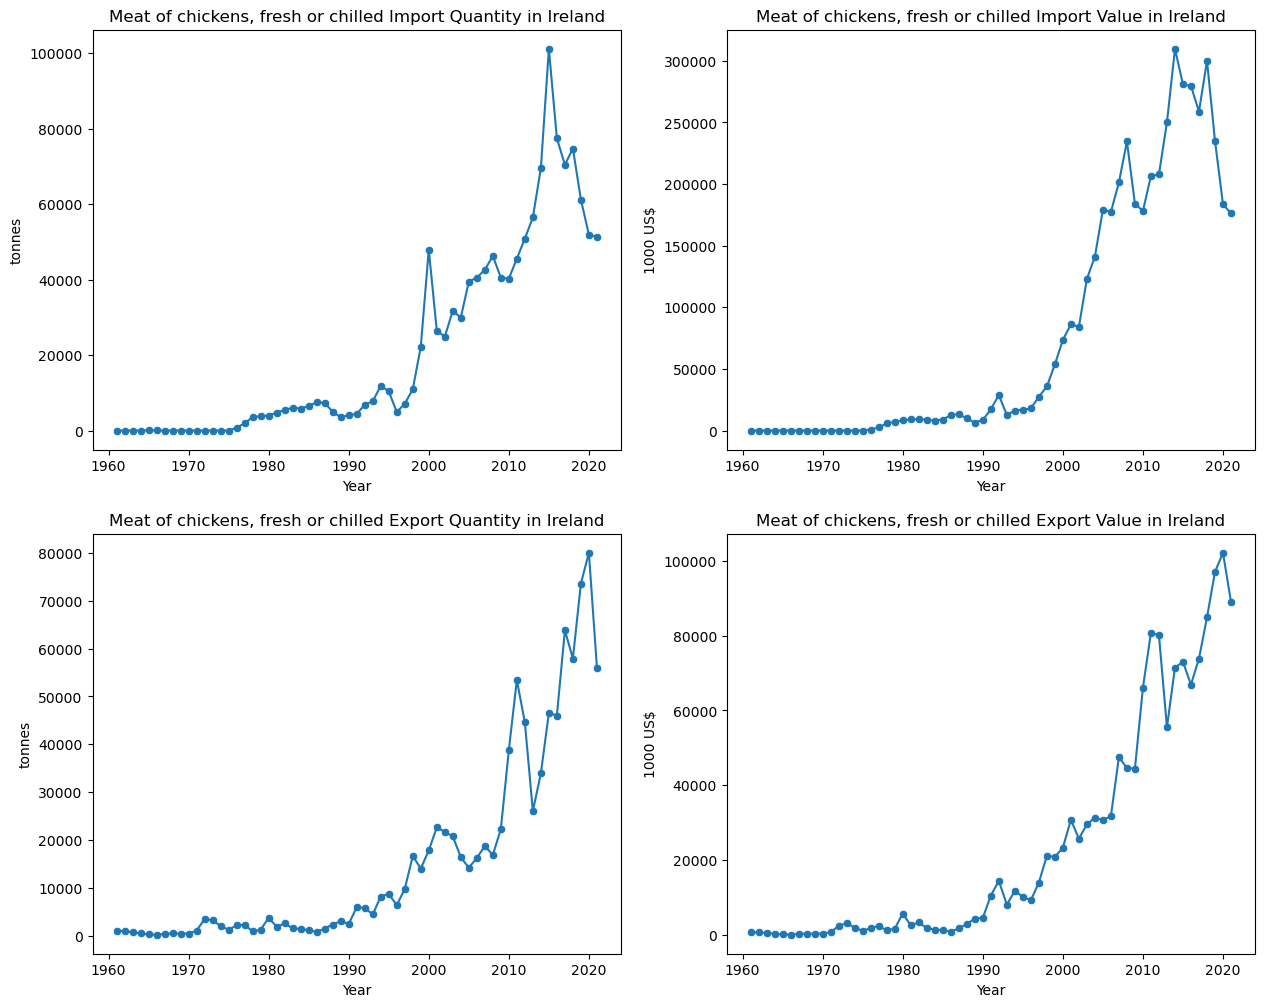

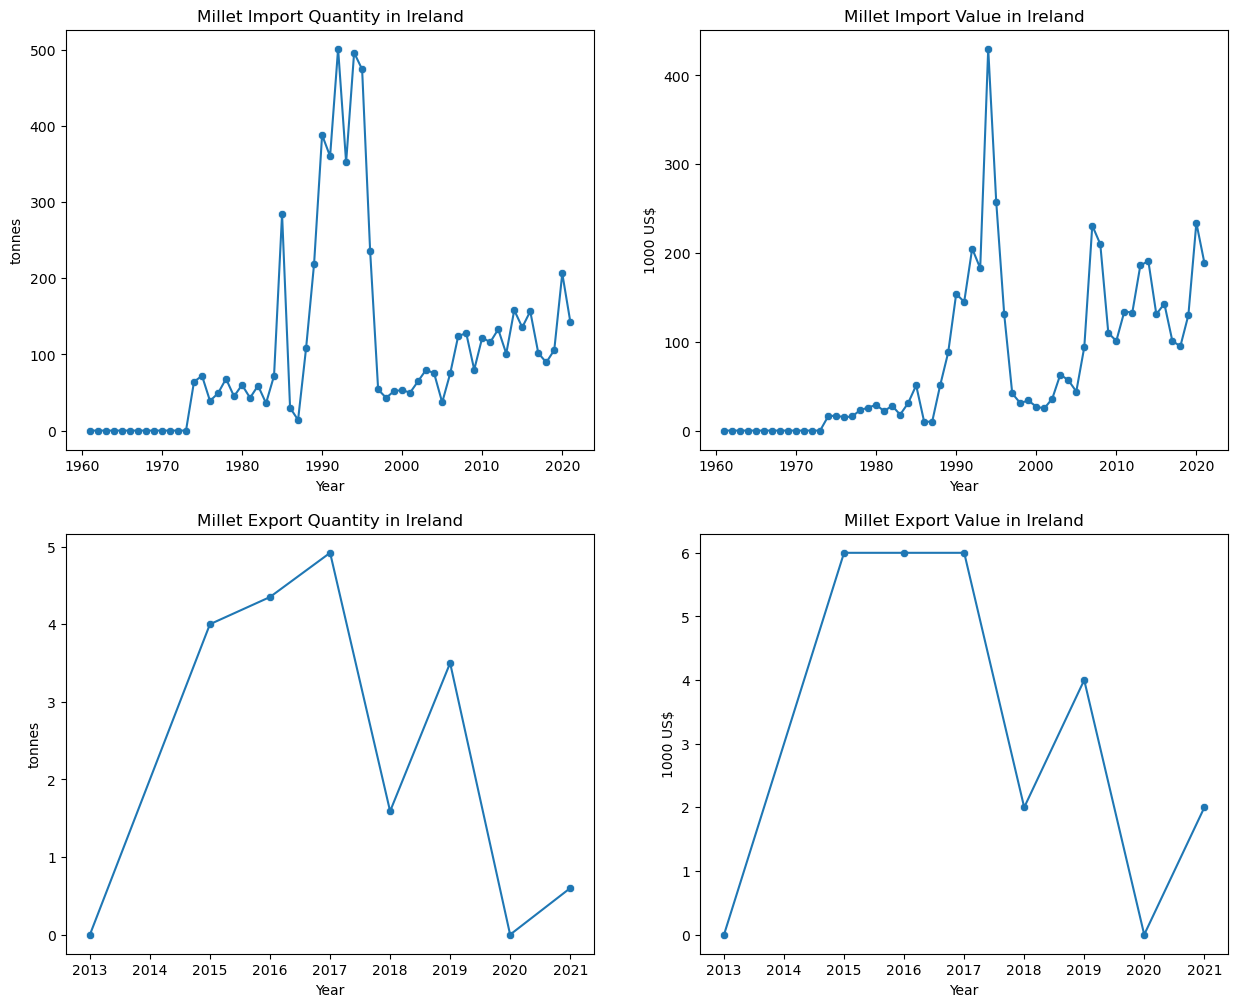

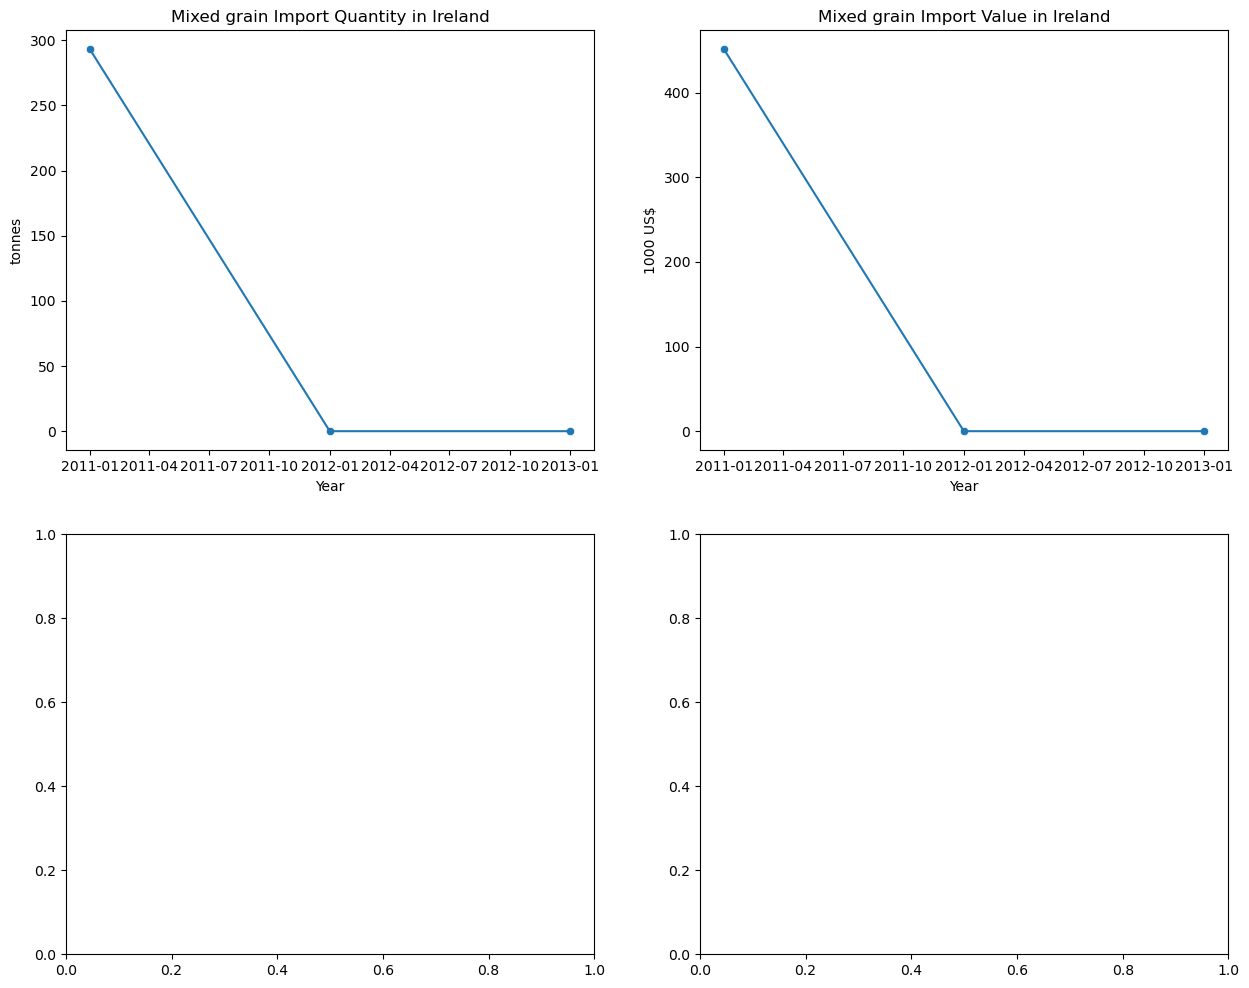

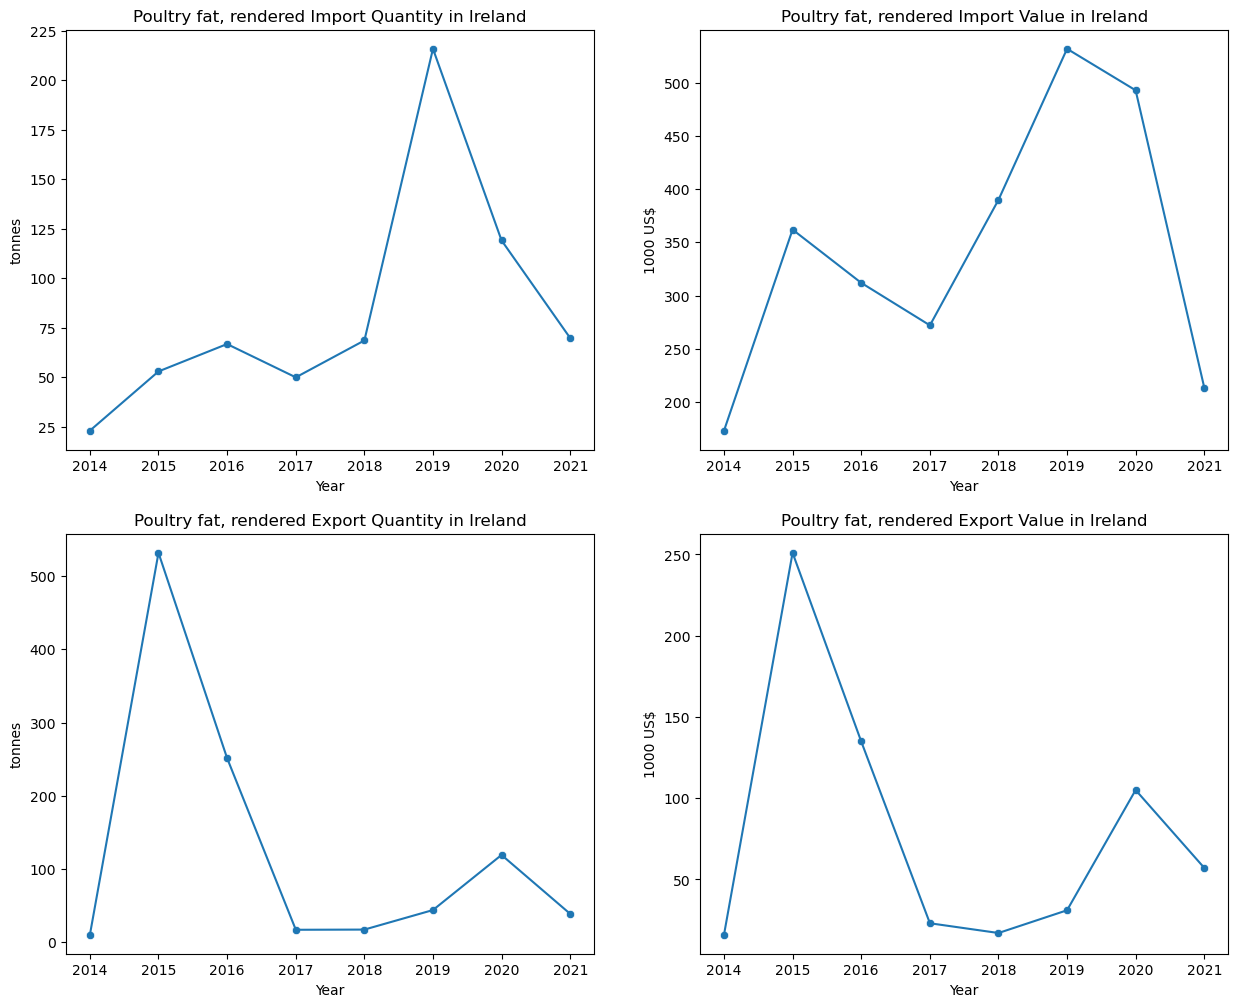

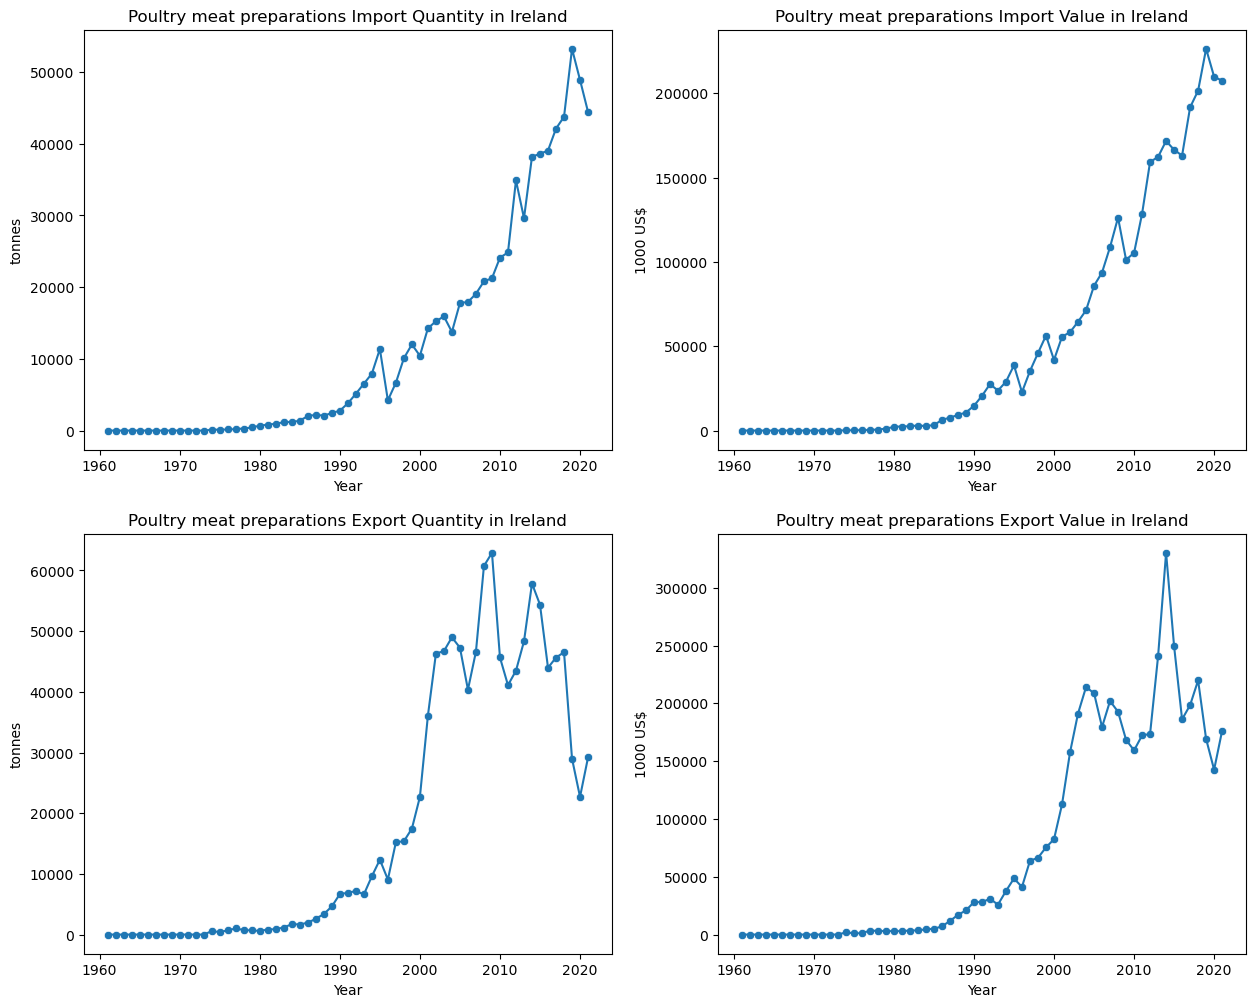

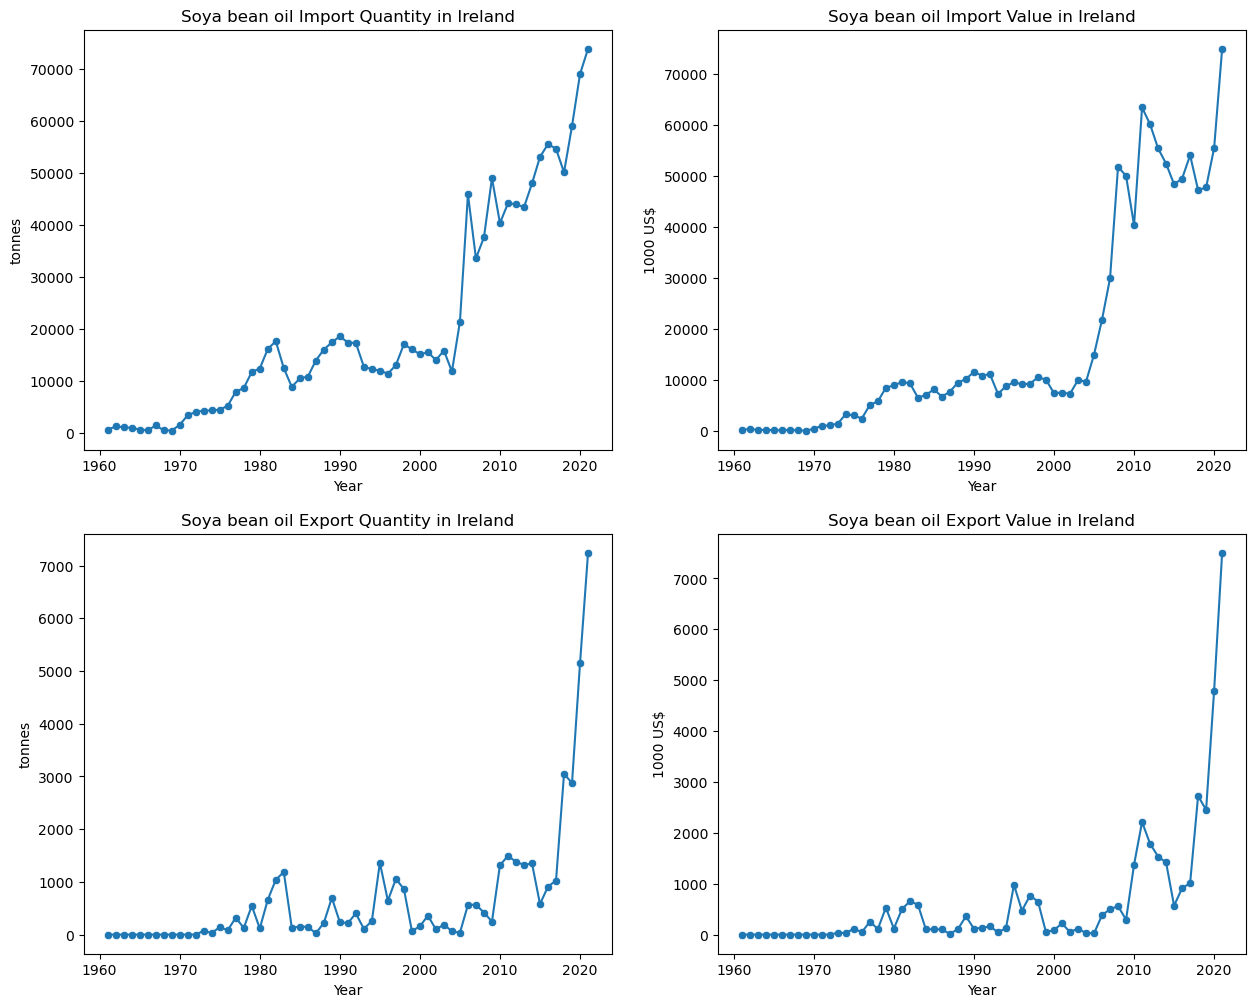

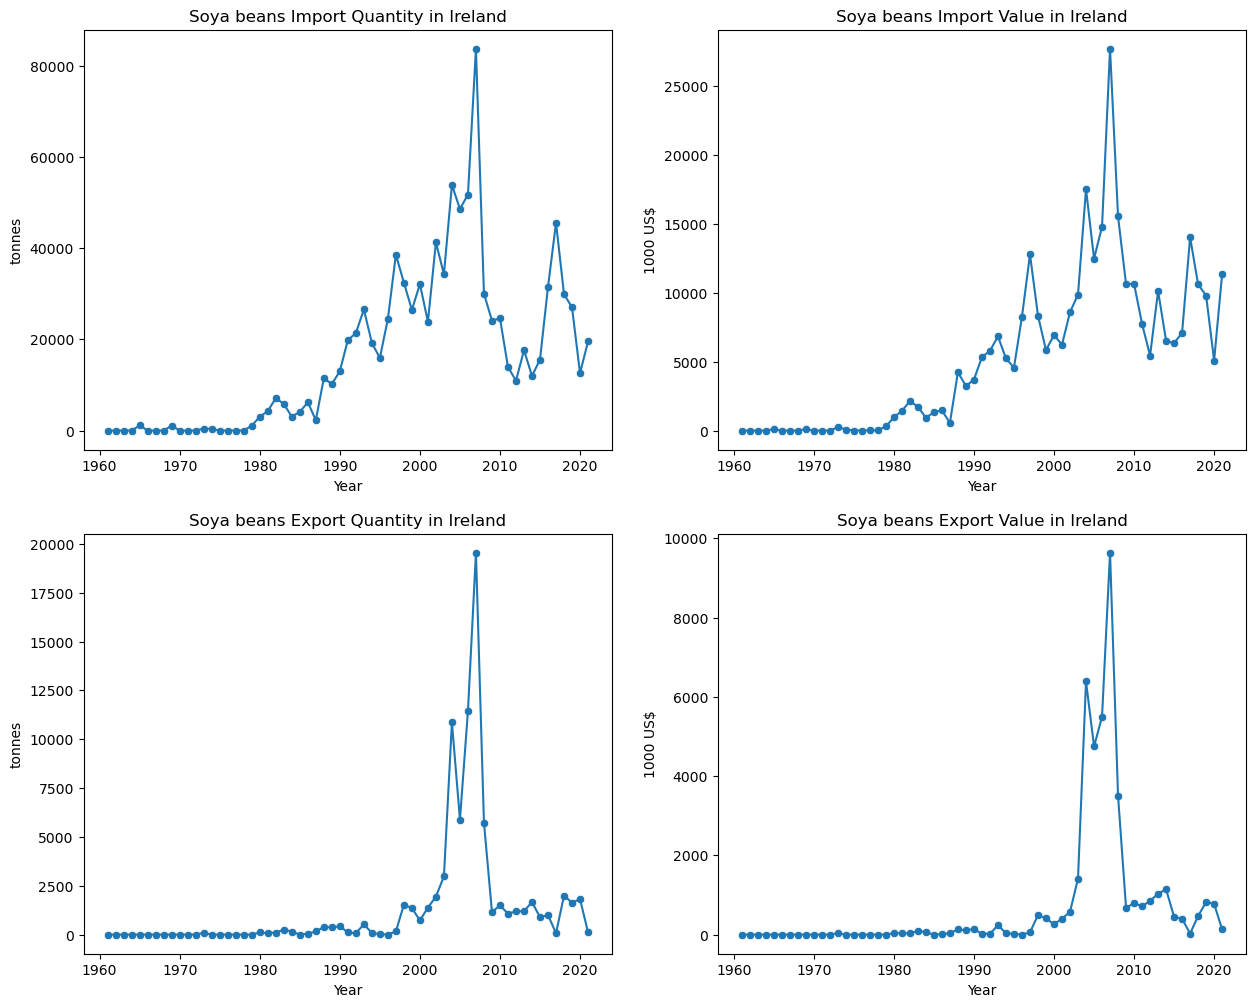

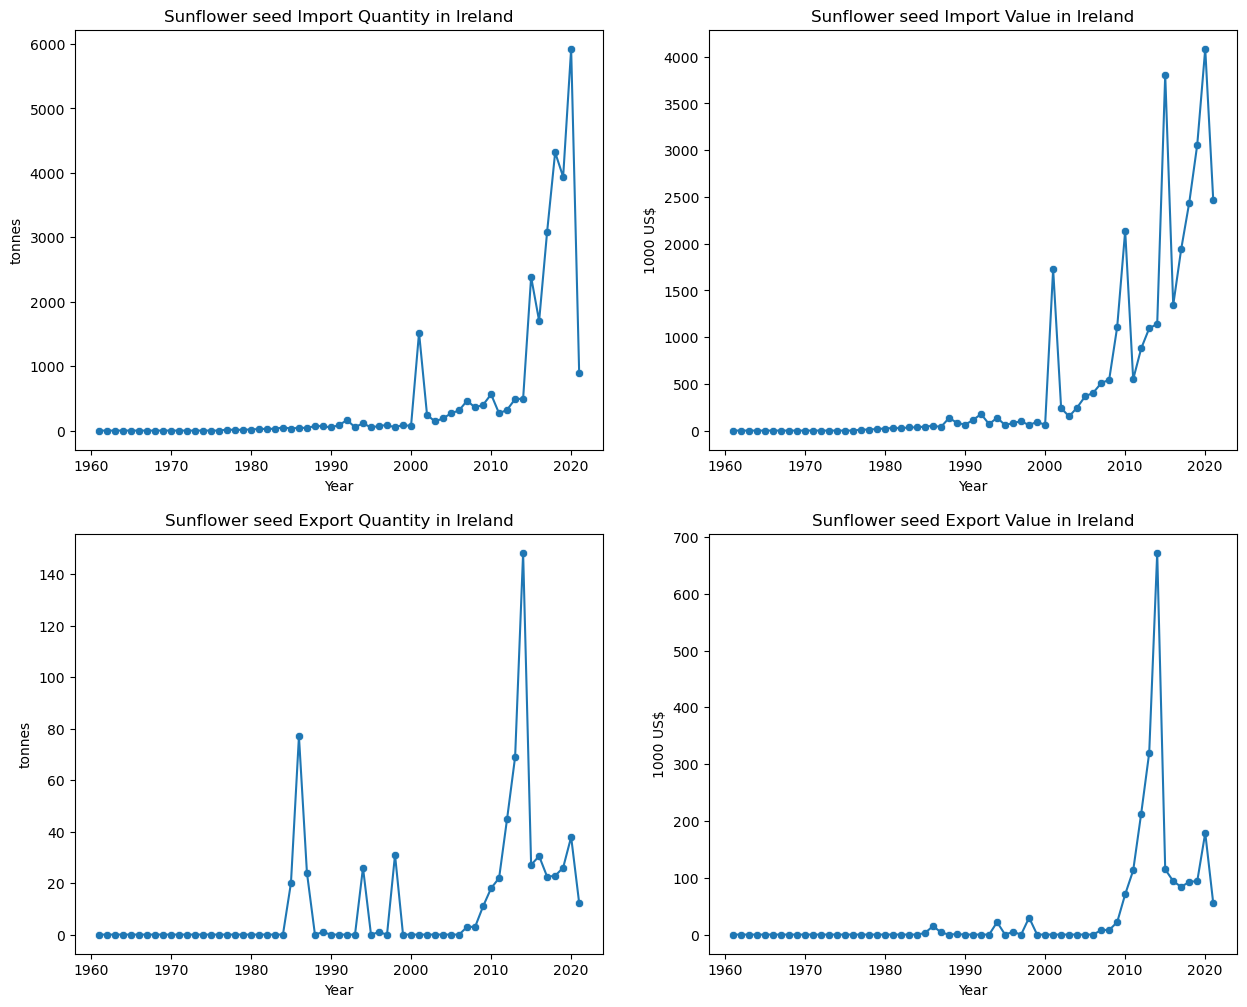

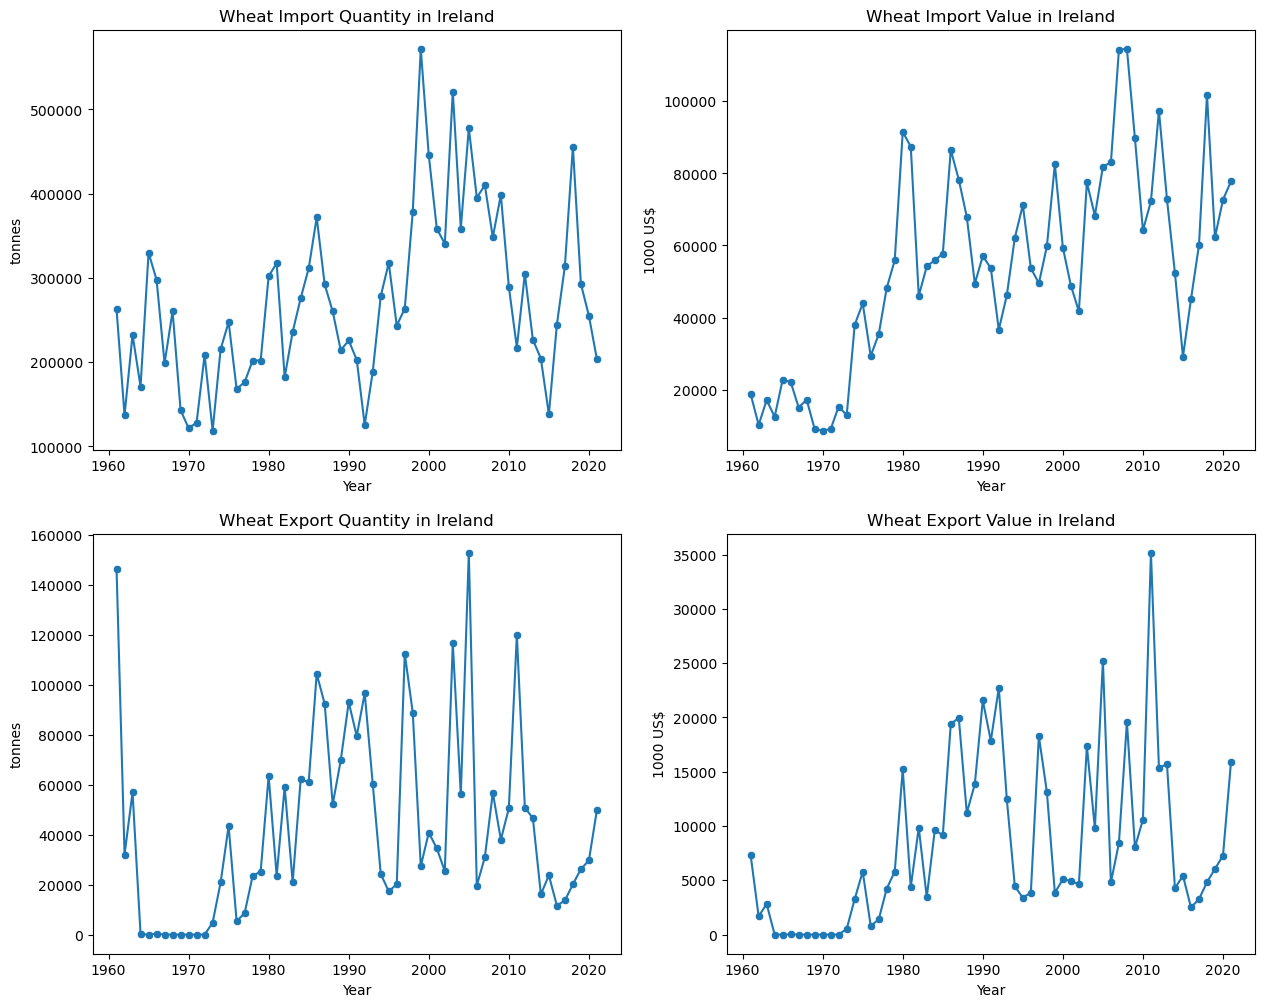

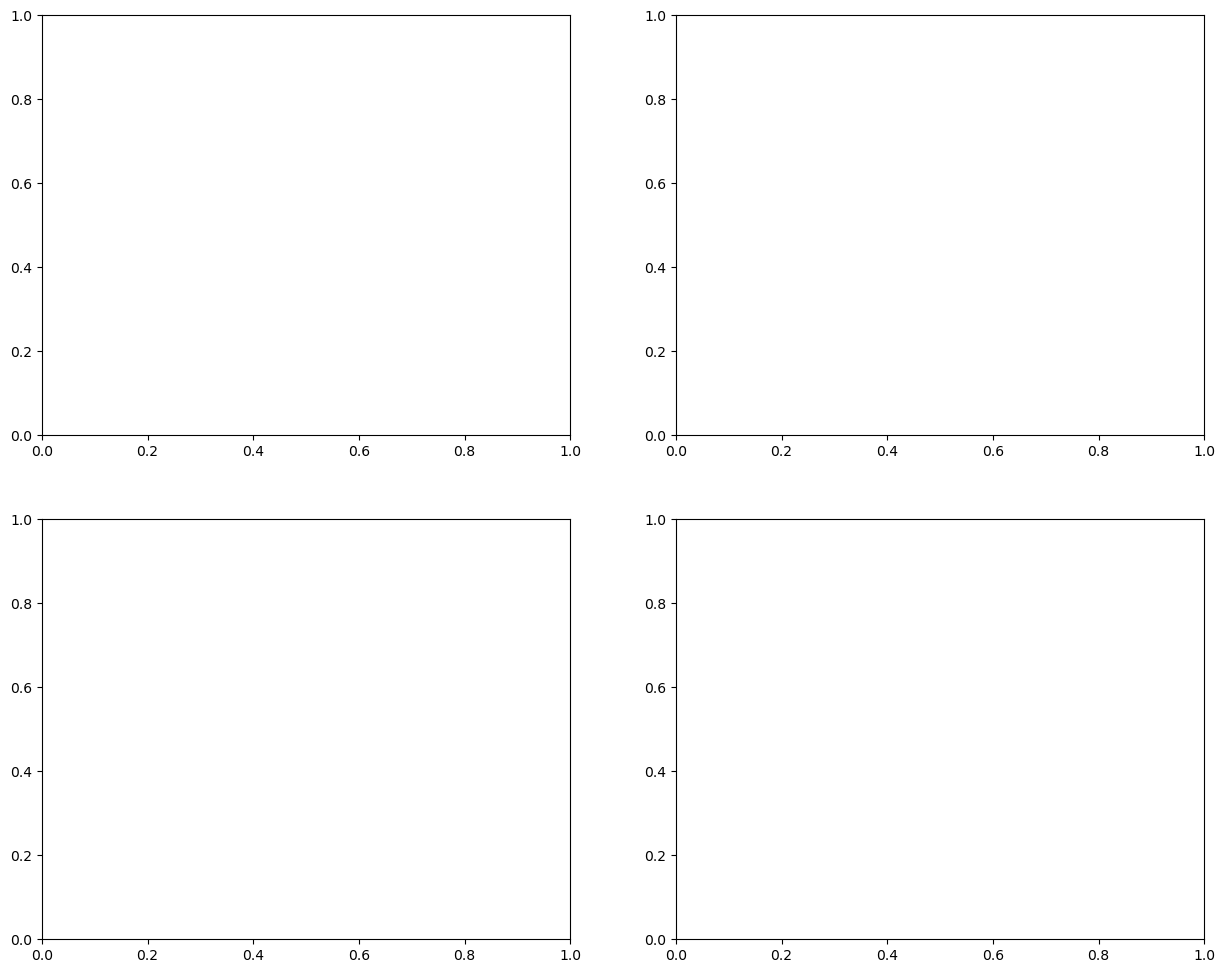

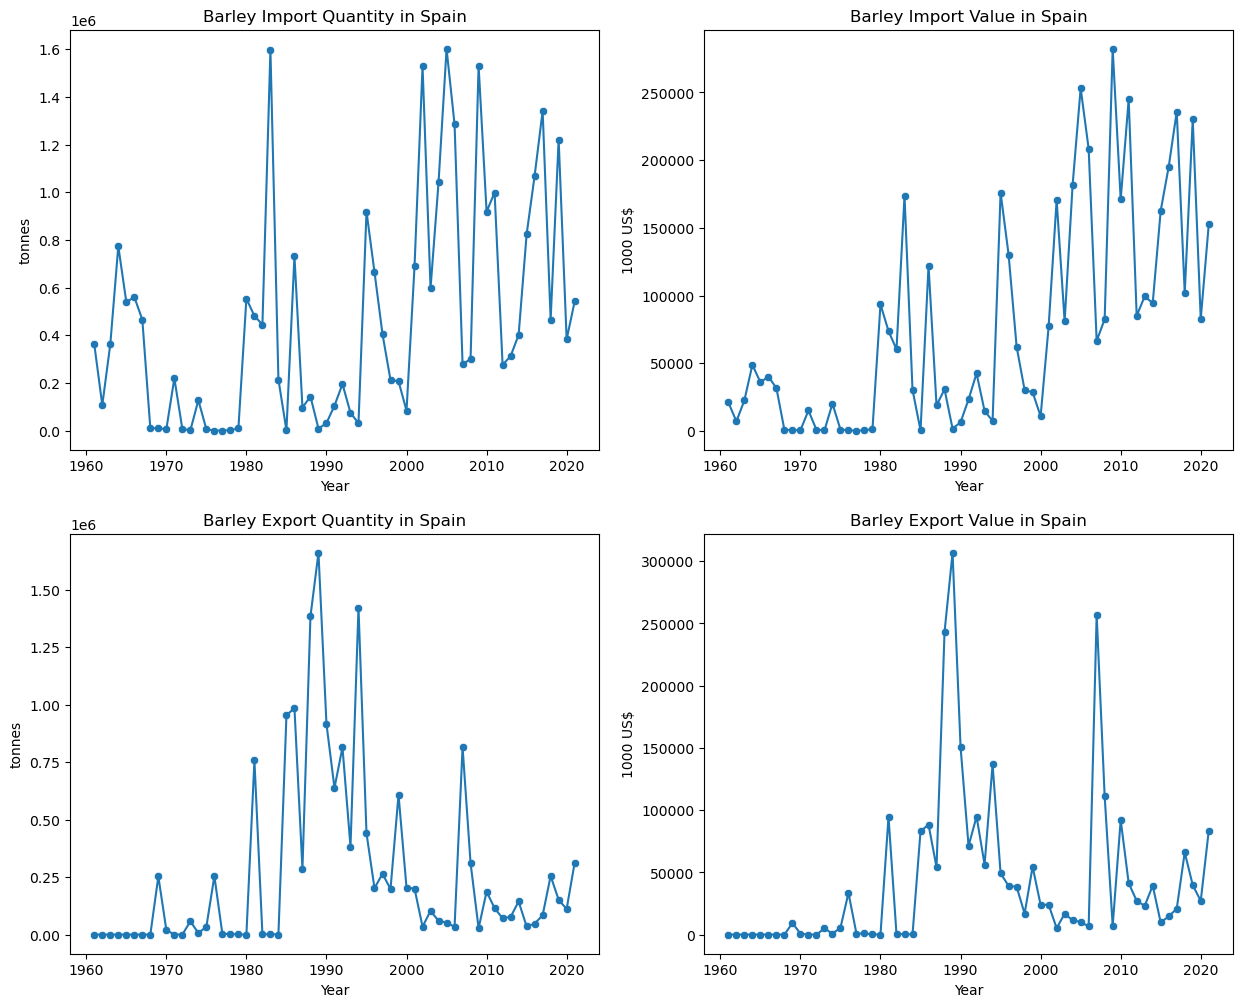

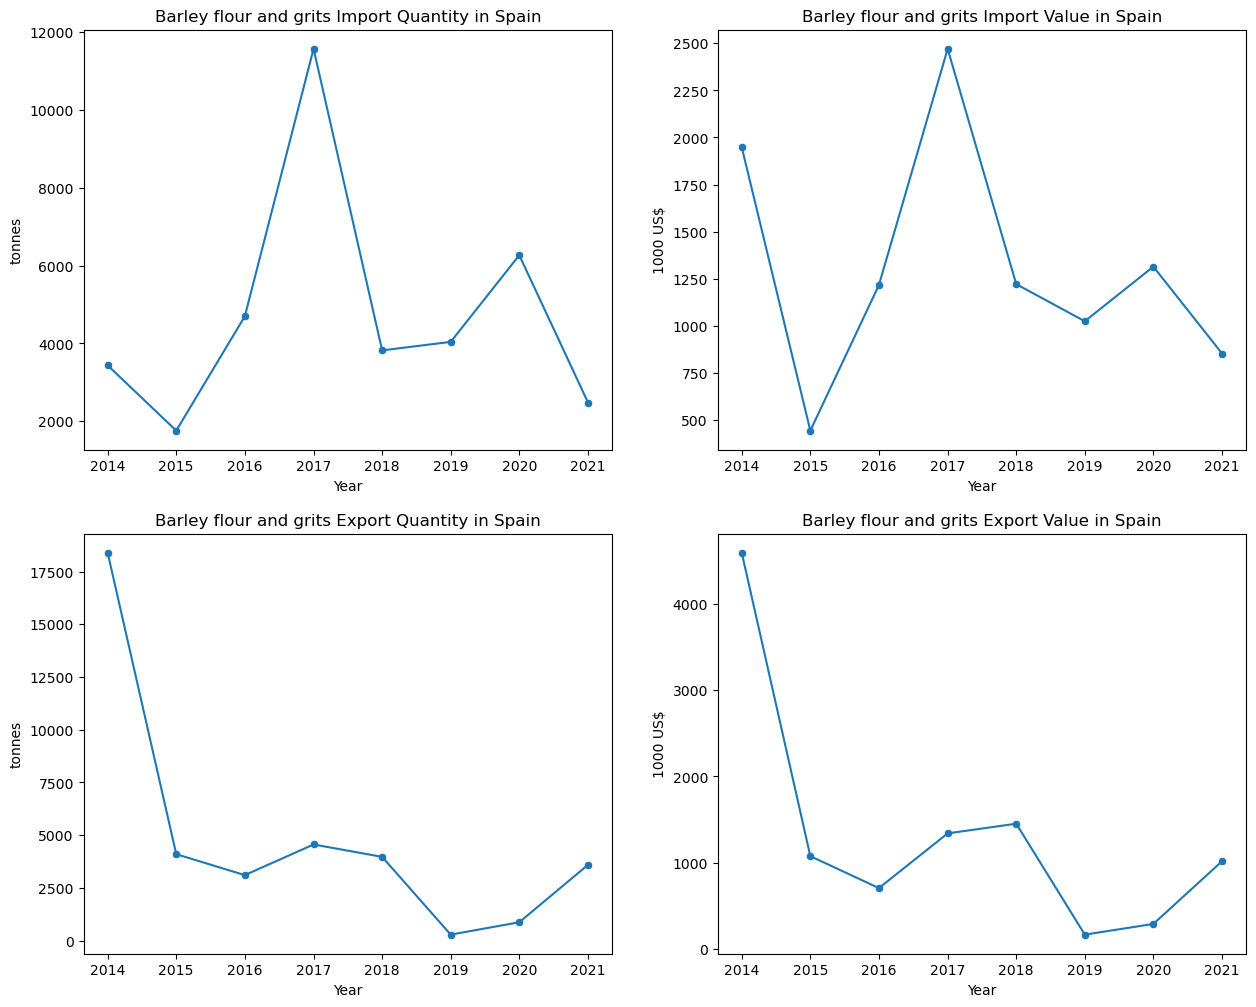

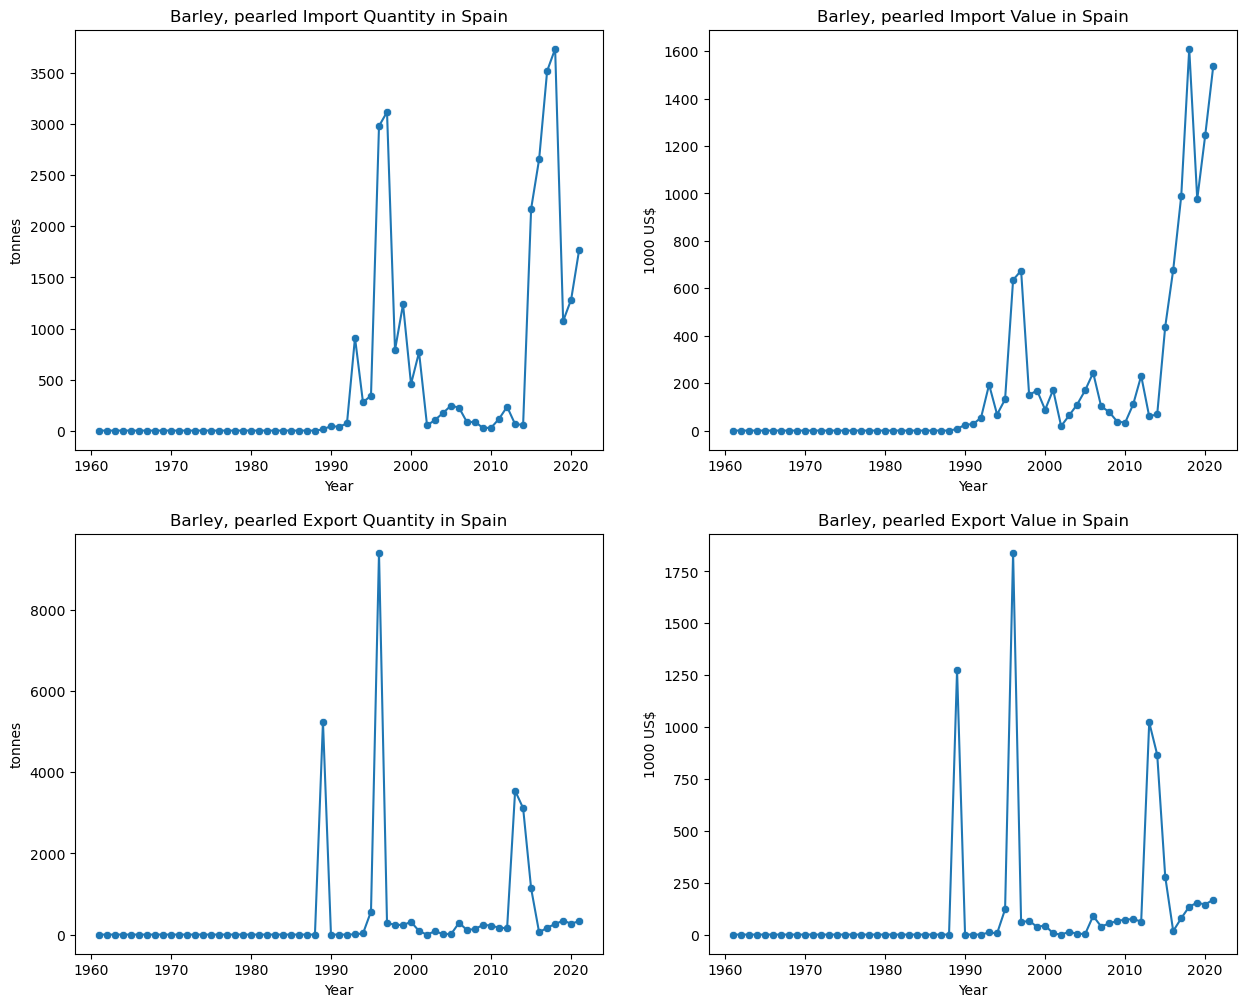

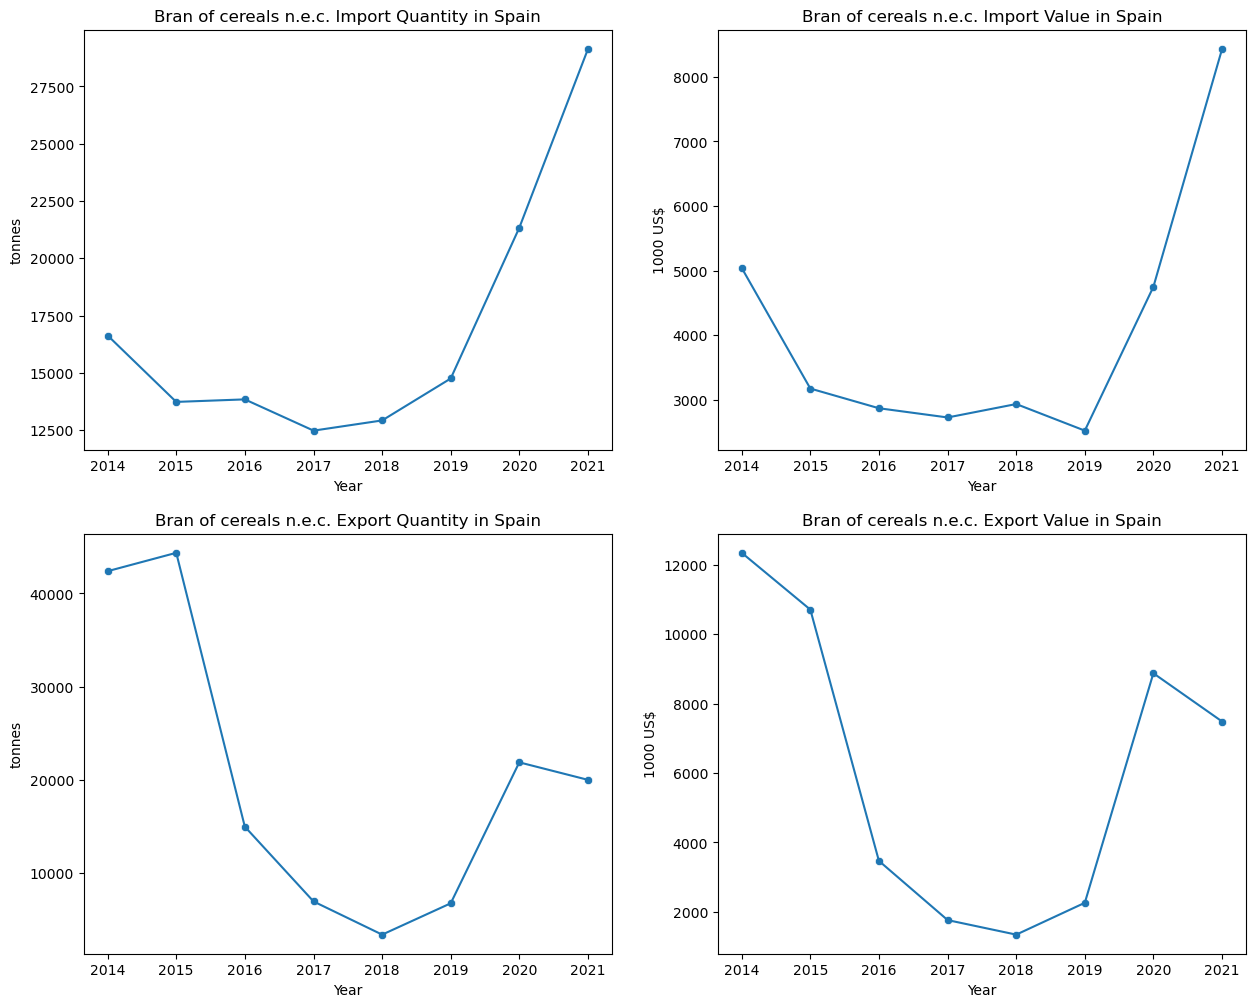

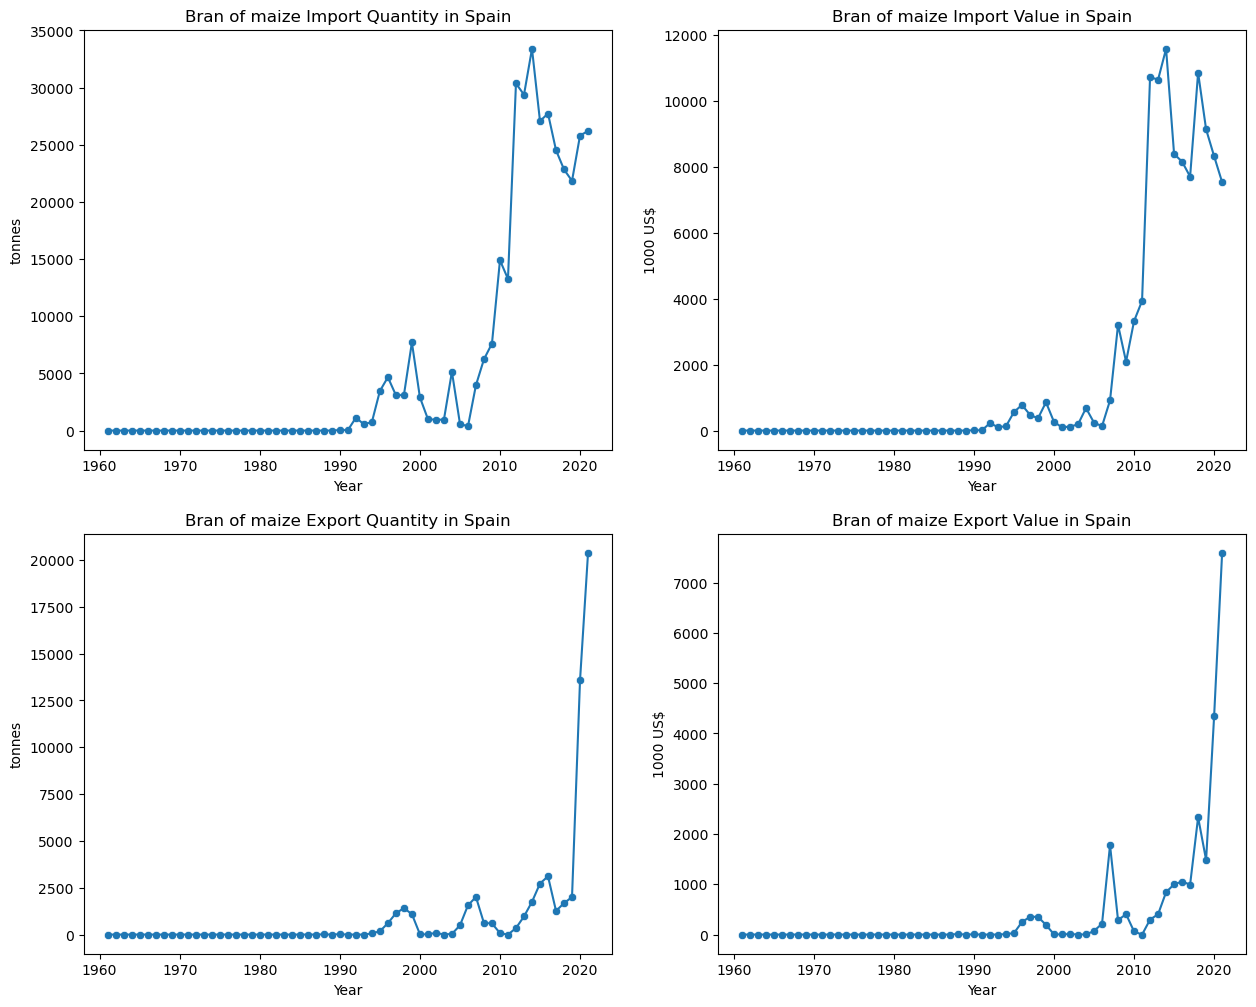

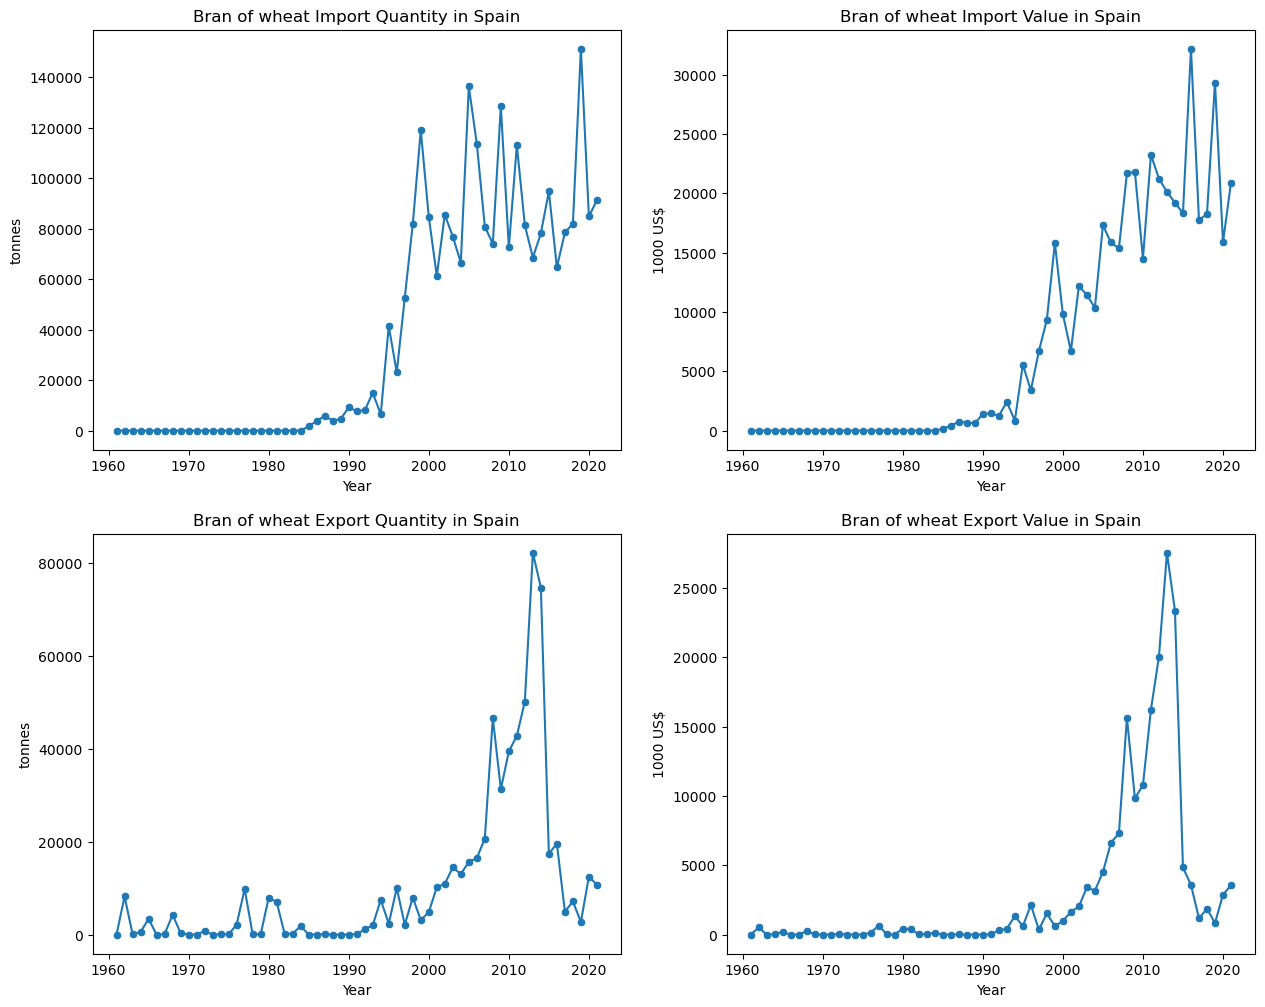

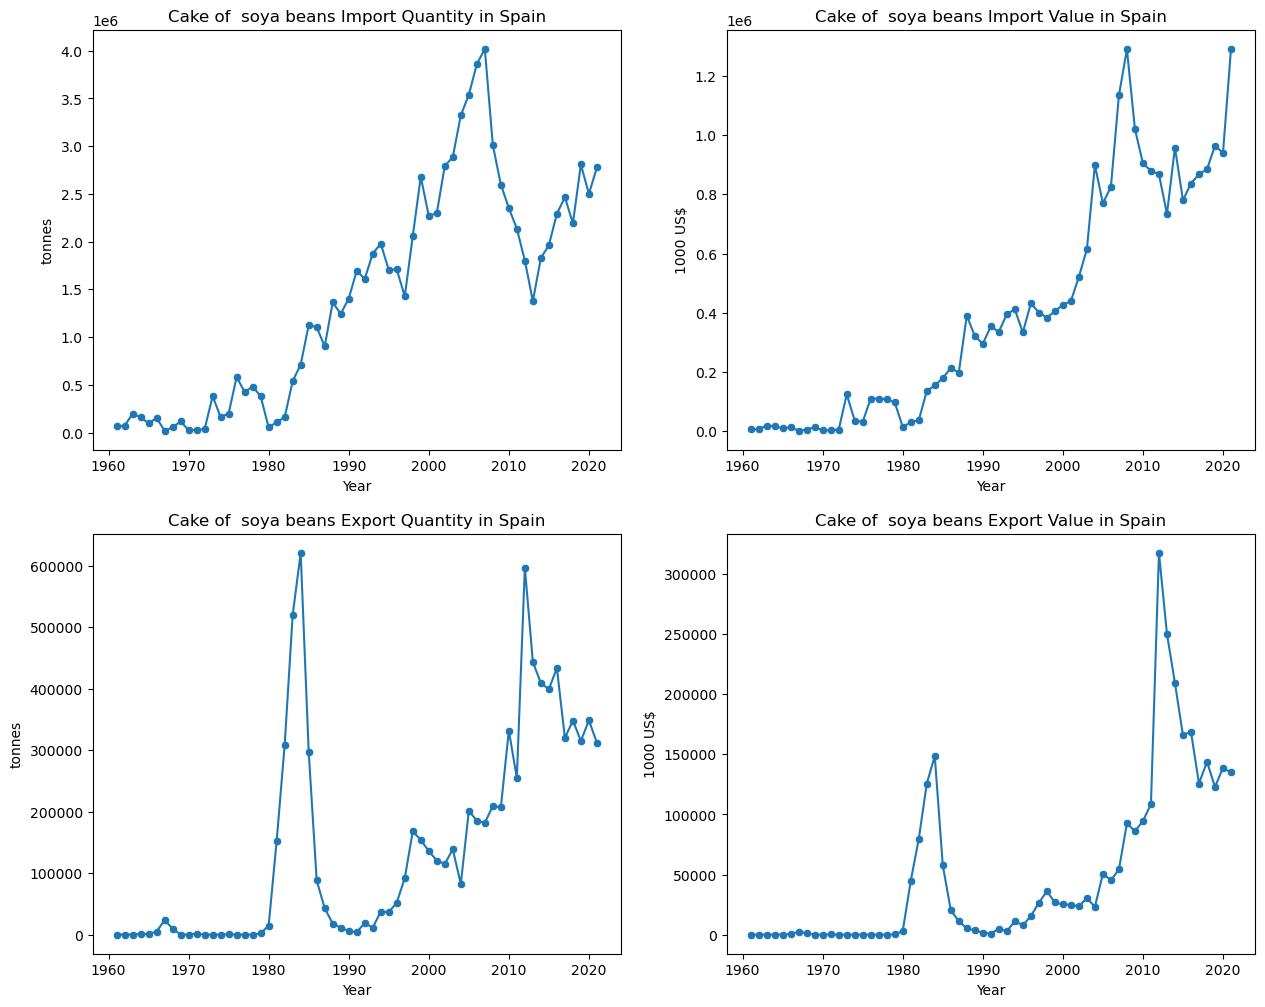

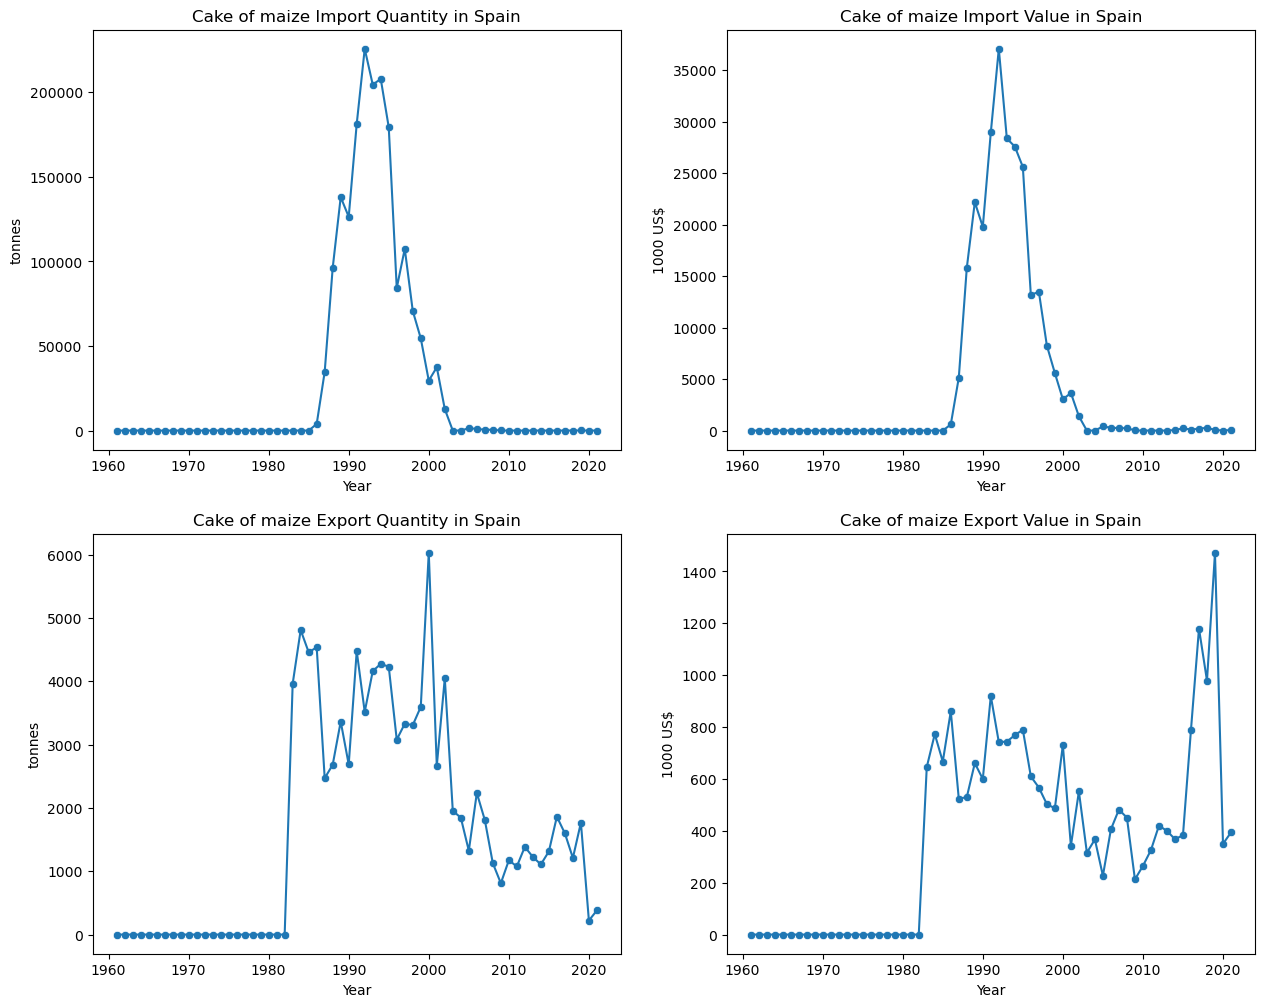

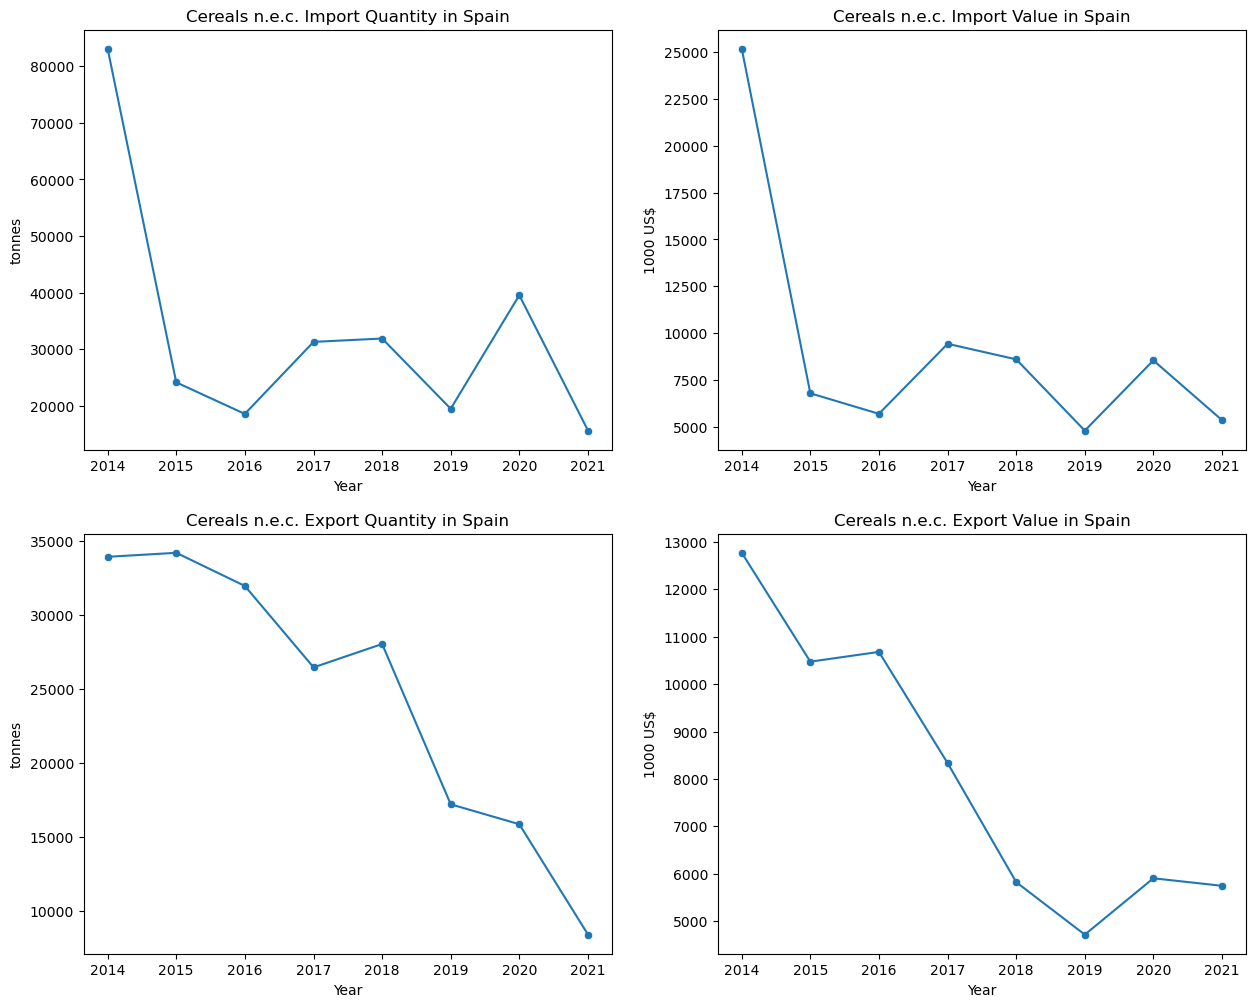

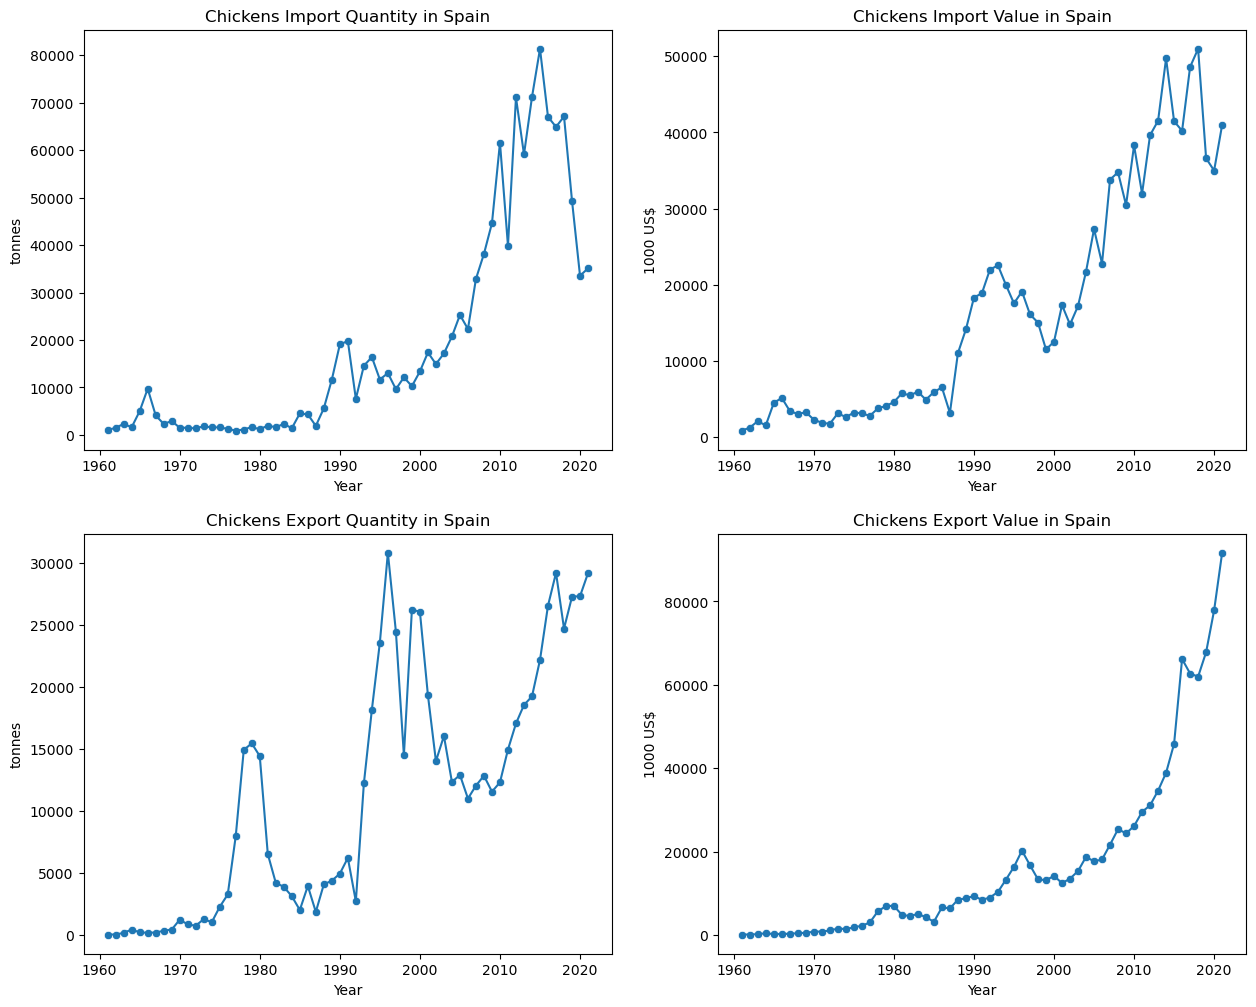

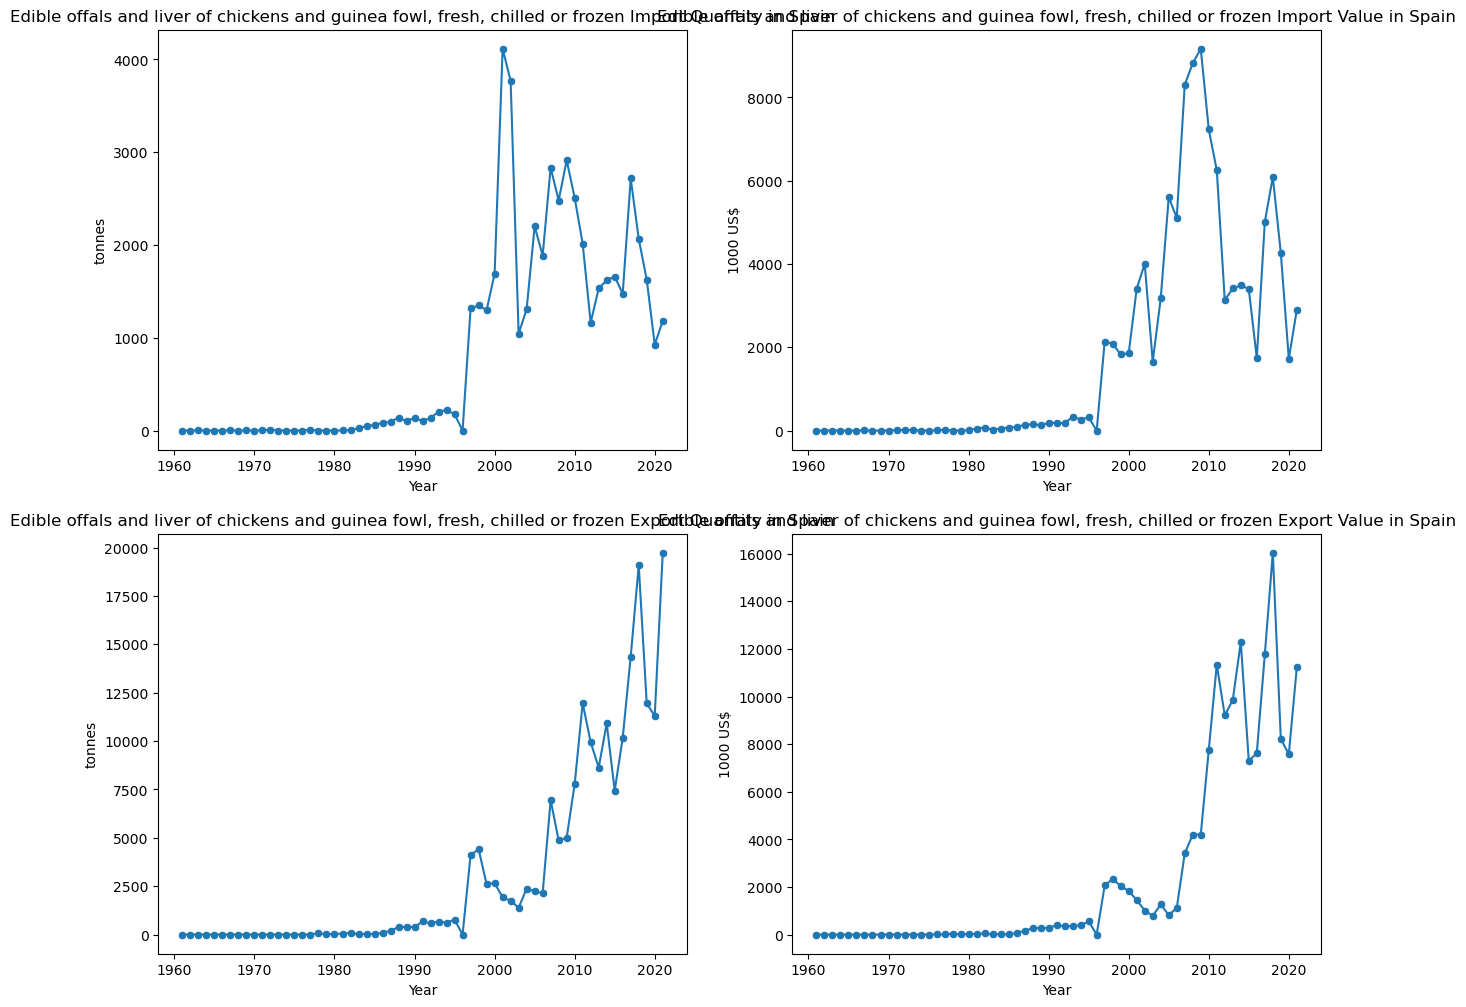

In [ ]:
#repeating for trade products
for country in df_TCL['Area'].unique():
    for item in df_TCL['Item'].unique():
        fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
        for element, ax in zip(df_TCL['Element'].unique(), axs.ravel()):
        #for element in df_TCL['Element'].unique():
                    
            df = df_TCL[df_TCL['Area'] == country]
            df = df[df['Element'] == element]
            
            if item in df['Item'].values:

                sns.lineplot(data=df[df['Item']==item], x='Year', y='Value', ax=ax)
                sns.scatterplot(data=df[df['Item']==item], x='Year', y='Value', ax=ax)
                 
                ax.set_xlabel('Year')
                ax.set_ylabel(df['Unit'].unique()[0])
                ax.set_title(item + ' ' + element + ' in ' + country)
        if item in df['Item'].values:
            #plt.savefig('graphs/'+item+'_trade_'+country+'.png',dpi=300, bbox_inches = "tight")
            plt.show()

Thoughts for ML - pivot rows into columns that are like 'barley area harvested' 'barley yield' etc. and chicken production chicken count. And just have the rows as years. So the dataset might be like 50 rows long and 100 columns wide or something which might make for bad ML, not enought data for variables. But maybe random forest will save me?

# Statistics
I don't know what I'm doing but I'll work it out

In [ ]:
#hello again. Making sure I haven't lost my variables
chicken_item = []
grains_item = []
for item in df_QCL['Item'].unique():
    if 'hicken' in item:
        chicken_item.append(item)
    else:
        grains_item.append(item)

In [ ]:
#and reminding myself what they say
print('Chicken list: ', chicken_item)
print('Grains list: ', grains_item)

In [ ]:
df_QCL[df_QCL['Item'].isin(chicken_item)]['Element'].unique()

In [ ]:
#graphs for just chicken data, Ireland and Spain
#Really should have made a function for this but I hadn't expected to be reusing this code so much

for country in df_QCL['Area'].unique(): #ireland and spain
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
    for element, ax in zip(df_QCL[df_QCL['Item'].isin(chicken_item)]['Element'].unique(), axs.ravel()): 
        for item in chicken_item: #chicken, etc.
            
            df = df_QCL[df_QCL['Area'] == country]
            df = df[df['Element'] == element]
            
            if item in df['Item'].values:

                sns.lineplot(data=df[df['Item']==item], x='Year', y='Value', ax=ax)
                sns.scatterplot(data=df[df['Item']==item], x='Year', y='Value', ax=ax)
                
                ax.set_xlabel('Year')
                ax.set_ylabel(df['Unit'].unique()[0])
                ax.set_title(item + ' ' + element + ' in ' + country)
                
    #plt.savefig('graphs/chicken_production_'+country+'.png', dpi=300, bbox_inches = "tight")
    plt.show()

Grab that population dataset so we can do some per capita calculations

In [ ]:
df_pop = df_dict['FAOSTAT_data_en_IRL_SPA_annual_population']

In [ ]:
df_pop

In [ ]:
for country in df_pop['Area'].unique(): #ireland and spain
    
    df = df_pop[df_pop['Area'] == country]
    
    sns.lineplot(data=df, x='Year', y='Value', hue='Element')
    #sns.scatterplot(data=df, x='Year', y='Value', hue='Element')

    plt.xlabel('Year')
    plt.ylabel(df['Unit'].unique()[0])
    plt.title('Annual population in ' + country)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    #plt.savefig('graphs/annual_population_'+country+'.png', dpi=300, bbox_inches = "tight")
    plt.show()

Back to thinking about the crop and livestock products

In [ ]:
print(df_QCL['Element'].unique(), df_QCL['Item'].unique())

In [ ]:
df_Qirl = df_QCL[df_QCL['Area'] == 'Ireland']
df_Qirl

In [ ]:
df_Qirl['Item'].unique()

In [ ]:
unwanted = ['Mixed grain', 'Cereals n.e.c.','Maize (corn)','Soya beans', 'Sunflower seed']

In [ ]:
df_Qirl = df_Qirl[~df_Qirl['Item'].isin(unwanted)]

In [ ]:
wanted = df_Qirl['Item'].unique()
wanted # for consistency in the spanish dataset. Or maybe it doesn't matter? 

In [ ]:
df_Qirl['Item Element'] = df_Qirl['Item'] +' ' + df_Qirl['Element'] + ' ' + df_Qirl['Unit'] #I don't know why this is wrong? Is there more approriate way to concat strings across columns?

In [ ]:
df_Qirl_pivot = df_Qirl.pivot(index='Year', columns='Item Element')['Value']

In [ ]:
df_Qirl_pivot #very cool

I was so lost as to why the chicken stocks value were so much lower than Meat of chickens, fresh or chilled Producing Animals/Slaughtered when they were both in units of 1000 head but I looked into it.

*There could be a variety of reasons why the number of chicken stocks (i.e. the number of chickens being raised) in a country might be lower than the number of animals slaughtered for meat production. Here are a few possible explanations:*

1.    Some of the chickens being slaughtered may have been imported from other countries. If a country is importing more chickens than it is raising domestically, the number of chicken stocks may be lower than the number of animals slaughtered.

2.    Chickens have a relatively short lifespan compared to other livestock animals such as cattle or pigs. This means that a higher percentage of the chicken population may be slaughtered for meat each year, resulting in a lower overall chicken stock.

3.    Chickens may be raised in intensive, high-density poultry operations, which can result in a larger number of animals being slaughtered relative to the number of chickens being raised at any given time.

4.    Some chickens may be raised specifically for egg production rather than meat, and may not be included in the statistics on animals slaughtered for meat.

*It's also worth noting that the relationship between animal stocks and slaughter rates can vary depending on the specific country and the type of animal being considered.*

So, my understanding is that chicken stocks is giving the average number of chickens alive at any one time during the year in question. However, chickens producing animals/slaughter 1000 head is giving the number of chickens slaughter in a given year, total. As broiler chickens are generally slaughtered between 4 and 16 weeks (https://en.wikipedia.org/wiki/Broiler, need a better citation) that is a huge amount of turnover. Teagasc claims that in Ireland, 70 million broilers are slaughtered a year, 4 million turkeys, and that the egg laying stocks stay around 2 million (https://www.teagasc.ie/rural-economy/rural-development/poultry/). Let's double check their claims, but it gives a ballpark understanding of the landscape of poultry farming in Ireland. The FAO data does not differentiate between egg laying stock and meat stock in their chicken stocks values, and given that we don't know the rate of turnover of chickens slaughtered, we can't calculate the egg laying stock using the meat producing animals slaughtered value. So I'm probably just going to focus on animals slaughtered annually.

In [ ]:
df_pop[df_pop['Area']=='Ireland']

In [ ]:
df_pop_irl_pivot = df_pop[df_pop['Area']=='Ireland'].pivot(index='Year', columns='Element', values='Value')

In [ ]:
df_pop_irl_pivot

In [ ]:
df_irl_merged = pd.merge(df_pop_irl_pivot, df_Qirl_pivot, on='Year') #so I can do those per capita calculations

In [ ]:
df_irl_merged

In [ ]:
#chickens (animal numbers) killed per person in Ireland
df_irl_merged['Meat of chicken Producing Animals/Slaughtered per capita head/person'] = df_irl_merged['Meat of chickens, fresh or chilled Producing Animals/Slaughtered 1000 Head'] / df_irl_merged['Total Population - Both sexes']

In [ ]:
#chicken kg per person in Ireland
df_irl_merged['Meat of chickens, fresh or chilled Production per capita kg/person'] = df_irl_merged['Meat of chickens, fresh or chilled Production tonnes'] / df_irl_merged['Total Population - Both sexes']

In [ ]:
df_irl_merged

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 20))
ax1, ax2, ax3 = axs.ravel()

sns.lineplot(data=df_irl_merged, x='Year', y='Meat of chicken Producing Animals/Slaughtered per capita head/person', ax=ax1)
sns.scatterplot(data=df_irl_merged, x='Year', y='Meat of chicken Producing Animals/Slaughtered per capita head/person', ax=ax1)
ax1.set_title('Meat of chicken Producing Animals/Slaughtered per capita - Ireland')
ax1.set_xlabel('Year')
ax1.set_ylabel('head/person')
#plt.show()

sns.lineplot(data=df_irl_merged, x='Year', y='Meat of chickens, fresh or chilled Producing Animals/Slaughtered 1000 Head', ax=ax2)
sns.scatterplot(data=df_irl_merged, x='Year', y='Meat of chickens, fresh or chilled Producing Animals/Slaughtered 1000 Head', ax=ax2)
ax2.set_title('Meat of chickens, fresh or chilled Producing Animals/Slaughtered - Ireland')
ax2.set_xlabel('Year')
ax2.set_ylabel('1000 head')
#plt.show()

sns.lineplot(data=df_irl_merged, x='Year', y='Total Population - Both sexes', ax=ax3)
sns.scatterplot(data=df_irl_merged, x='Year', y='Total Population - Both sexes', ax=ax3)
ax3.set_title('Total Population - Both sexes - Ireland')
ax3.set_xlabel('Year')
ax3.set_ylabel('1000 persons')

#plt.savefig('graphs/chicken_per_capita_ireland.png', dpi=300, bbox_inches = "tight")
plt.show()

Now to copy everything I did above. What a waste.
### Spain

In [ ]:
df_Qspa = df_QCL[df_QCL['Area'] == 'Spain']
df_Qspa

In [ ]:
df_Qspa['Item'].unique()

In [ ]:
df_Qspa = df_Qspa[df_Qspa['Item'].isin(wanted)]

In [ ]:
df_Qspa['Item Element'] = df_Qspa['Item'] +' ' + df_Qspa['Element'] + ' ' + df_Qspa['Unit']

In [ ]:
df_Qspa #those few cells should have been done on the common df_QCL and then I should have split it by country before the pivot

In [ ]:
df_Qspa_pivot = df_Qspa.pivot(index='Year', columns='Item Element')['Value']

In [ ]:
df_Qspa_pivot

In [ ]:
df_pop_spa_pivot = df_pop[df_pop['Area']=='Spain'].pivot(index='Year', columns='Element', values='Value')

In [ ]:
df_pop_spa_pivot

In [ ]:
df_spa_merged = pd.merge(df_pop_spa_pivot, df_Qspa_pivot, on='Year')

In [ ]:
df_spa_merged

In [ ]:
df_spa_merged['Meat of chicken Producing Animals/Slaughtered per capita head/person'] = df_spa_merged['Meat of chickens, fresh or chilled Producing Animals/Slaughtered 1000 Head'] / df_spa_merged['Total Population - Both sexes']

In [ ]:
#chicken kg per person in Spain
df_spa_merged['Meat of chickens, fresh or chilled Production per capita kg/person'] = df_spa_merged['Meat of chickens, fresh or chilled Production tonnes'] / df_spa_merged['Total Population - Both sexes']

In [ ]:
df_spa_merged

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 20))
ax1, ax2, ax3 = axs.ravel()

sns.lineplot(data=df_spa_merged, x='Year', y='Meat of chicken Producing Animals/Slaughtered per capita head/person', ax=ax1)
sns.scatterplot(data=df_spa_merged, x='Year', y='Meat of chicken Producing Animals/Slaughtered per capita head/person', ax=ax1)
ax1.set_title('Meat of chicken Producing Animals/Slaughtered per capita - Spain')
ax1.set_xlabel('Year')
ax1.set_ylabel('head/person')
#plt.show()

sns.lineplot(data=df_spa_merged, x='Year', y='Meat of chickens, fresh or chilled Producing Animals/Slaughtered 1000 Head', ax=ax2)
sns.scatterplot(data=df_spa_merged, x='Year', y='Meat of chickens, fresh or chilled Producing Animals/Slaughtered 1000 Head', ax=ax2)
ax2.set_title('Meat of chickens, fresh or chilled Producing Animals/Slaughtered - Spain')
ax2.set_xlabel('Year')
ax2.set_ylabel('1000 head')
#plt.show()

sns.lineplot(data=df_spa_merged, x='Year', y='Total Population - Both sexes', ax=ax3)
sns.scatterplot(data=df_spa_merged, x='Year', y='Total Population - Both sexes', ax=ax3)
ax3.set_title('Total Population - Both sexes - Spain')
ax3.set_xlabel('Year')
ax3.set_ylabel('1000 persons')

#plt.savefig('graphs/chicken_per_capita_spain.png', dpi=300, bbox_inches = "tight")
plt.show()

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(24, 16))
ax1, ax2, ax3, ax4 = axs.ravel()

sns.lineplot(data=df_irl_merged, x='Year', y='Meat of chicken Producing Animals/Slaughtered per capita head/person', ax=ax1)
sns.scatterplot(data=df_irl_merged, x='Year', y='Meat of chicken Producing Animals/Slaughtered per capita head/person', ax=ax1)
ax1.set_title('Meat of chicken Producing Animals/Slaughtered per capita - Ireland')
ax1.set_xlabel('Year')
ax1.set_ylabel('head/person')

sns.lineplot(data=df_spa_merged, x='Year', y='Meat of chicken Producing Animals/Slaughtered per capita head/person', ax=ax2)
sns.scatterplot(data=df_spa_merged, x='Year', y='Meat of chicken Producing Animals/Slaughtered per capita head/person', ax=ax2)
ax2.set_title('Meat of chicken Producing Animals/Slaughtered per capita - Spain')
ax2.set_xlabel('Year')
ax2.set_ylabel('head/person')

sns.lineplot(data=df_irl_merged, x='Year', y='Meat of chickens, fresh or chilled Production per capita kg/person', ax=ax3)
sns.scatterplot(data=df_irl_merged, x='Year', y='Meat of chickens, fresh or chilled Production per capita kg/person', ax=ax3)
ax3.set_title('Meat of chickens, fresh or chilled Production per capita kg/person - Ireland')
ax3.set_xlabel('Year')
ax3.set_ylabel('kg/person')

sns.lineplot(data=df_spa_merged, x='Year', y='Meat of chickens, fresh or chilled Production per capita kg/person', ax=ax4)
sns.scatterplot(data=df_spa_merged, x='Year', y='Meat of chickens, fresh or chilled Production per capita kg/person', ax=ax4)
ax4.set_title('Meat of chickens, fresh or chilled Production per capita kg/person - Spain')
ax4.set_xlabel('Year')
ax4.set_ylabel('kg/person')

#plt.savefig('graphs/chicken_per_capita_ireland_spain_2x2.png', dpi=300, bbox_inches = "tight")
plt.show()

It's interesting because Spanish consumption per capita is increasing until around the mid 70s (note Spanish fascist dictator Francisco Franco died in 1975), after which spain shows a somewhat leveling out of number of chickens slaughtered per capita, whereas Ireland has shown a clear increase of chickens killed per capita all the way through to 2000, where it appears to have somewhat leveled out over the last twenty years. We love chicken here in Ireland?

In [ ]:
#ireland chicken per capita basic stats
df_irl_merged['Meat of chicken Producing Animals/Slaughtered per capita head/person'].describe()

In [ ]:
#spain chicken per capita basic stats
df_spa_merged['Meat of chicken Producing Animals/Slaughtered per capita head/person'].describe()

In [ ]:
df_irl_merged['Meat of chickens, fresh or chilled Production per capita kg/person'].describe()

In [ ]:
df_spa_merged['Meat of chickens, fresh or chilled Production per capita kg/person'].describe()

In [ ]:
ratio = df_irl_merged['Meat of chicken Producing Animals/Slaughtered per capita head/person'] / df_spa_merged['Meat of chicken Producing Animals/Slaughtered per capita head/person']

In [ ]:
sns.lineplot(data=ratio)#, x='Year', y='Meat of chicken Producing Animals/Slaughtered per capita head/person')
sns.scatterplot(data=ratio)#, x='Year', y='Meat of chicken Producing Animals/Slaughtered per capita head/person')
plt.title('Ratio of Meat of chicken Producing Animals/Slaughtered per capita - Ireland:Spain')
plt.hlines(y=1, xmin=1961, xmax=2021, color='r')
plt.xlabel('Year')
plt.ylabel('ration')
plt.show()
#Is this pointless? Anyway, Ireland was killing less chickens per person than spain and then around 1993 we were killing more

In [ ]:
df_irl_21cent = df_irl_merged.loc['2000-01-01':pd.Timestamp.today(), ['Meat of chicken Producing Animals/Slaughtered per capita head/person', 'Meat of chickens, fresh or chilled Production per capita kg/person']]
df_irl_21cent

In [ ]:
df_spa_21cent = df_spa_merged.loc['2000-01-01':pd.Timestamp.today(), ['Meat of chicken Producing Animals/Slaughtered per capita head/person', 'Meat of chickens, fresh or chilled Production per capita kg/person']]
df_spa_21cent

In [ ]:
df_21cent = pd.merge(df_irl_21cent, df_spa_21cent, on='Year')
df_21cent.head() #x is ireland y is spain

In [ ]:
fig, axes = plt.subplots(ncols=2,nrows=2, figsize=(24,16))

for column, ax in zip(df_21cent.columns.to_list(), axes.ravel()):
    sns.lineplot(data=df_21cent, x=df_21cent.index, y=column, ax=ax)
    sns.scatterplot(data=df_21cent, x=df_21cent.index, y=column, ax=ax)
    if '_x' in column:
        ax.set_title(column.replace('_x', ' Ireland'))
    if '_y' in column:
        ax.set_title(column.replace('_y', ' Spain'))
    if 'head' in column:
        ax.set_ylabel('head/person')
    if 'kg' in column:
        ax.set_ylabel('kg/person')
    
#plt.savefig('graphs/chicken_production_per_capita_2000-2021.png', dpi=300, bbox_inches = "tight")
plt.show()

In [ ]:
df_21cent.describe()

In [ ]:
%matplotlib inline
df_21cent.hist(figsize=(25,20)); #uhhh not exactly sure that's a normal distribution
#I know there's only 22 samples so it's hard to tell

#### Two sample T-Test
Assumptions required:
- The means of two populations should follow normal distribution. Under weak assumptions, this follows in large samples from the central limit theorem, even when the distribution of observations in each group is non-normal.
- The two populations should have same variance (testable with F-test, and others). If the sample sizes are equal, the t-test is highly robust to the presence of unequal variances. Welch's t-test (variant of student's t-test) is insensitive to equality of the variances regardless of whether the sample sizes are similar.
- The samples must be independent.

Most two sample t-tests are robust to all but large deviations from the assumptions.

In [ ]:
import scipy.stats as stats
from scipy.stats import levene

In [ ]:
#not strictly necessary but easier to keep track of
#and shorter names
heads_irl = df_21cent['Meat of chicken Producing Animals/Slaughtered per capita head/person_x']
heads_spa = df_21cent['Meat of chicken Producing Animals/Slaughtered per capita head/person_y']
kg_irl = df_21cent['Meat of chickens, fresh or chilled Production per capita kg/person_x']
kg_spa = df_21cent['Meat of chickens, fresh or chilled Production per capita kg/person_y']

In [ ]:
#H0: var(heads_irl) = var(heads_spain)
#H1: varience not equal

#levene is like f-test but more robust

"""
Perform Levene test for equal variances.

The Levene test tests the null hypothesis that all input samples are from populations with equal variances. 
Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.
"""
stat, p = levene(heads_irl, heads_spa, center = 'mean')
if p < 0.05: #alpha = 0.05
    print('Statistic: ', stat)
    print('p-value: ', p)
    print('Reject H0. Variances are not equal')
else:
    print('Statistic: ', stat)
    print('p-value: ', p)
    print('Accept H0. Variances are equal')

In [ ]:
# two sample student t-test to see if means are equal now that we know variences are
# H0: mu1=mu2
# H1: m1!=m2

stat, p = stats.ttest_ind(heads_irl, heads_spa, equal_var=True)

if p < 0.05: #alpha = 0.05
    print('Statistic: ', stat)
    print('p-value: ', p)
    print('Reject H0. Means are not equal')
else:
    print('Statistic: ', stat)
    print('p-value: ', p)
    print('Accept H0. Means are equal')

The average number of animals killed per year per capita in Spain and Ireland over the last twenty years is not equal. The average number of chickens killed per person in Ireland is greater than in Spain.

In [ ]:
print(heads_irl.mean(), ' > ', heads_spa.mean())

Now for kg of meat produced per person per year:

In [ ]:
# first, test variance

stat, p = levene(kg_irl, kg_spa, center = 'mean')
if p < 0.05: #alpha = 0.05
    print('Statistic: ', stat)
    print('p-value: ', p)
    print('Reject H0. Variances are not equal')
else:
    print('Statistic: ', stat)
    print('p-value: ', p)
    print('Accept H0. Variances are equal')

In [ ]:
# two sample student t-test to see if means are equal
# variances are no equal so change to false
# H0: mu1=mu2
# H1: m1!=m2

stat, p = stats.ttest_ind(kg_irl, kg_spa, equal_var=False)

if p < 0.05: #alpha = 0.05
    print('Statistic: ', stat)
    print('p-value: ', p)
    print('Reject H0. Means are not equal')
else:
    print('Statistic: ', stat)
    print('p-value: ', p)
    print('Accept H0. Means are equal')

The average kilograms of chicken meat produced per year per capita in Spain and Ireland over the last twenty years is not equal. The average kg of meat per person in Ireland is less than in Spain.

In [ ]:
print(kg_irl.mean(), ' < ',  kg_spa.mean())

### Trade 
Let's think about trade crops and livestock products

In [ ]:
df_TCL

In [ ]:
df_TCL['Item Element']  = df_TCL['Item'] + ' ' + df_TCL['Element'] + ' ' + df_TCL['Unit']

In [ ]:
df_TCL.head()

In [ ]:
vc_irl = df_TCL[df_TCL['Area']=='Ireland']['Item Element'].value_counts()
vc_irl #value counts of product element based on ireland

In [ ]:
vc_irl[vc_irl<20] # lowest value count elements

In [ ]:
keep = list(vc_irl[vc_irl>20].index) #keep values with greater than 20 occurences

In [ ]:
keep

In [ ]:
df_TCL_trim = df_TCL[df_TCL['Item Element'].isin(keep)] # apply to whole dataset

In [ ]:
df_TCL_trim

In [ ]:
df_TCL_irl = df_TCL[df_TCL['Area']=='Ireland']
df_TCL_spa = df_TCL[df_TCL['Area']=='Spain']

In [ ]:
df_TCL_irl_pivot = df_TCL_irl.pivot(index='Year', columns='Item Element', values='Value')
df_TCL_spa_pivot = df_TCL_spa.pivot(index='Year', columns='Item Element', values='Value')

In [ ]:
df_TCL_irl_pivot

In [ ]:
df_TCL_spa_pivot

In [ ]:
df_irl_merged = pd.merge(df_irl_merged, df_TCL_irl_pivot, on='Year')
df_spa_merged = pd.merge(df_spa_merged, df_TCL_spa_pivot, on='Year')

In [ ]:
df_irl_merged #yeah it's a bit horrendous and losing its nuance but it's more useful for machine learning

In [ ]:
df_spa_merged

Looking at the agricultural strucural data from census. Maybe there's stats worth comparing here?

In [ ]:
df_farm = df_dict['FAOSTAT_data_en_structural_data_from_agri_census']

In [ ]:
df_farm

In [ ]:
df_farm['Element'].unique()

In [ ]:
df_farm['Item'].unique()

In [ ]:
df_farm[df_farm['Element'] == 'Area']

In [ ]:
df_farm['Item Code'].unique()

What do these item codes mean?
Taken from https://www.fao.org/faostat/en/#definitions

| Item Code | Item | Description |
| --- | --- | :-- |
| 27002 | Holdings | An agricultural holding (or farm) is an economic unit of agricultural production under single management comprising all land used and livestock kept wholly or partly for agricultural production purposes, without regard to title, legal form or size. Holdings are the unit of interest of the census. |
| 270030 | 	Holdings with land size 0-<1 | This item refers to holdings with agricultural land less than 1 hectare. |
| 270031 | 	Holdings with land size 1-<2 | This item refers to holdings with agricultural land size 1 to 2 hectares. |
| 270032 | 	Holdings with land size 2-<3 | This item refers to holdings with agricultural land size 2 to 3 hectares (only in the WCA 2010) |
| 270033 | Holdings with land size 2-<5 | This item refers to holdings with agricultural land size 2 to 5 hectares (only in the WCA 2010) |
| 270034 | Holdings with land size 3-<4 | This item refers to holdings with agricultural land size 3 to 4 hectares (only in the WCA 2010) |
| 270035 | Holdings with land size 4-<5 | This item refers to holdings with agricultural land size 4 to 5 hectares (only in the WCA 2010) |
| 270036 | Holdings with land size 5-<10 | This item refers to holdings with agricultural land size 5 to 10 hectares |
| 270037 | Holdings with land size 10-<20 | This item refers to holdings with agricultural land size 10 to 20 hectares |
| 270038 | Holdings with land size 20-<50 | This item refers to holdings with agricultural land size 20 to 50 hectares |
| 270039 | Holdings with land size 50-<100 | This item refers to holdings with agricultural land size 50 to 100 hectares |
| 2700300 | Holdings with land size 100-<200 | This item refers to holdings with agricultural land size 100 to 200 hectares |
| 2700301 | Holdings with land size 200-<500 | This item refers to holdings with agricultural land size 200 to 500 hectares |
| 2700302 | Holdings with land size 500-<1000 | This item refers to holdings with agricultural land size 500 to 1 000 hectares |
| 2700304 | Holdings with land size >=1000 | This item refers to holdings with agricultural land greater than or equal to 1 000 hectares (only in the WCA 1990 and WCA 2000) |
| 27004 | Parcels | This item refers to any piece of land of one land tenure type entirely surrounded by other land, water, road, forest, another parcels or other features. A parcel may consist of one or more fields or plots adjacent to each other. |
| 270050 | Holdings operated by civil persons, total | This item refers to the total number of holdings managed by civil person (male and female) in the household sector. This item is collected only from holdings in the household sector. |
| 270051 | Holdings operated by civil persons, female | This item refers to the number of holdings operated by civil persons and managed by female holders in the household sector. This item is collected only from holdings in the household sector |
| 270052 | Holdings operated by civil persons, male | This item refers to the number of holdings operated by civil persons and managed by male holders in the household sector. This item is collected only from holdings in the household sector |
| 270060 | 	Holdings owned by the holder or in owner-like possession | This item refers to the legal ownership of the land which implies that the owner of land has the right to determine how the land is used (within certain constraints), and may have the right to sell or rent out the land. It also implies that the owner may access credit using the land as collateral. |
| 270061 | Holdings rented from others | This item refers to land that is rented or leased by the holding from other persons, usually for a limited time period. Rental arrangements can take different forms. Land may be rented for an agreed sum of money and/or produce, for a share of the produce or in exchange for services. Land may also be granted rent-free. |
| 270062 | 	Holdings operated under other forms of tenure | This item refers to other types of land tenure which may include land operated on a squatter basis – that is, private or public land operated without ownership title and without the owner’s consent. Other land tenure types include: land operated under transitory tenure forms, such as trusteeship; land received by members of collective holdings for individual use; and land under inheritance proceedings. |
| 270064 | Holdings under more than one form of tenure | This item refers to holdings that have used an owned land, rented land and/or land under other types of tenure within the census reference period. |
| 270070 | Civil persons | This item refers to agricultural holders that have a legal status as individual or group of individuals and make the major decisions regarding resource use and exercises management control over the agricultural holding operation. |
| 270071 | Juridical | This item refers to holdings in the non-household sector operated by a juridical person who is neither an individual nor a group of individuals, such as a corporation, a cooperative, a governmental institution, etc. They are defined within the context of national laws and customs. Other holdings in the non-household sector include tribes, clans, private schools and religious institutions. |
| 270090 | Household members, engaged in agriculture, total | This item refers to the total household members in the household sector, males and females, who worked on the holding in paid or unpaid work. |
| 270091 | Household members, engaged in agriculture, female | This item refers to the number of female household members in the household sector who worked on the holding in paid or unpaid work |
| 270092 | Household members, engaged in agriculture, male | This item refers to the number of male household members in the household sector who worked on the holding in paid or unpaid work |
| 27010 | Hired permanent workers | This item refers to hired paid permanent workers on the holding |


df_farm inspired me to download the eurostat data for poultry holdings

Reposting the code explanations here:

| column code | column label | value code | value label |
| --- | :-- | --- | :-- |
| **freq** | **Time Frequency** | A | Annual |
| **n_heads** | **Number of heads** | 0 | No Heads |
| | | TOTAL | Total |
| | | 1-99 | From 1 to 99 heads |
| | | 100-999| From 100 to 999 heads |
| | | 1000-2999 | From 1 000 to 2 999 heads |
| | | 3000-4999 | From 3 000 to 4 999 heads |
| | | 5000-9999 | From 5 000 to 9 999 heads |
| | | 10000-49999 | From 10 000 to 49 999 heads |
| | | 50000-99999 | From 50 000 to 99 999 heads |
| | | GE100000 | 100 000 heads or more |
| **agrarea** | **Agricultural area** | TOTAL | Total |
| **indic_ef** | **Eurofarm indicators** | HOLD_HOLD | hold: Total number of holdings |
| | | C_LIVESTOCK_HOLD| hold: Number of holdings with livestock |
| | | C_5_1000_HEADS | 1000 heads: Poultry |
| | | C_5_HOLD | hold: Poultry|
| | | C_5_1_1000_HEADS | 1000 heads: Poultry - broilers |
| | | C_5_1_HOLD | hold: Poultry - broilers|
| | | C_5_2_1000_HEADS | 1000 heads: Laying hens |
| | | C_5_2_HOLD | hold: Laying hens |
| **geo** | **Geopolitical entity (reporting)** | IE | Ireland |
| | | ES | Spain |
| | | PL | Poland |
| | | UK | United Kingdom |

In [ ]:
df_chicken_farm = df_dict['eurostat_poultry_holdings_4364731_linear']

In [ ]:
df_chicken_farm

In [ ]:
df_chicken_farm[df_chicken_farm['geo'] == 'IE'] # I dont understand row 1 ( and the first 20 or so in the datset)
# how can n_head = 0 and C_5_2_1000_HEADS = 2520? Farms with zero chickens shouldn't have 2520000 laying hens?


In [ ]:
df_chicken_farm[(df_chicken_farm['geo'] == 'IE') & (df_chicken_farm['indic_ef'] == 'C_5_1_1000_HEADS')]

In [ ]:
import numpy as np  

# this is baddddd practice and bad programming
# i was just against a mental wall and needed to see my data somehow

heads = np.array([0,0,0,0,0,2520000,3130000,1450000]) 
hold = np.array([310, 10, 0, 0, 0, 90, 40, 10])
bins_max = np.array([99, 999, 2999, 4999, 9999, 49999, 99999, 199999])
bins = np.array([50, 450, 2000, 3000, 7500, 30000, 75000, 150000]) # midpoint0

In [ ]:
# bad graphs. I just needed some visualisation

plt.scatter(bins, hold)
plt.plot(bins, hold)
#plt.scatter(bins, heads)
plt.scatter(bins, heads/bins)
plt.plot(bins, heads/bins)
plt.show()

In [ ]:
plt.scatter(bins, bins)
plt.scatter(bins,heads/(hold+1))
plt.plot(bins, bins)
plt.plot(bins,heads/(hold+1))
plt.show()

In [ ]:
df_chicken_farm = df_chicken_farm.drop(columns=['DATAFLOW', 'LAST UPDATE', 'freq', 'agrarea', 'OBS_FLAG'])

In [ ]:
df_chicken_farm

In [ ]:
df_chicken_farm[(df_chicken_farm['geo'] == 'IE') & (df_chicken_farm['indic_ef'] == 'C_5_1_1000_HEADS')]

In [ ]:
df_chicken_farm[df_chicken_farm['n_head']=='0']

In [ ]:
df_broiler = df_chicken_farm[df_chicken_farm['indic_ef'].str.contains('C_5_1_')]

In [ ]:
df_broiler[df_broiler['n_head']=='TOTAL']

In [ ]:
df_broiler[df_broiler['indic_ef'].str.contains('HOLD')].query('geo == "PL"')

In [ ]:
df_broiler_subset = df_broiler[df_broiler['n_head'] !='TOTAL']

In [ ]:
df_broiler_total = df_broiler[df_broiler['n_head'] =='TOTAL']

In [ ]:
df_broiler_total

In [ ]:
df_broiler_subset[df_broiler_subset['indic_ef'].str.contains('HOLD')].query('geo == "IE"')['OBS_VALUE'].sum() #460 != 470?

In [ ]:
df_broiler_subset[df_broiler_subset['indic_ef'].str.contains('HOLD')].query('geo == "ES"')['OBS_VALUE'].sum() #26210 == 26210

In [ ]:
df_broiler_subset[df_broiler_subset['indic_ef'].str.contains('HOLD')].query('geo == "PL"')['OBS_VALUE'].sum() #246790 != 246780

In [ ]:
df_broiler_subset[df_broiler_subset['indic_ef'].str.contains('HOLD')].query('geo == "UK"')['OBS_VALUE'].sum() #1550 == 1550

In [ ]:
df_broiler_IE = df_broiler[df_broiler['geo']=='IE']
df_broiler_PL = df_broiler[df_broiler['geo']=='PL']
df_broiler_UK = df_broiler[df_broiler['geo']=='UK']
df_broiler_ES = df_broiler[df_broiler['geo']=='ES']

In [ ]:
df_broiler_IE

In [ ]:
df_broiler_IE.pivot(index='n_head', columns='indic_ef', values='OBS_VALUE')

In [ ]:
pivot_dict = {'IE': df_broiler_IE, 'ES': df_broiler_ES, 'PL': df_broiler_PL, 'UK': df_broiler_UK}
for key, df in pivot_dict.items():
    pivot_dict[key] = df.pivot(index='n_head', columns='indic_ef', values='OBS_VALUE')

In [ ]:
pivot_dict['IE']

In [ ]:
for key, df in pivot_dict.items():
    pivot_dict[key]['mean farm size'] = 1000 * df['C_5_1_1000_HEADS'] / df['C_5_1_HOLD']

In [ ]:
pivot_dict['IE']

In [ ]:
for key, df_chicken_farm in pivot_dict.items():

    # turn those ranges from strings to values 
    pivot_dict[key].loc[df_chicken_farm.index == '0', 'head_min'] = 0
    pivot_dict[key].loc[df_chicken_farm.index == '0', 'head_max'] = 0
    pivot_dict[key].loc[df_chicken_farm.index == 'GE100000', 'head_min'] = 100000
    pivot_dict[key].loc[df_chicken_farm.index == 'GE100000', 'head_max'] = 200000 #just chosen for an upper limit
    pivot_dict[key].loc[df_chicken_farm.index == 'TOTAL', 'head_min'] = 0
    pivot_dict[key].loc[df_chicken_farm.index == 'TOTAL', 'head_max'] = 200000

    for n_head in df_chicken_farm.index.unique():
        if '-' in n_head:
            min_max = n_head.split('-')
            pivot_dict[key].loc[df_chicken_farm.index == n_head, 'head_min'] = int(min_max[0])
            pivot_dict[key].loc[df_chicken_farm.index == n_head, 'head_max'] = int(min_max[1])
    

In [ ]:
pivot_dict['IE']

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,16))

for key, ax in zip(pivot_dict.keys(), axes.ravel()):
    df = pivot_dict[key][pivot_dict[key].index != 'TOTAL']
    
    ax.bar(df['head_min'], df['C_5_1_HOLD'], width=df['head_max']-df['head_min'], ec="k", align="edge")
    ax.set_title('Broiler chicken farm size distribution '+key)
    ax.set_xlabel('Number of chickens on a farm')
    ax.set_ylabel('Count')

#plt.savefig('graphs/broiler_farm_sizes_dist.png', dpi=300, bbox_inches = "tight")
plt.show()

In [ ]:
import numpy as np
from scipy.stats import t

def mean_farm(df_all):
    df = df_all[df_all.index != 'TOTAL']
    df =df.fillna(0)
    mean = np.average(df['mean farm size'], weights=df['C_5_1_HOLD'])
    return mean

def std_farm(df_all):
    df = df_all[df_all.index != 'TOTAL']
    df = df.fillna(0)
    std = np.sqrt(np.average((df['mean farm size']-mean_farm(df_all))**2,weights=df['C_5_1_HOLD']))
    return std

def pop_mean_farm_CI(df_all, CI):
    df = df_all[df_all.index != 'TOTAL']
    df = df.fillna(0)
    dof = df['C_5_1_HOLD'].sum() - 1
    t_crit = np.abs(t.ppf((1-CI)/2, (dof))) #taking (df['C_5_1_HOLD'].sum()-1) to be n-1, sample size or degrees of freedom
                                            # but i'm not certain that's mathematically correct. This freq table stuff is confusing me
    x_bar = mean_farm(df_all)
    s = std_farm(df_all)
    mu = (x_bar - (s*t_crit / np.sqrt(dof)), x_bar + (s*t_crit / np.sqrt(dof)))
    return mu
    

In [ ]:
mean_farm(pivot_dict['IE'])

In [ ]:
std_farm(pivot_dict['IE'])

In [ ]:
pop_mean_farm_CI(pivot_dict['IE'], 0.95)

In [ ]:
for key, df in pivot_dict.items():
    print('Country:', key)
    print('Mean farm size of sample:', mean_farm(df), 'broiler chickens per farm')
    print('Standard deviation of farm size:', std_farm(df))
    print('Population mean farm size within 95% confidence interval:', pop_mean_farm_CI(df, 0.95))
    print('Total broiler livestock in', key + ':', f'{df.loc["TOTAL", "C_5_1_1000_HEADS"]*1000:,}')
    print()

I want to do anova tests on the four countries to compare the means but I can't get my head around doing it with a frequency table

# Dashboard

In [ ]:
#!pip install palmerpenguins
#!pip install folium
#!pip install pycountry
#!pip install geopy


import pandas as pd
import numpy as np
import seaborn as sns
from palmerpenguins import load_penguins

import holoviews as hv
import hvplot.pandas
import panel as pn
import folium
from folium.plugins import MarkerCluster
import pycountry
from geopy.geocoders import Nominatim
from pylab import *

hv.extension('bokeh')
pn.extension()

In [ ]:
dfPenguins = load_penguins()

In [ ]:
dfPenguins.head()

In [ ]:


columns = list(dfPenguins.columns[1:-1])

x = pn.widgets.Select(value='bill_length_mm', options=columns, name='x')
y = pn.widgets.Select(value='flipper_length_mm', options=columns, name='y')

pn.Row(pn.Column('## Penguins', x, y),
       pn.bind(dfPenguins.hvplot.scatter, x, y, by='species'))

